<a href="https://colab.research.google.com/github/tadmen/Hello/blob/master/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello, World!")


Hello, World!


In [3]:
name = input("Enter your name: ")
print("Welcome,", name)

Enter your name: Bini
Welcome, Bini


In [11]:
def add(a, b):
    return a + b

result = add(3, 4)
print(result)


def mul(a, b):
    return a * b

mult = mul(3, 4)
print(mult)


7
12


In [12]:
unique_numbers = {1, 2, 3, 3}
print(unique_numbers)

{1, 2, 3}


In [13]:
text = "Python Programming"

print(text.lower())
print(text.upper())
print(text.split())

python programming
PYTHON PROGRAMMING
['Python', 'Programming']


In [15]:
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a + b)
print(a.dot(b))

[5 7 9]
32


In [16]:
import pandas as pd

data = {
    "age": [20, 22, 24],
    "score": [80, 85, 90]
}

df = pd.DataFrame(data)
print(df)
print(df.mean())

   age  score
0   20     80
1   22     85
2   24     90
age      22.0
score    85.0
dtype: float64


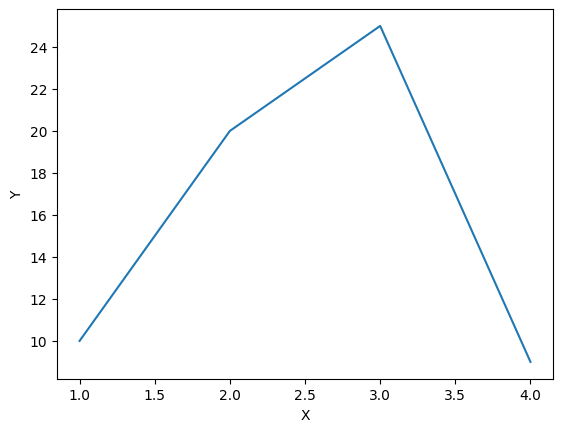

In [22]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [10, 20, 25, 9]

plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [23]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8], dtype=float)

w = 0.0
b = 0.0
lr = 0.01

for epoch in range(100):
    y_pred = w * X + b
    loss = np.mean((y_pred - y) ** 2)

    dw = np.mean(2 * X * (y_pred - y))
    db = np.mean(2 * (y_pred - y))

    w -= lr * dw
    b -= lr * db

print(w, b)


1.846347367319157 0.45175740934344377


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

print(model.coef_, model.intercept_)


[2.] 0.0


In [26]:
import torch

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(200):
    optimizer.zero_grad()
    loss = criterion(model(x), y)
    loss.backward()
    optimizer.step()

print(model.weight, model.bias)


Parameter containing:
tensor([[1.2899]], requires_grad=True) Parameter containing:
tensor([1.3855], requires_grad=True)


In [35]:
import torch

a = torch.tensor([1, 2.6, 3])
b = torch.zeros(3)
c = torch.ones(3)
d = torch.randn(3)

print(a, b, c, d)


tensor([1.0000, 2.6000, 3.0000]) tensor([0., 0., 0.]) tensor([1., 1., 1.]) tensor([ 0.3408, -0.0745,  0.4379])


In [36]:
print(a.shape)
print(a.dtype)
print(a.device)


torch.Size([3])
torch.float32
cpu


In [37]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])

print(x + y)
print(x * y)
print(x.dot(y))


tensor([5., 7., 9.])
tensor([ 4., 10., 18.])
tensor(32.)


In [45]:
A = torch.tensor([1.0, 2.0, 3.0])
B=torch.tensor([4.0, 5.0, 6.0])

C = A @ B
print(C.shape)


torch.Size([])


In [47]:
import torch.nn as TadModel

model = TadModel.Linear(1, 1)
print(model)

for param in model.parameters():
    print(param)


Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.3961]], requires_grad=True)
Parameter containing:
tensor([0.3114], requires_grad=True)


In [60]:
import torch
import torch.nn as nn

# Data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Model
model = nn.Linear(1, 1)

# Loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    optimizer.zero_grad()      # 1. clear gradients
    y_pred = model(x)          # 2. forward
    loss = criterion(y_pred, y)# 3. loss
    loss.backward()            # 4. backward
    optimizer.step()           # 5. update

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.6f}")


Epoch 0, Loss 23.292019
Epoch 10, Loss 19.898540
Epoch 20, Loss 16.817305
Epoch 30, Loss 14.070706
Epoch 40, Loss 11.661381
Epoch 50, Loss 9.576542
Epoch 60, Loss 7.793922
Epoch 70, Loss 6.286494
Epoch 80, Loss 5.025458
Epoch 90, Loss 3.981956


In [58]:
torch.save(model.state_dict(), "model.pth")
model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

CNN

In [65]:
# ============================
# Ethiopic CRNN OCR - Full Script
# ============================

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ----------------------------
# 1️⃣ Ethiopic Character Setup
# ----------------------------
ethiopic_chars = ["ሀ", "ለ", "ሐ", "መ", "ሠ", "ረ", "ሰ", "ሸ", "ቀ", "በ"]

char2idx = {c: i + 1 for i, c in enumerate(ethiopic_chars)}
idx2char = {i + 1: c for i, c in enumerate(ethiopic_chars)}
BLANK = 0
num_classes = len(ethiopic_chars) + 1  # +1 for CTC blank

# ----------------------------
# 2️⃣ Dataset
# ----------------------------
class DummyEthiopicDataset(Dataset):
    def __init__(self):
        # (label_text, dummy_image)
        self.samples = [
            ("ሀለመ", torch.randn(1, 32, 128)),
            ("ረሰ", torch.randn(1, 32, 128)),
            ("ቀበ", torch.randn(1, 32, 128))
        ]

    def encode(self, text):
        return torch.tensor([char2idx[c] for c in text], dtype=torch.long)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        text, image = self.samples[idx]
        label = self.encode(text)
        return image, label

def collate_fn(batch):
    images, labels = zip(*batch)
    images = torch.stack(images)
    label_lengths = torch.tensor([len(l) for l in labels])
    labels = torch.cat(labels)
    return images, labels, label_lengths

# ----------------------------
# 3️⃣ CNN Feature Extractor
# ----------------------------
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),   # H/2

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)    # H/4
        )

    def forward(self, x):
        x = self.cnn(x)               # [B, C, H, W]
        x = x.permute(0, 3, 1, 2)     # [B, W, C, H]
        x = x.flatten(2)              # [B, W, C*H]
        return x

# ----------------------------
# 4️⃣ BiLSTM
# ----------------------------
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            bidirectional=True,
            batch_first=True
        )

    def forward(self, x):
        x, _ = self.lstm(x)
        return x

# ----------------------------
# 5️⃣ Full CRNN Model
# ----------------------------
class EthiopicCRNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.cnn = CNNFeatureExtractor()
        self.rnn = BiLSTM(input_size=128 * 8, hidden_size=128)
        self.fc = nn.Linear(256, num_classes)  # 128*2 because BiLSTM

    def forward(self, x):
        x = self.cnn(x)           # [B, T, 1024]
        x = self.rnn(x)           # [B, T, 256]
        x = self.fc(x)            # [B, T, C]
        x = x.log_softmax(2)
        return x

# ----------------------------
# 6️⃣ Training Setup
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EthiopicCRNN(num_classes).to(device)
criterion = nn.CTCLoss(blank=BLANK, zero_infinity=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

dataset = DummyEthiopicDataset()
loader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn)

# ----------------------------
# 7️⃣ Training Loop
# ----------------------------
for epoch in range(10):
    for images, labels, label_lengths in loader:
        images = images.to(device)
        labels = labels.to(device)
        label_lengths = label_lengths.to(device)

        logits = model(images)             # [B, T, C]
        logits = logits.permute(1, 0, 2)   # [T, B, C] for CTC

        input_lengths = torch.full(
            size=(logits.size(1),),
            fill_value=logits.size(0),
            dtype=torch.long
        ).to(device)

        loss = criterion(logits, labels, input_lengths, label_lengths)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# ----------------------------
# 8️⃣ Greedy Decoder
# ----------------------------
def decode(pred):
    pred = pred.argmax(2)
    text = ""
    prev = BLANK
    for p in pred[0]:   # batch size = 1 for simplicity
        if p != prev and p != BLANK:
            text += idx2char[p.item()]
        prev = p
    return text

# Example decoding
model.eval()
with torch.no_grad():
    sample_image, _ = dataset[0]
    sample_image = sample_image.unsqueeze(0).to(device)  # add batch dim
    output = model(sample_image)
    decoded_text = decode(output.cpu())
    print("Decoded text:", decoded_text)


Epoch 1, Loss: 14.8209
Epoch 2, Loss: 3.4427
Epoch 3, Loss: 2.9605
Epoch 4, Loss: 2.8980
Epoch 5, Loss: 2.6776
Epoch 6, Loss: 2.4319
Epoch 7, Loss: 2.2507
Epoch 8, Loss: 2.1339
Epoch 9, Loss: 2.0703
Epoch 10, Loss: 2.0518
Decoded text: 


Simple OCR

In [69]:
import os

# Create project folders inside Colab VM
os.makedirs("/content/ocr_project/data", exist_ok=True)
os.makedirs("/content/ocr_project/output_lines", exist_ok=True)

print("Folders created in Colab VM")

Folders created in Colab VM


In [70]:
from google.colab import files

uploaded = files.upload()  # select your ethiopic_page.png
for filename in uploaded.keys():
    # Move the uploaded file to the data folder
    os.rename(filename, f"ocr_project/data/{filename}")


Saving ethiopic_page.png to ethiopic_page.png


In [73]:

import cv2
import numpy as np

def load_grayscale_image(path):
    '''Load an image in grayscale'''
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    return img

def binarize_image(img):
    '''Convert grayscale image to binary (text white, background black)'''
    _, binary = cv2.threshold(
        img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
    return binary

def dilate_image(binary, kernel_size=(1,5), iterations=2):
    '''Dilate the binary image to connect text characters into lines'''
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    dilated = cv2.dilate(binary, kernel, iterations=iterations)
    return dilated


In [74]:
# Make sure your project folder exists
import os
os.makedirs("/content/ocr_project", exist_ok=True)

# Write utils.py
with open("/content/ocr_project/utils.py", "w") as f:
    f.write(utils_code)

print("utils.py created successfully!")


utils.py created successfully!


In [75]:
utils_code = """
import cv2
import numpy as np

def load_grayscale_image(path):
    '''Load an image in grayscale'''
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    return img

def binarize_image(img):
    '''Convert grayscale image to binary (text white, background black)'''
    _, binary = cv2.threshold(
        img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
    return binary

def dilate_image(binary, kernel_size=(1,5), iterations=2):
    '''Dilate the binary image to connect text characters into lines'''
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    dilated = cv2.dilate(binary, kernel, iterations=iterations)
    return dilated
"""


In [76]:
!ls /content/ocr_project


data  output_lines  utils.py


Saving ethiopic_page.png to ethiopic_page.png


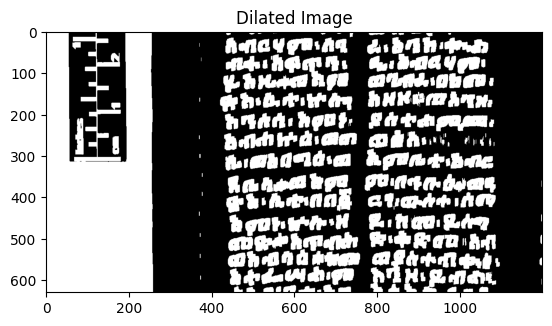

In [77]:
import sys
sys.path.append("/content/ocr_project")  # Add project folder to path

from utils import load_grayscale_image, binarize_image, dilate_image

# Test with a sample image
# uploaded via files.upload()
from google.colab import files
uploaded = files.upload()  # choose your page image

# Assume you uploaded ethiopic_page.png
img_path = list(uploaded.keys())[0]

img = load_grayscale_image(img_path)
binary = binarize_image(img)
dilated = dilate_image(binary)

import matplotlib.pyplot as plt
plt.imshow(dilated, cmap="gray")
plt.title("Dilated Image")
plt.show()


IndexError: list index out of range

In [81]:
line_seg_code = """
import cv2
import matplotlib.pyplot as plt
from utils import load_grayscale_image, binarize_image, dilate_image

def segment_lines(page_img):
    '''
    Input: grayscale page image (numpy array)
    Output: list of line images (numpy arrays)
    '''
    # 1️⃣ Binarize and dilate
    binary = binarize_image(page_img)
    dilated = dilate_image(binary)

    # 2️⃣ Find contours (lines)
    contours, _ = cv2.findContours(
        dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # 3️⃣ Sort contours top-to-bottom
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    bounding_boxes = sorted(bounding_boxes, key=lambda b: b[1])

    line_images = []
    for x, y, w, h in bounding_boxes:
        line_img = binary[y:y+h, x:x+w]
        # Resize line height to 32 px (OCR-friendly)
        new_h = 32
        new_w = int(w * (new_h / h))
        line_img = cv2.resize(line_img, (new_w, new_h))
        line_images.append(line_img)
    return line_images

# -------------------------
# Example usage if run directly
# -------------------------
if __name__ == "__main__":
    page_path = "ocr_project/data/ethiopic_page.png"
    page_img = load_grayscale_image(page_path)
    lines = segment_lines(page_img)
    print(f"Detected {len(lines)} lines")

    # Visualize segmented lines
    for i, line in enumerate(lines):
        plt.imshow(line, cmap="gray")
        plt.title(f"Line {i+1}")
        plt.show()
"""
# Ensure project folder exists
import os
os.makedirs("/content/ocr_project", exist_ok=True)

# Create line_segmentation.py
with open("/content/ocr_project/line_segmentation.py", "w") as f:
    f.write(line_seg_code)

print("line_segmentation.py created successfully!")


line_segmentation.py created successfully!


Saving ethiopic_page.png to ethiopic_page (1).png
Detected 259 lines


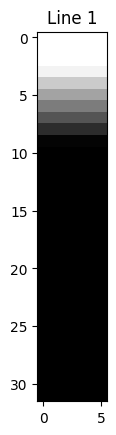

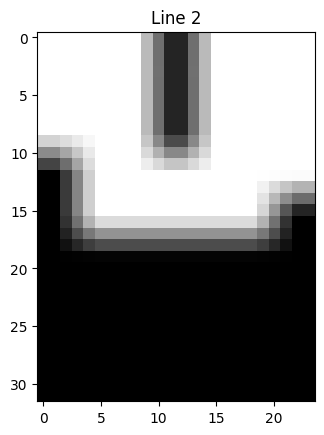

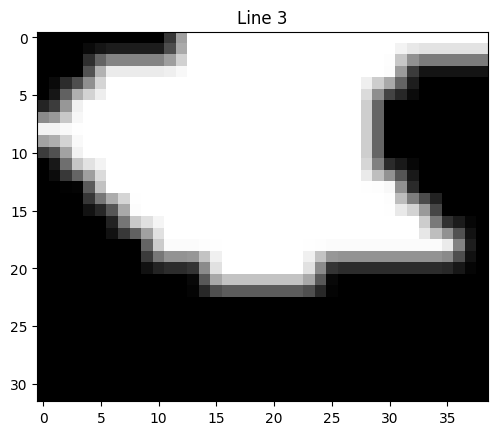

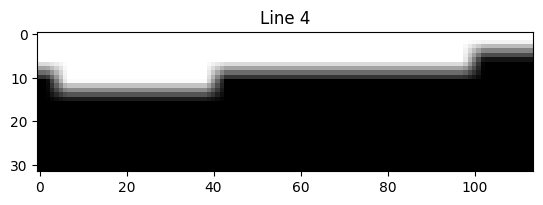

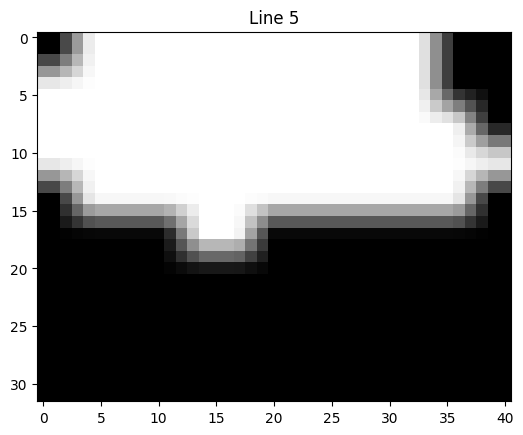

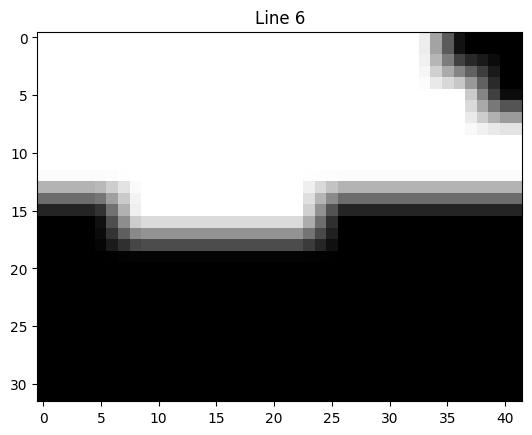

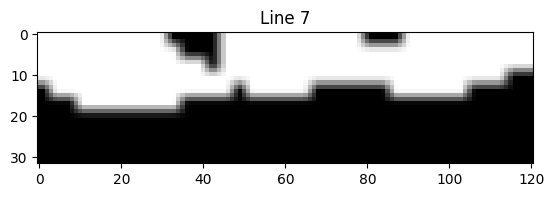

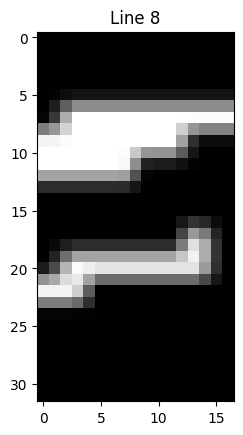

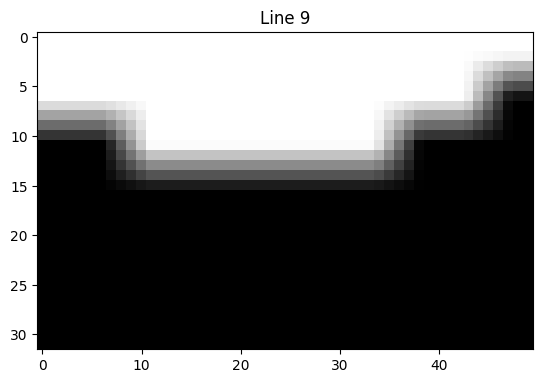

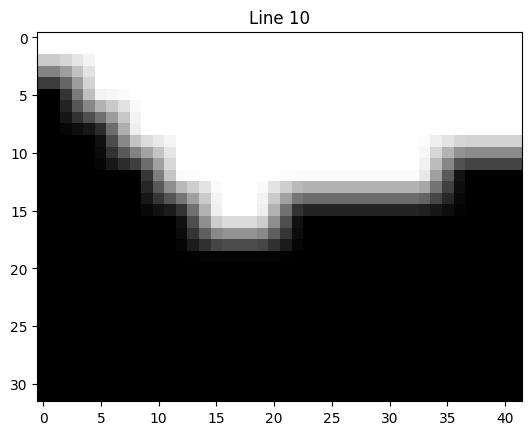

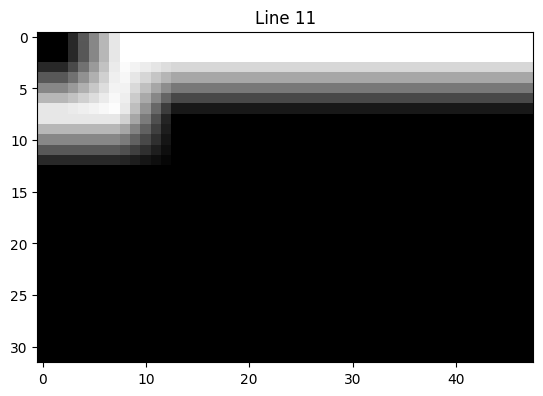

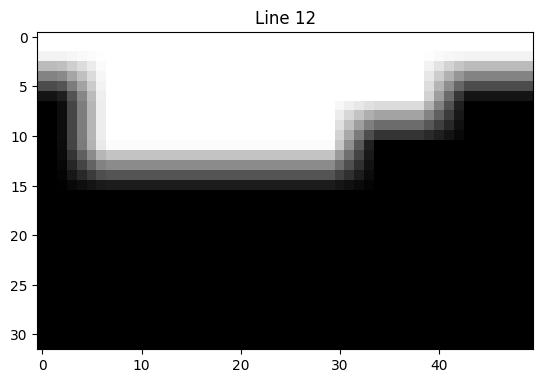

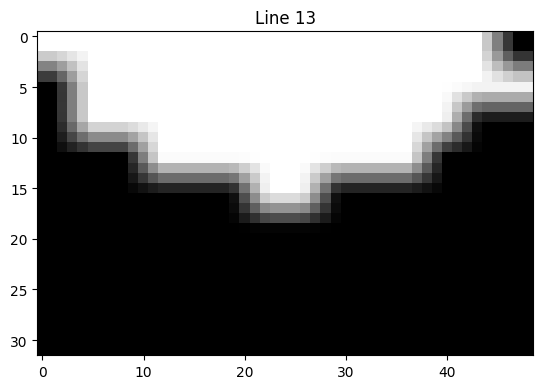

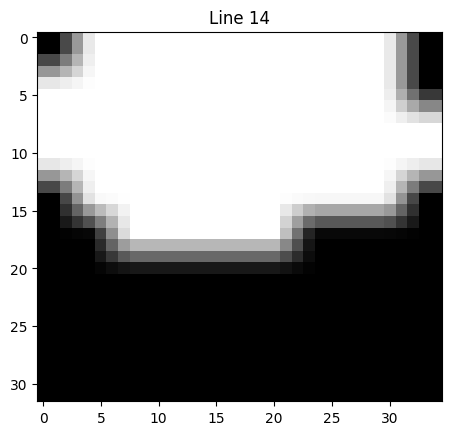

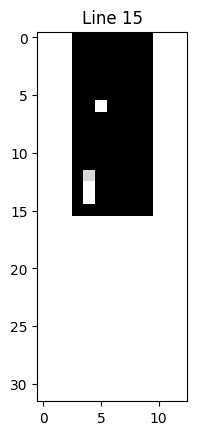

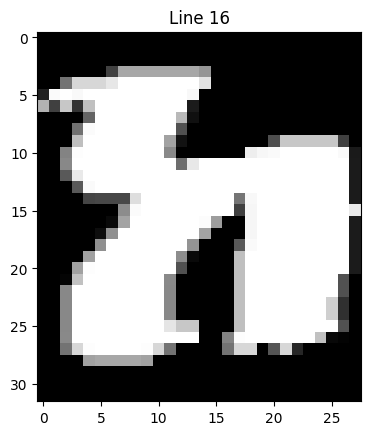

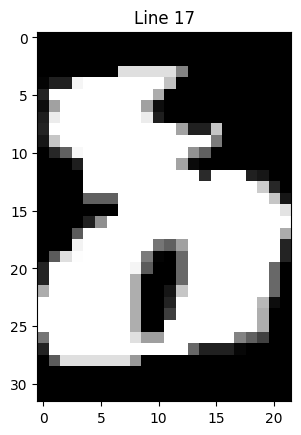

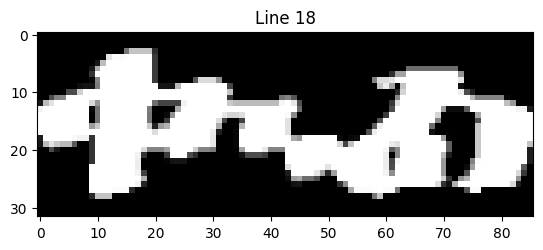

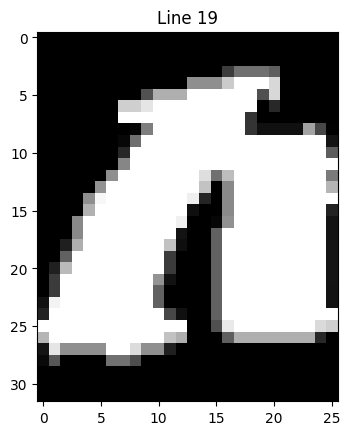

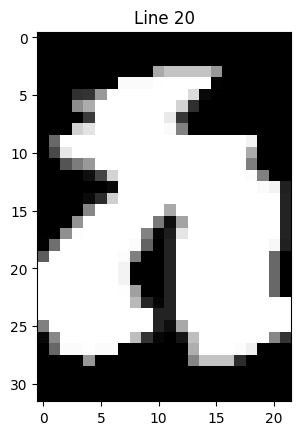

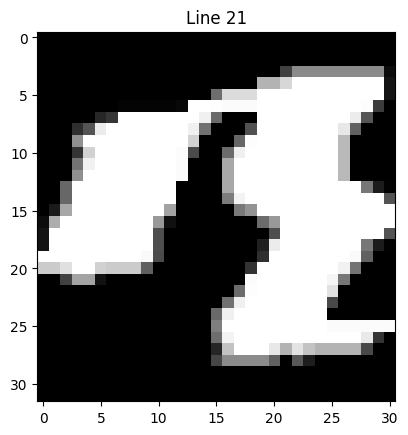

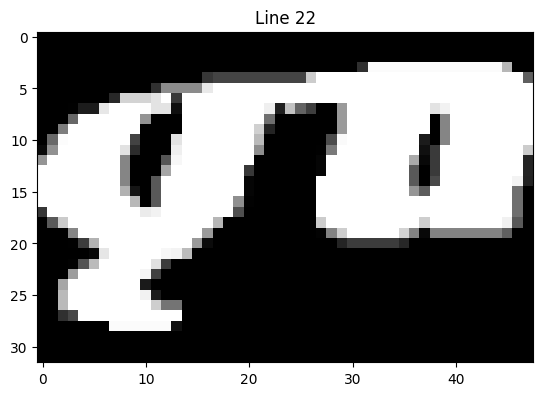

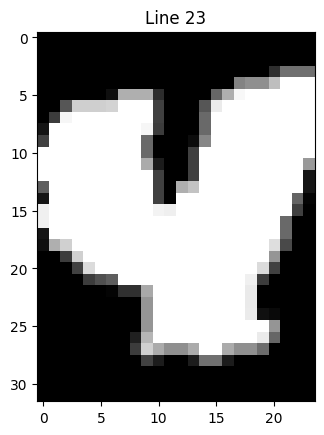

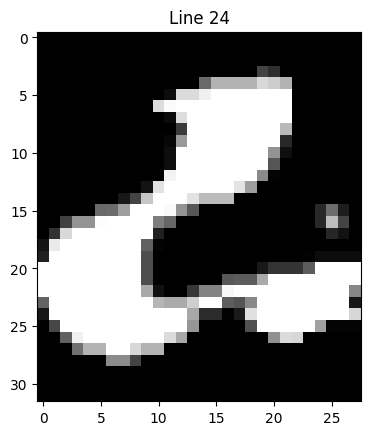

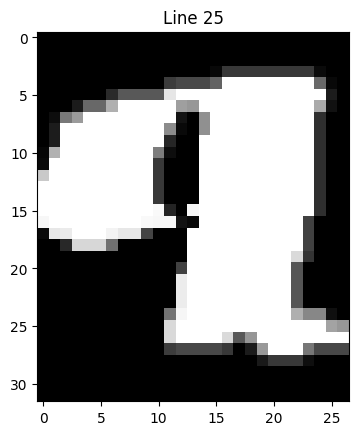

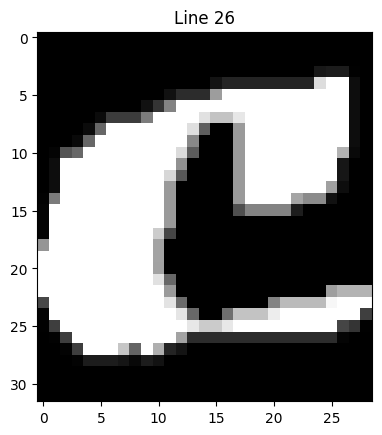

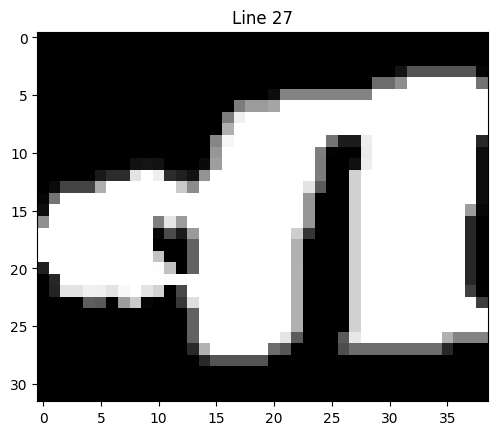

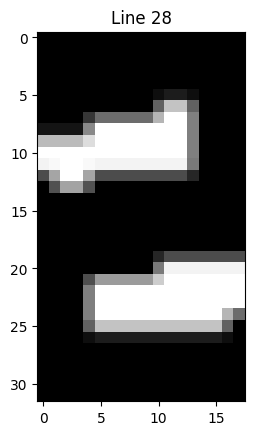

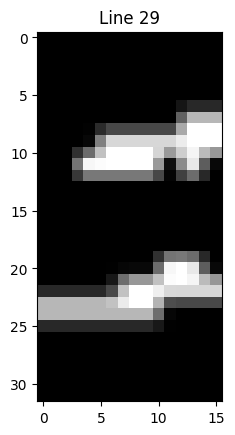

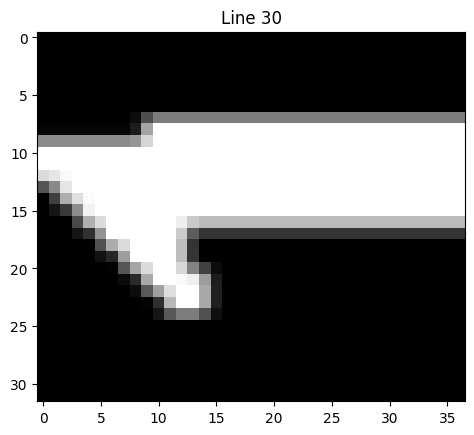

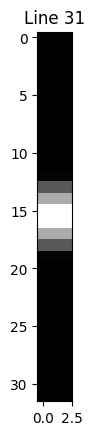

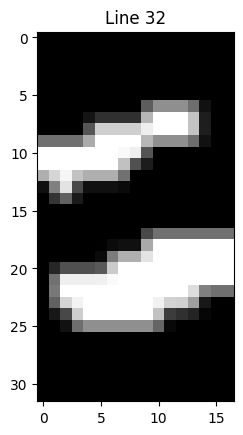

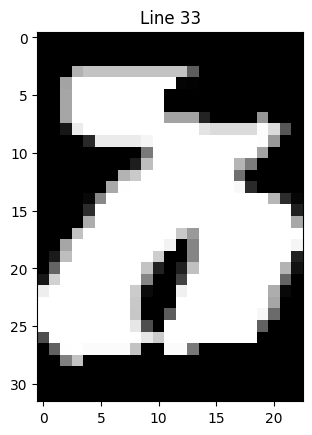

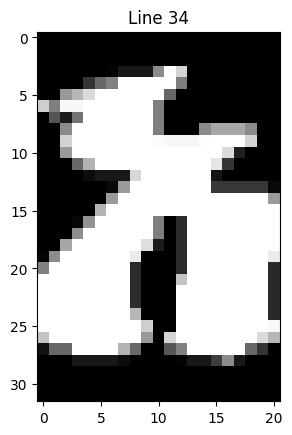

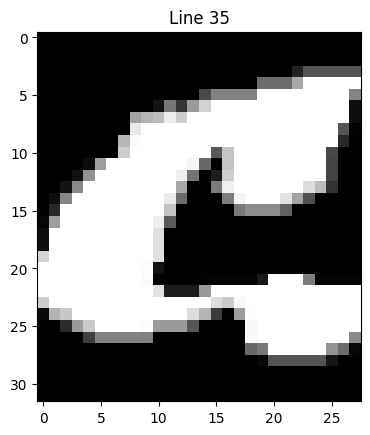

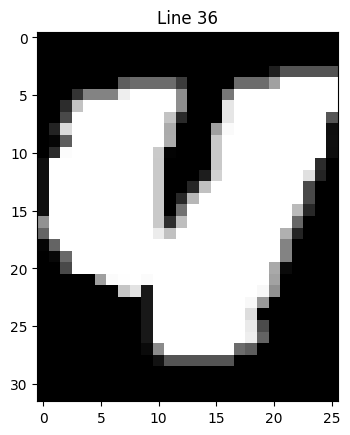

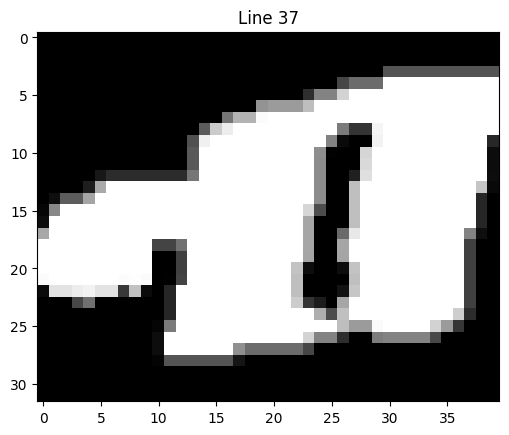

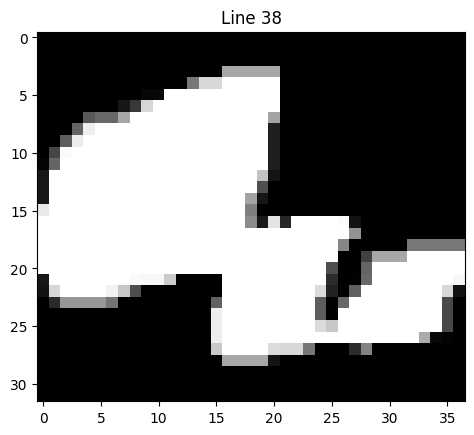

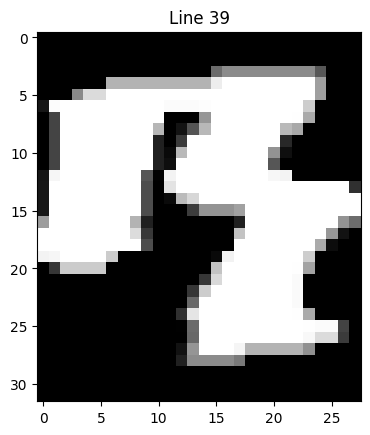

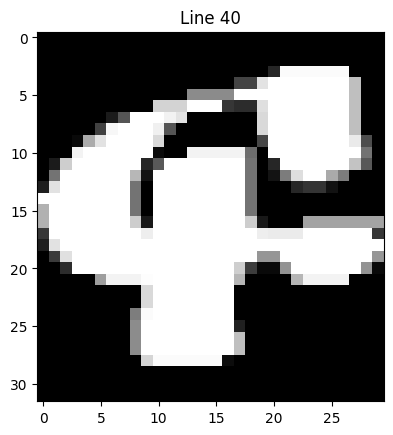

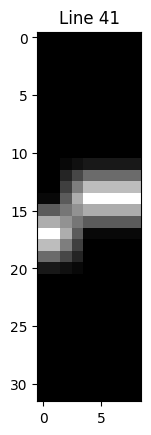

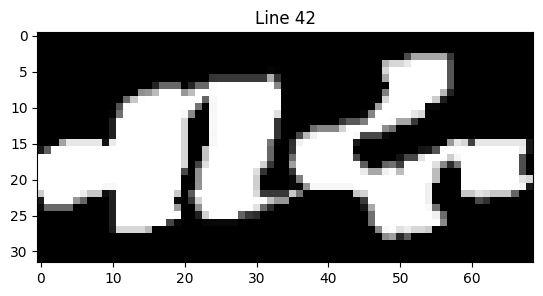

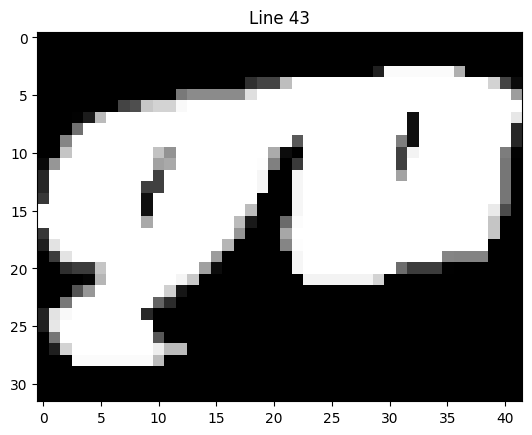

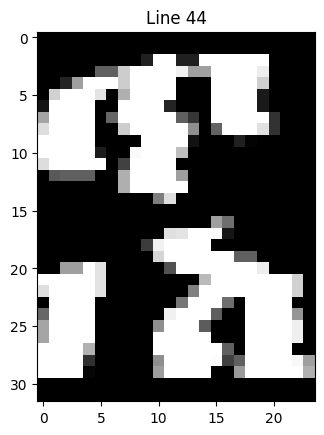

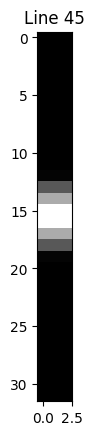

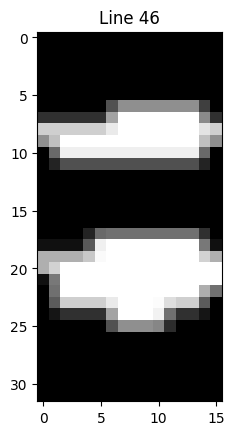

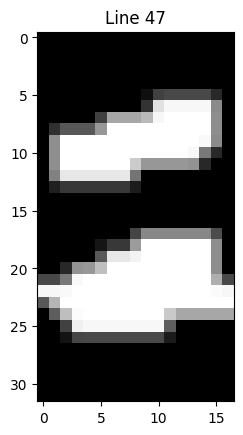

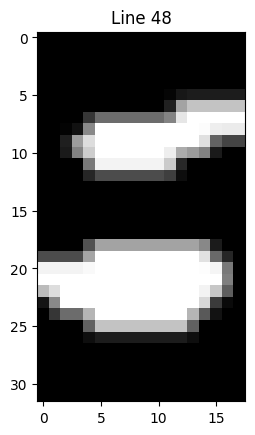

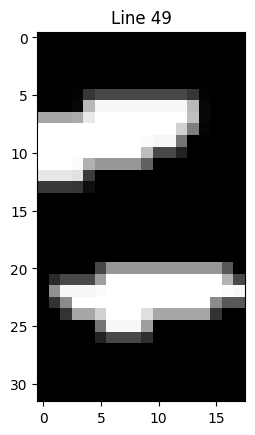

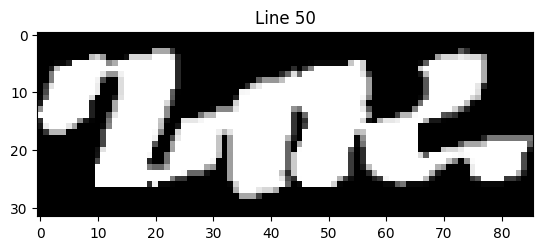

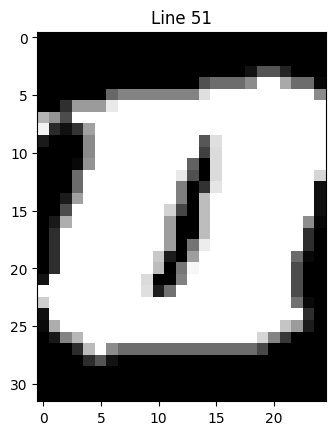

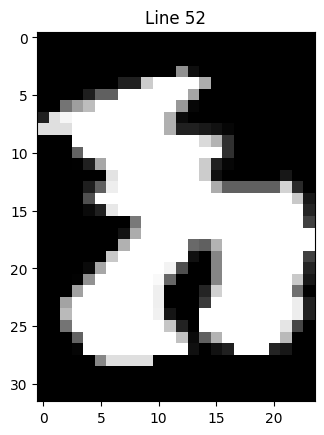

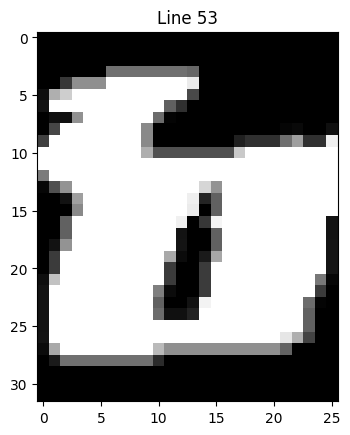

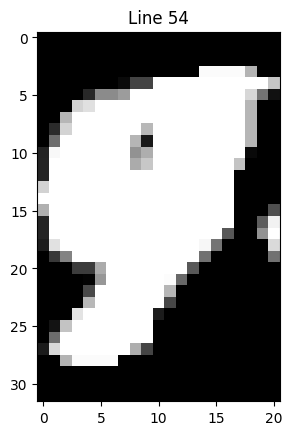

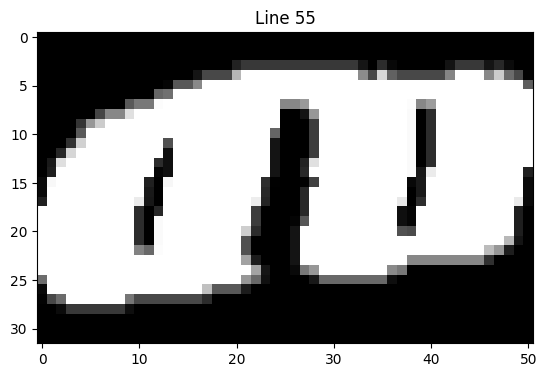

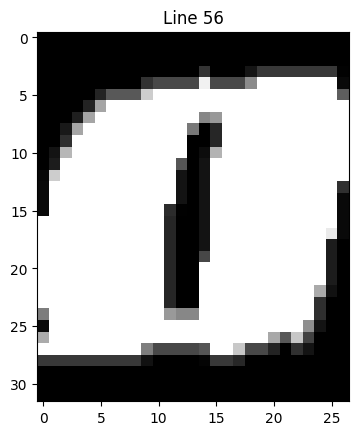

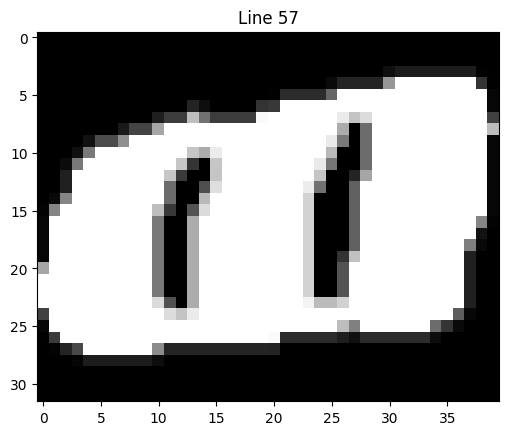

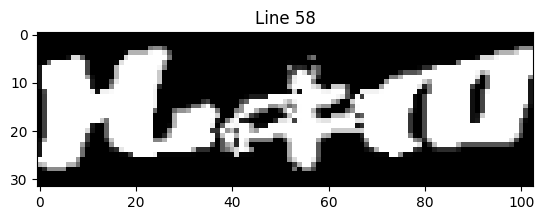

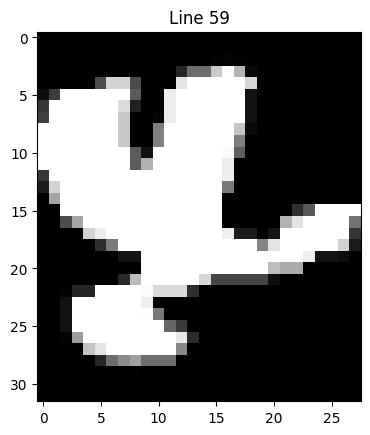

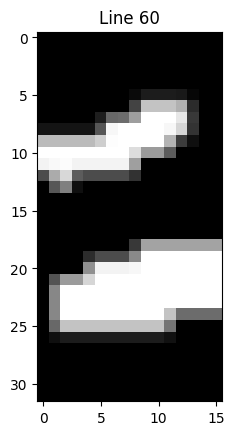

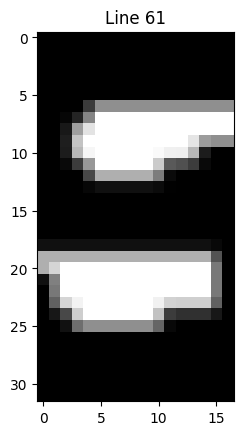

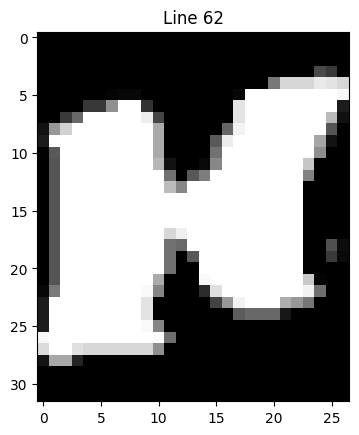

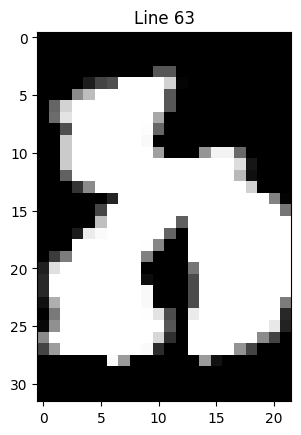

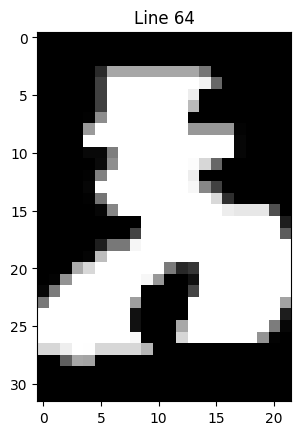

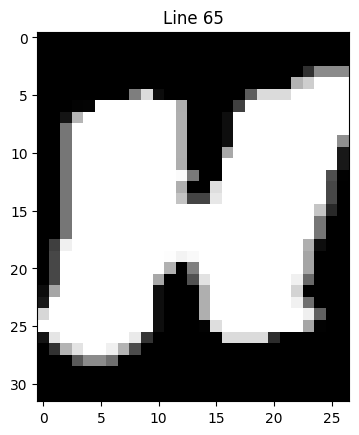

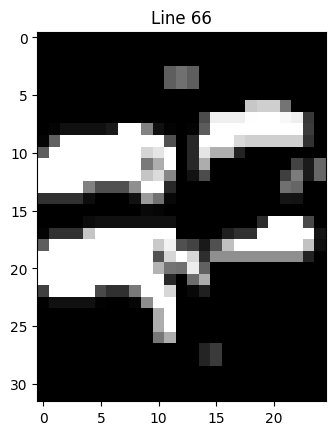

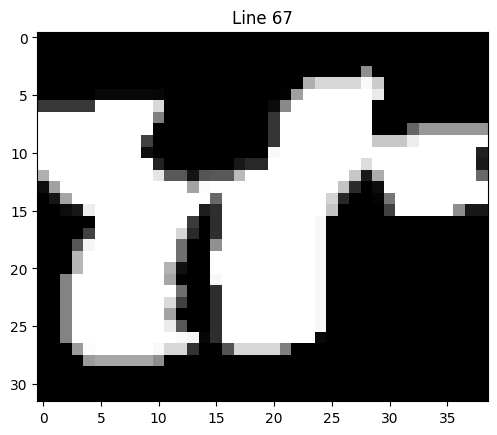

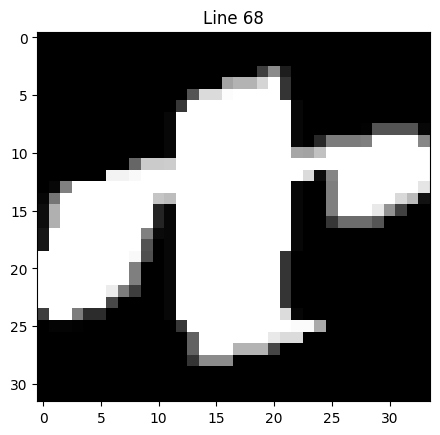

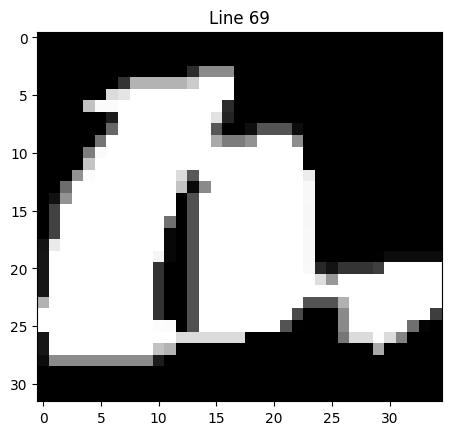

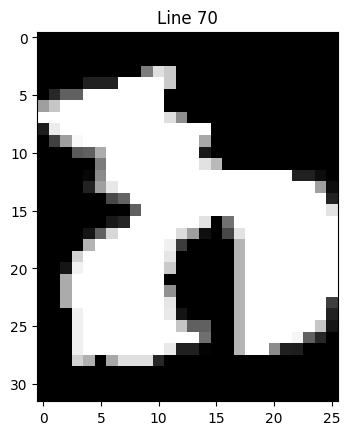

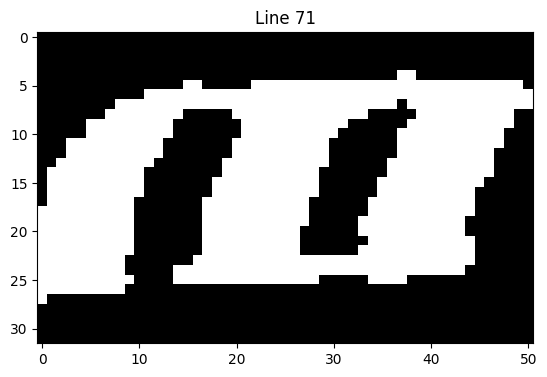

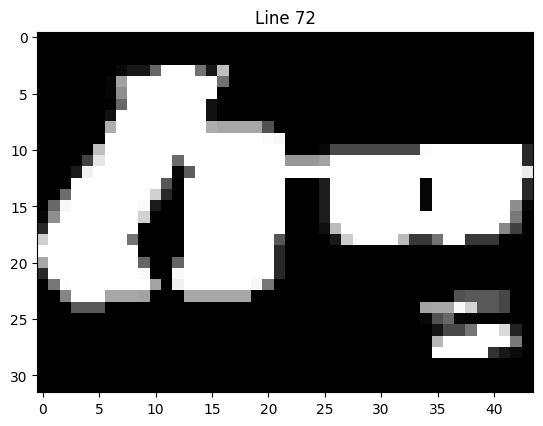

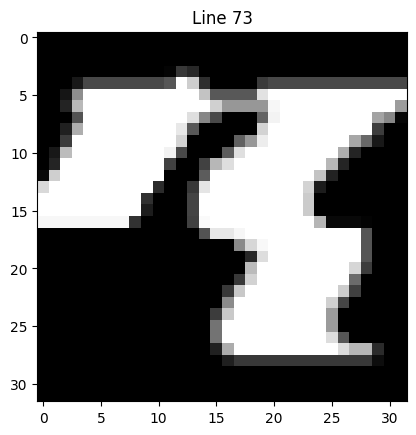

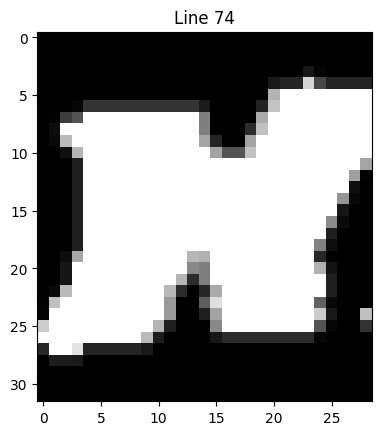

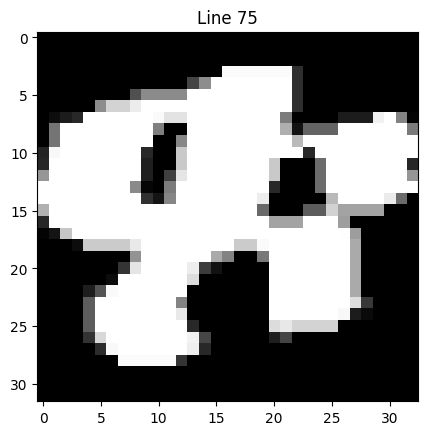

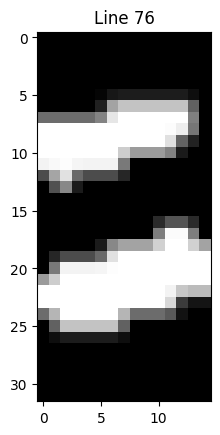

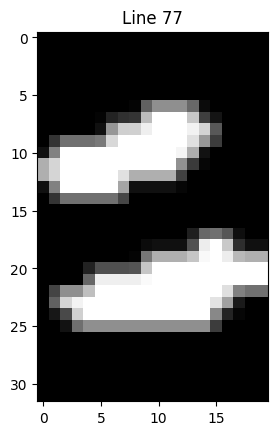

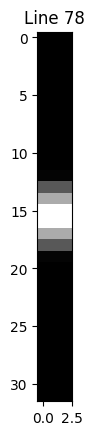

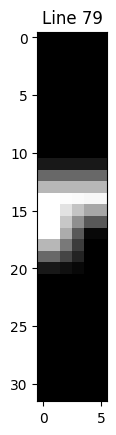

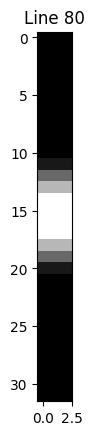

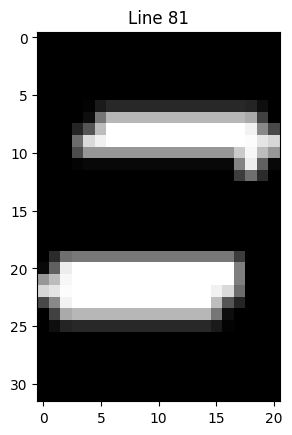

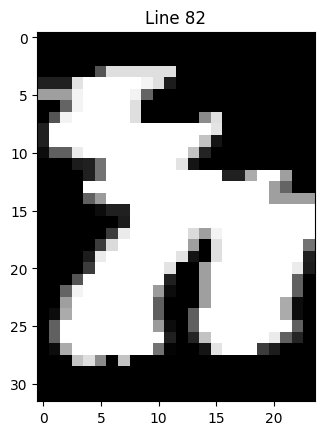

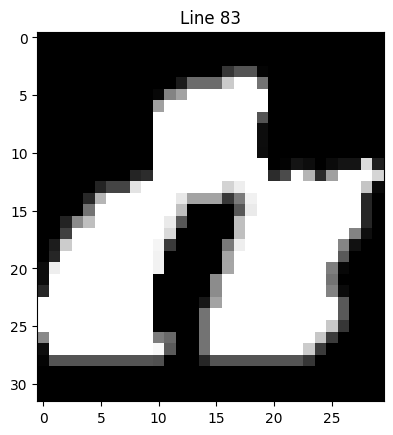

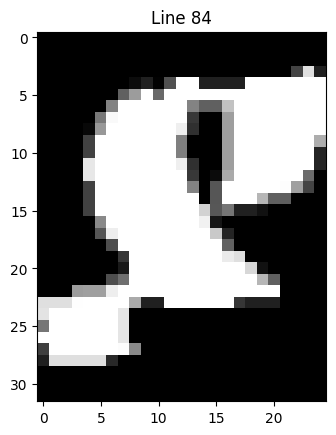

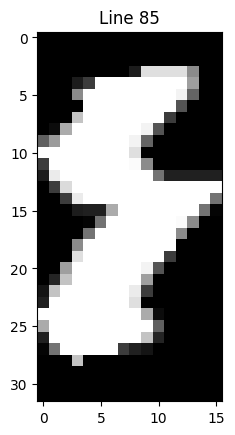

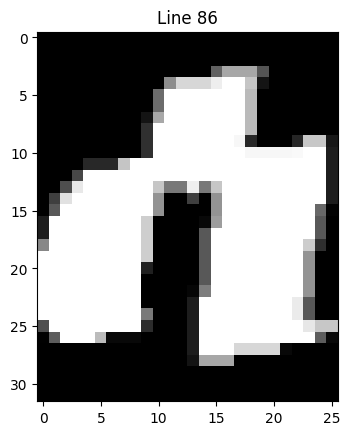

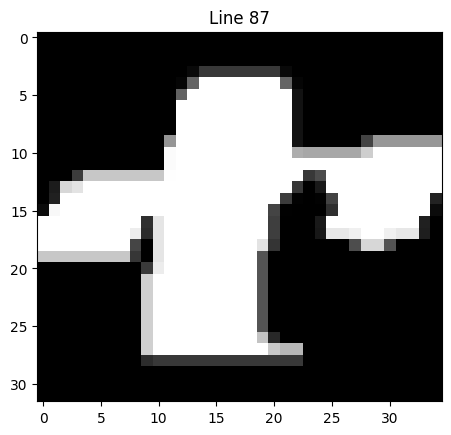

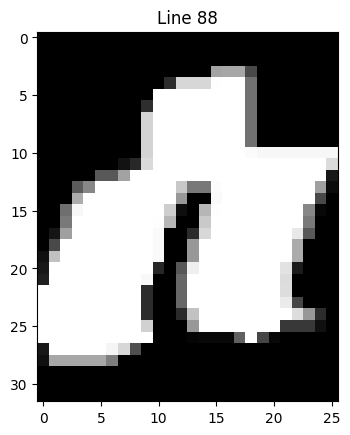

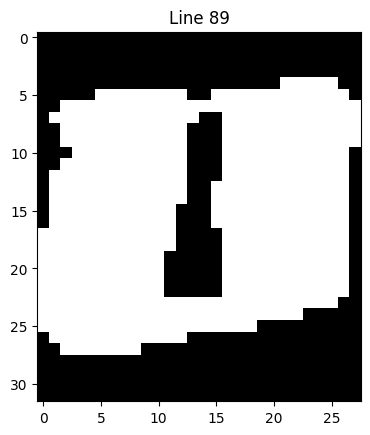

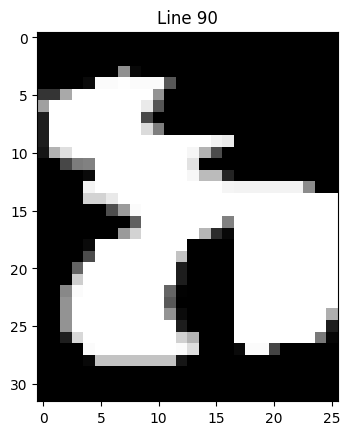

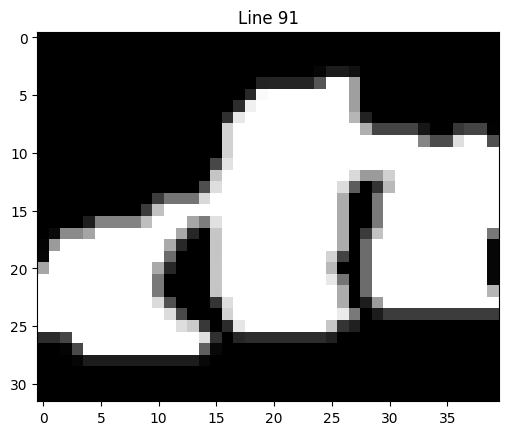

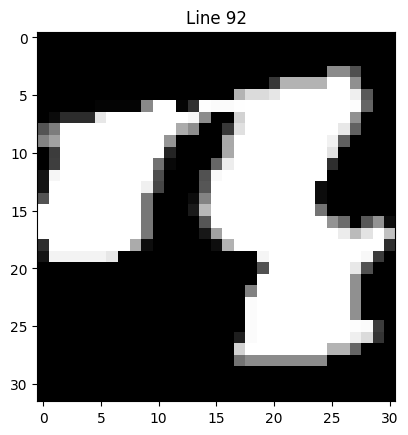

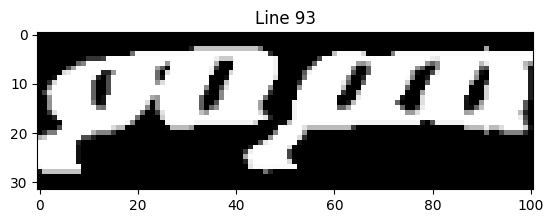

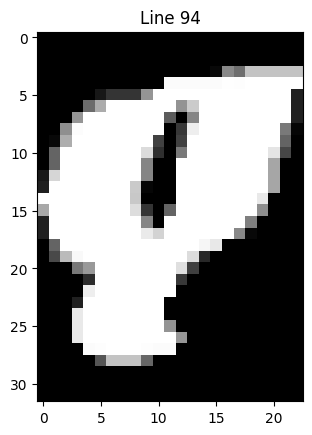

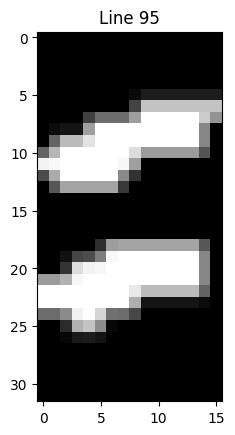

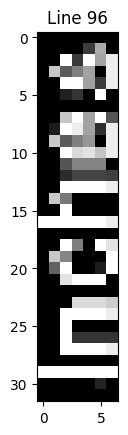

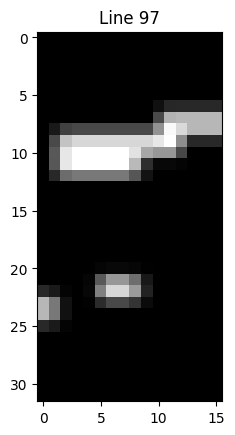

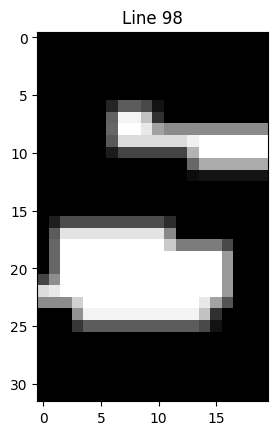

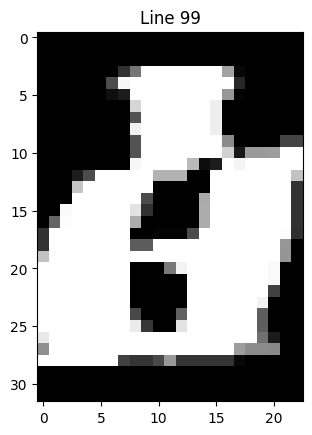

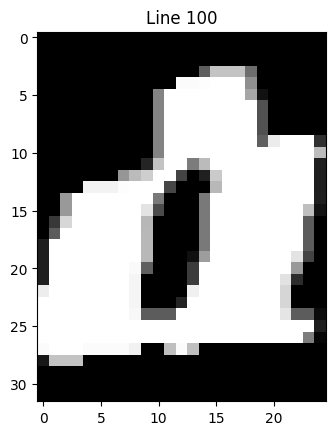

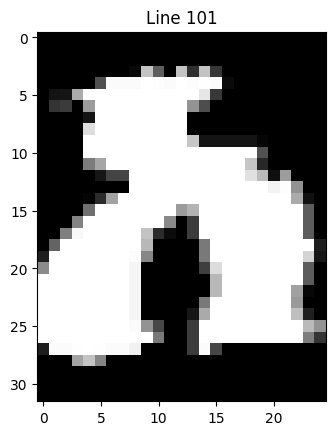

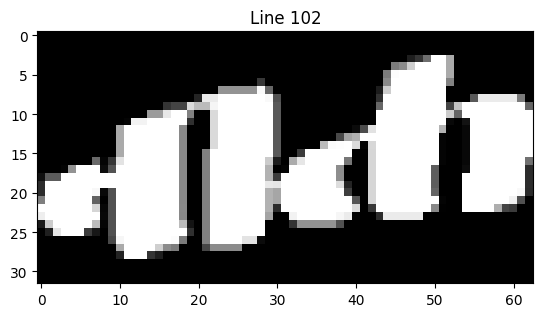

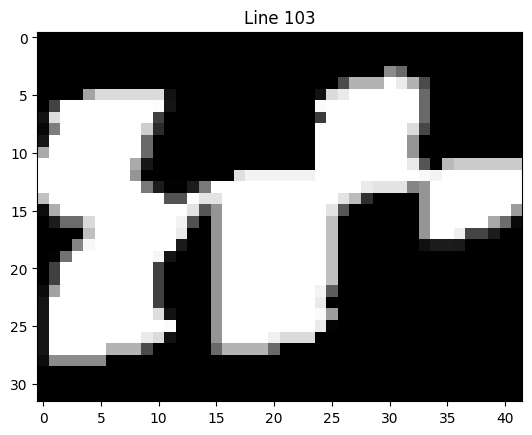

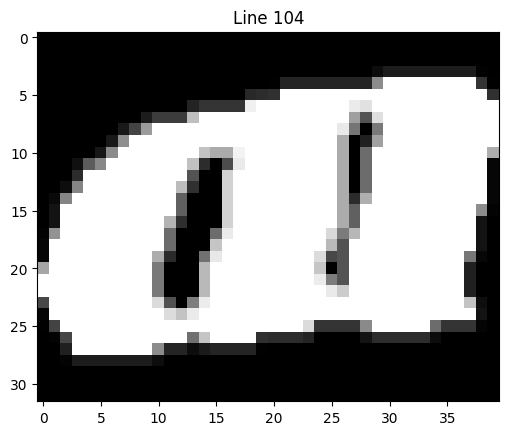

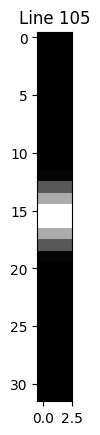

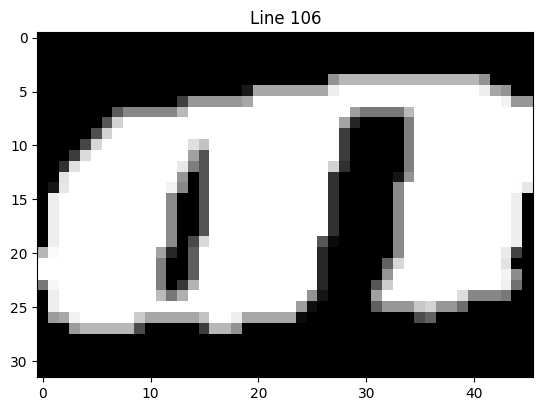

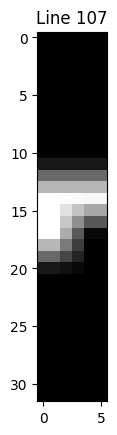

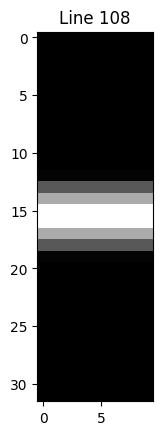

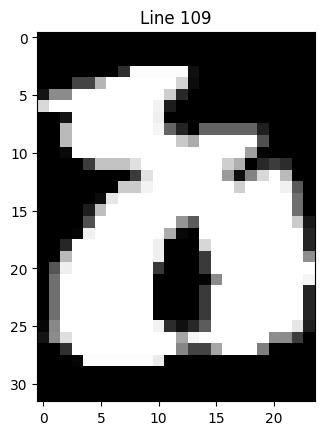

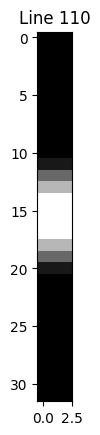

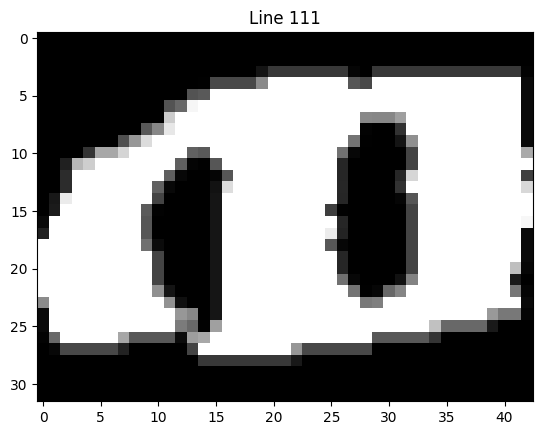

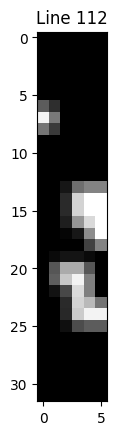

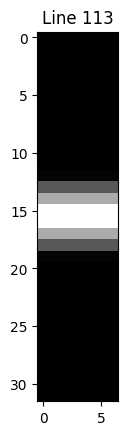

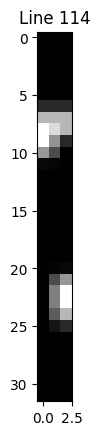

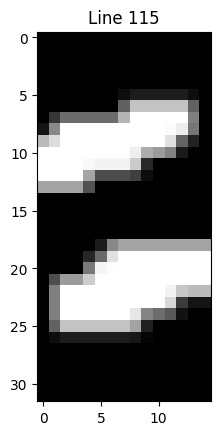

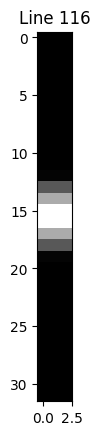

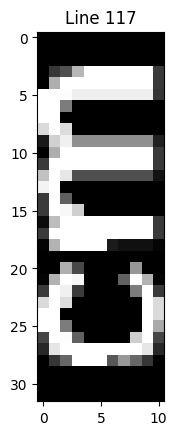

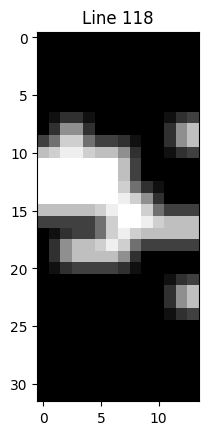

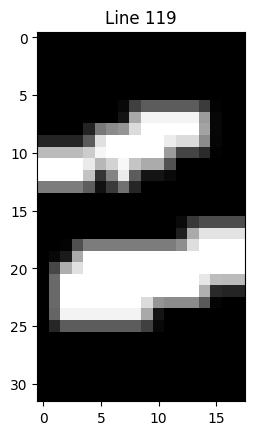

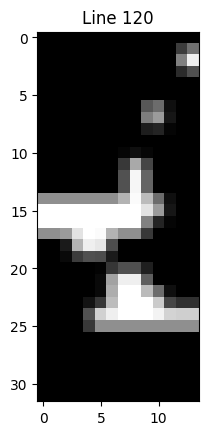

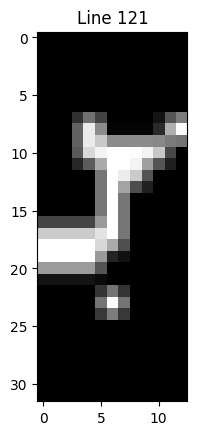

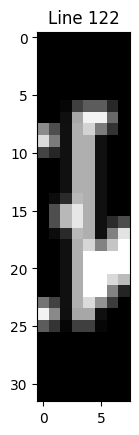

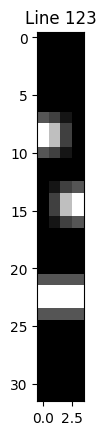

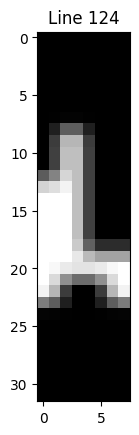

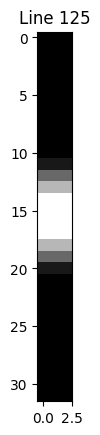

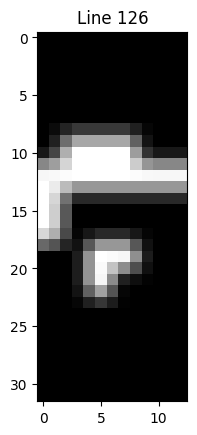

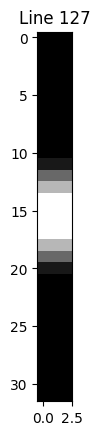

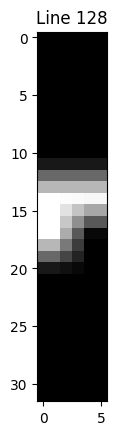

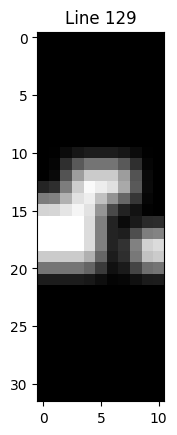

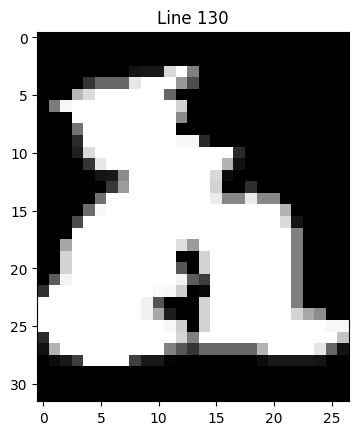

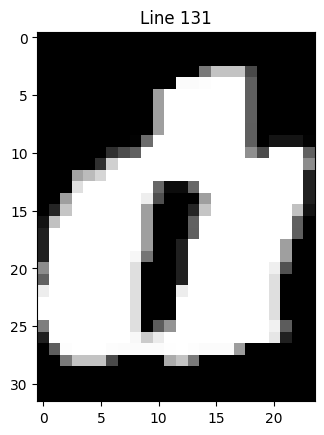

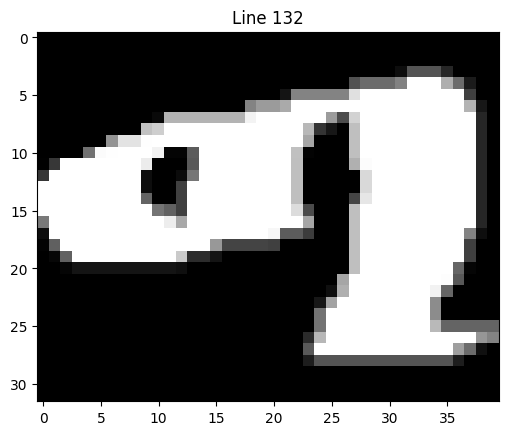

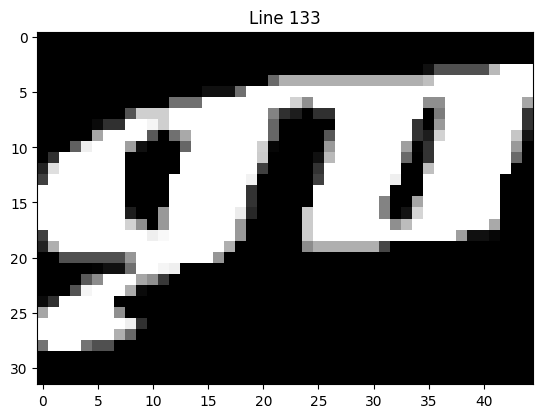

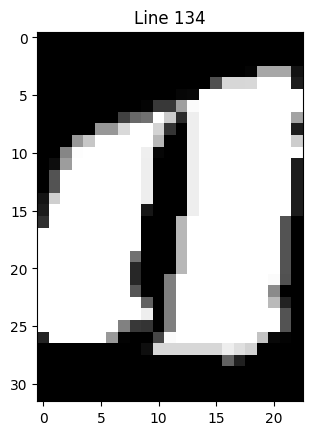

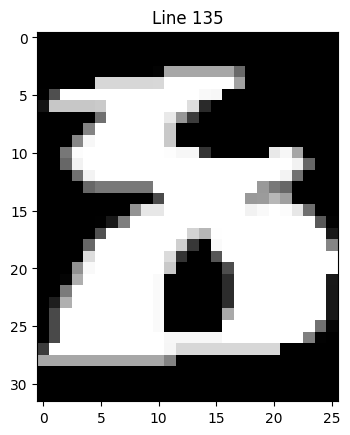

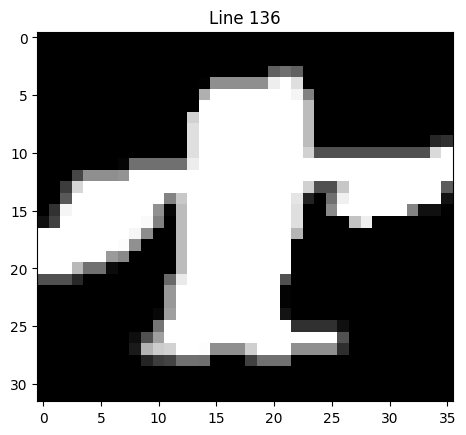

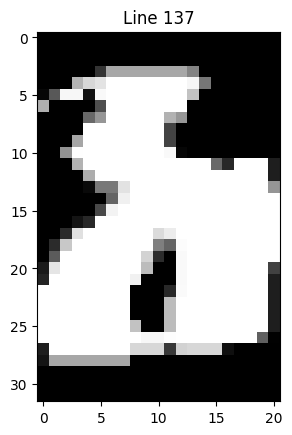

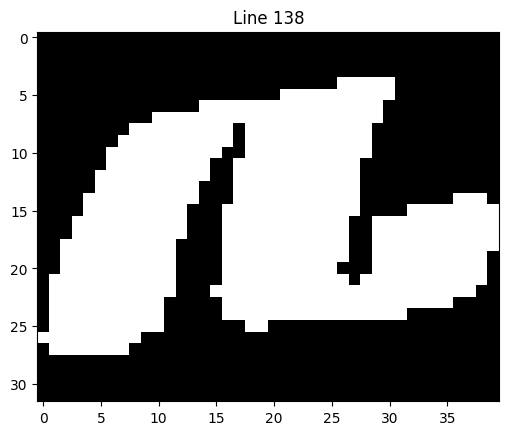

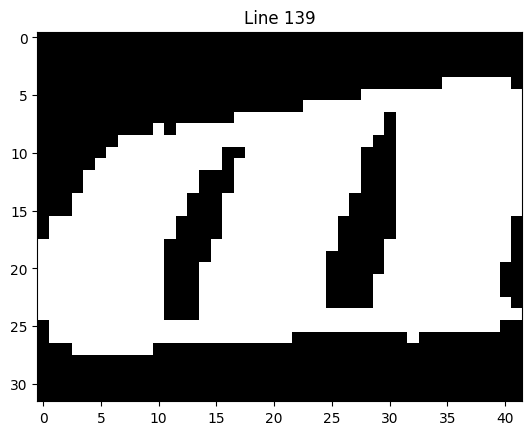

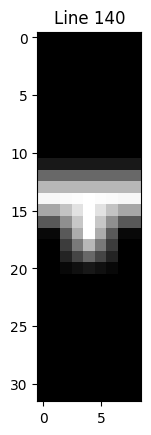

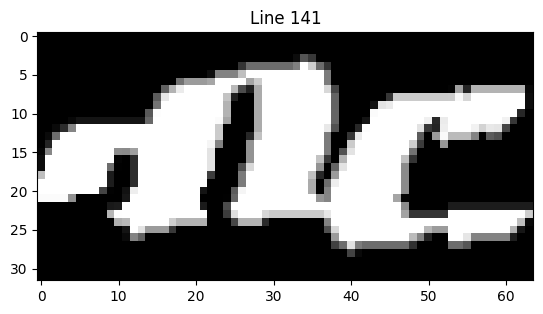

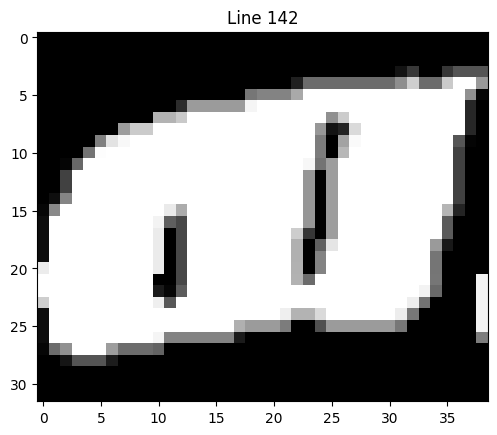

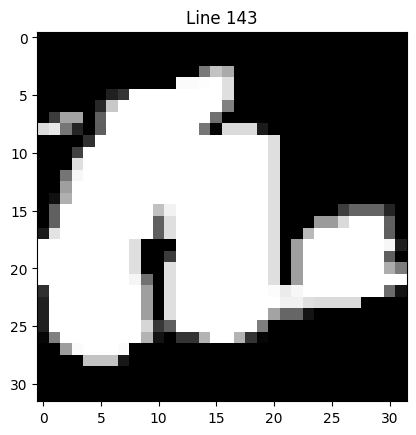

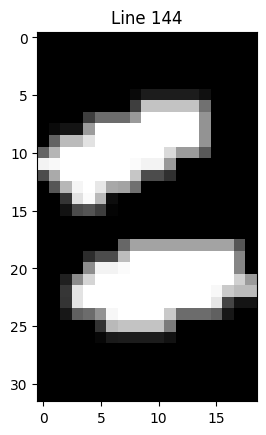

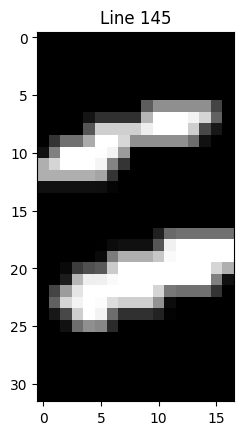

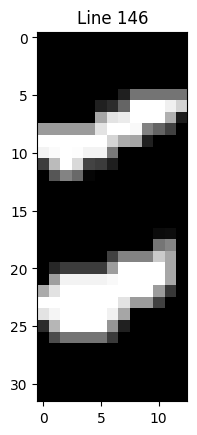

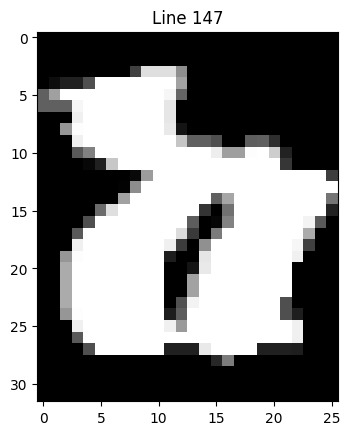

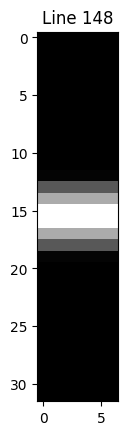

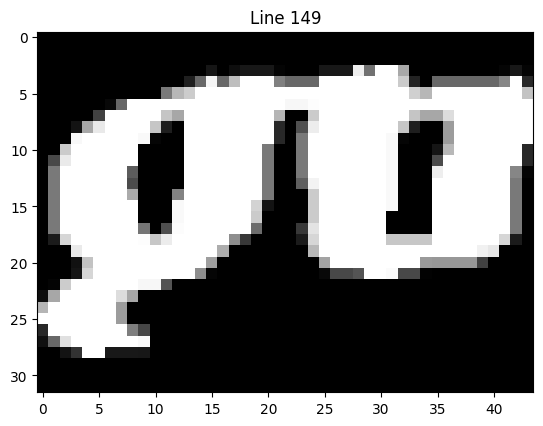

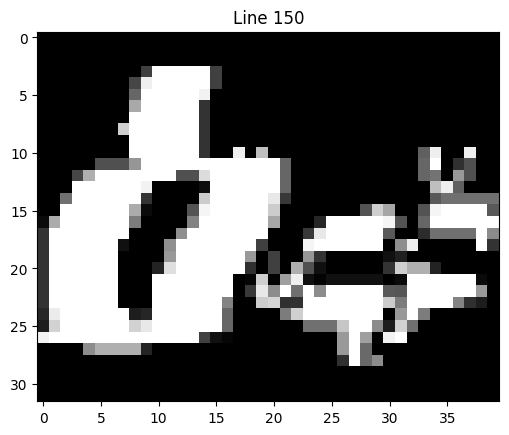

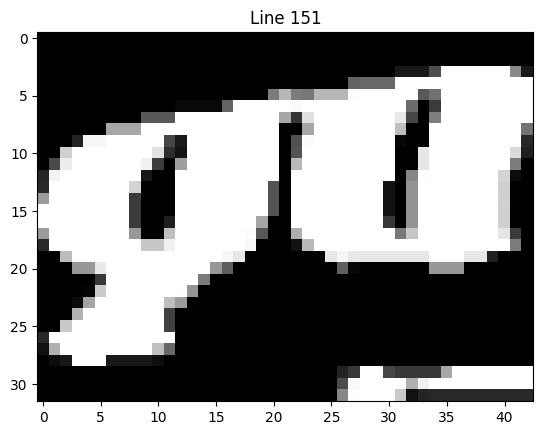

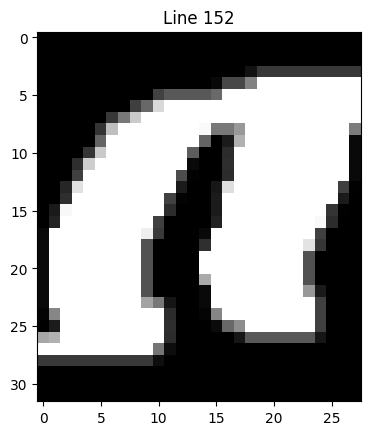

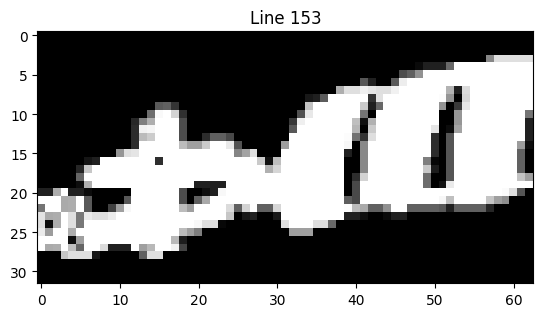

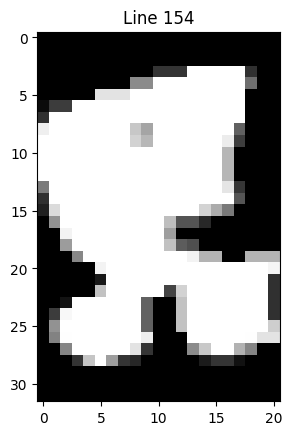

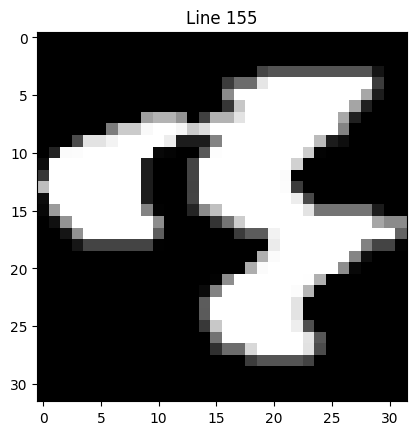

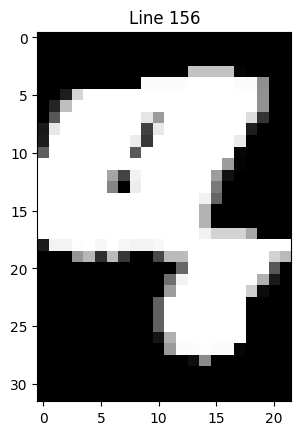

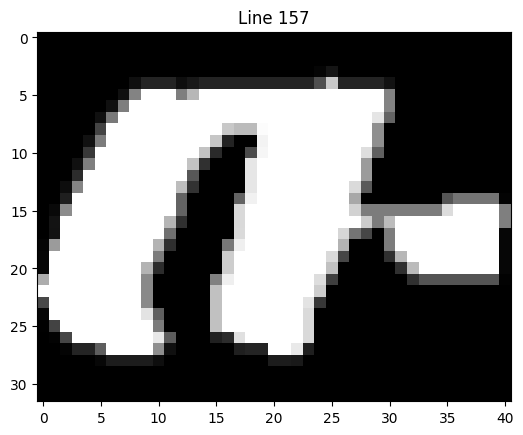

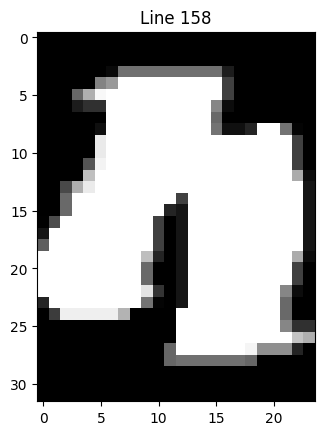

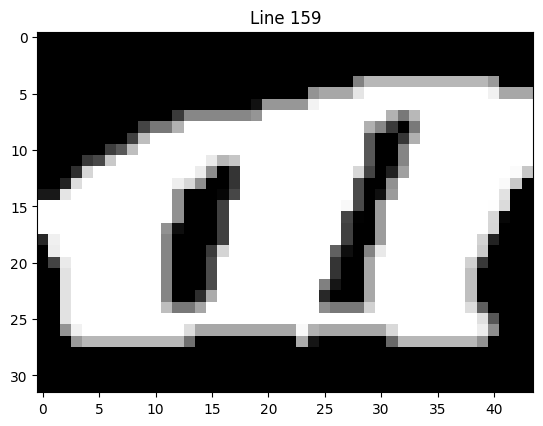

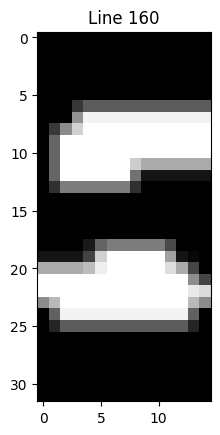

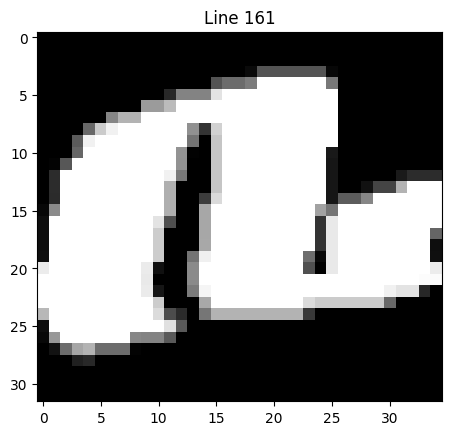

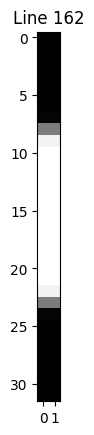

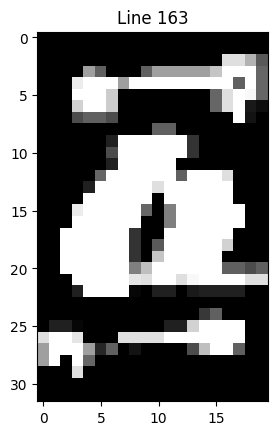

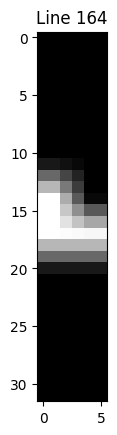

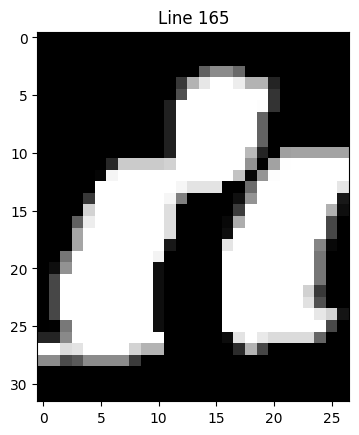

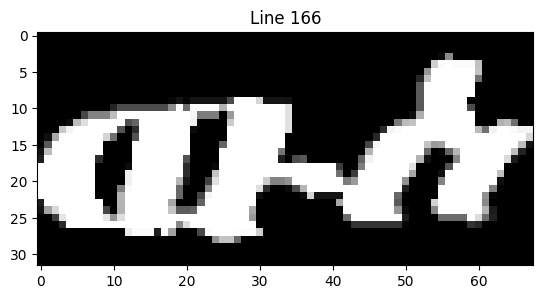

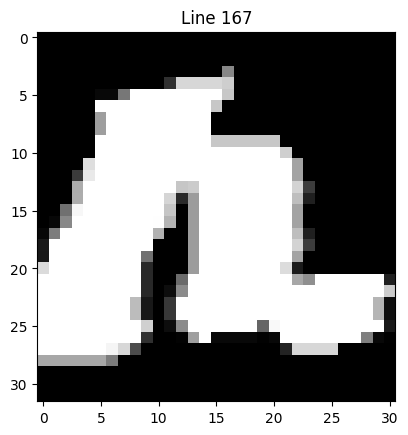

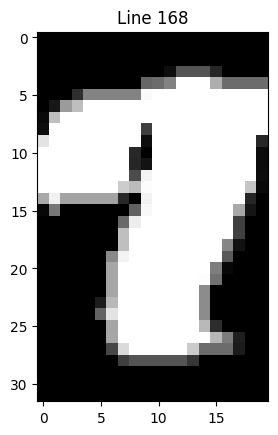

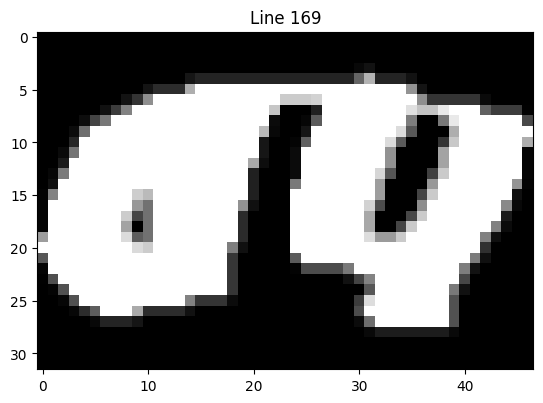

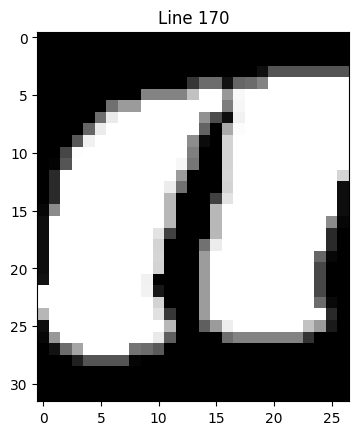

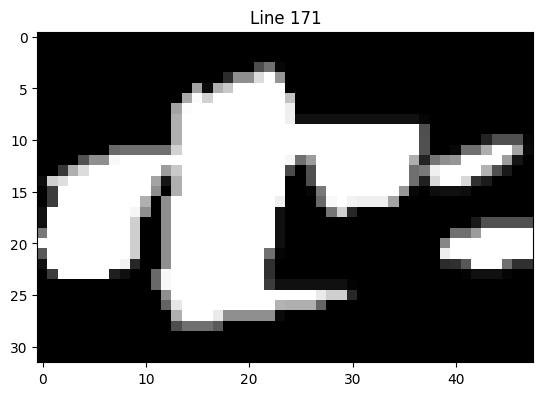

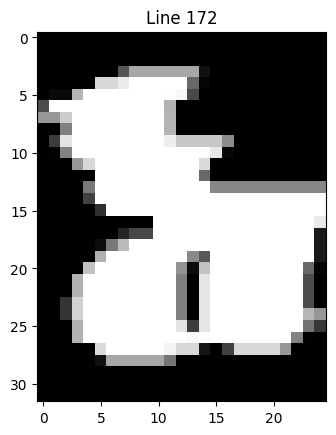

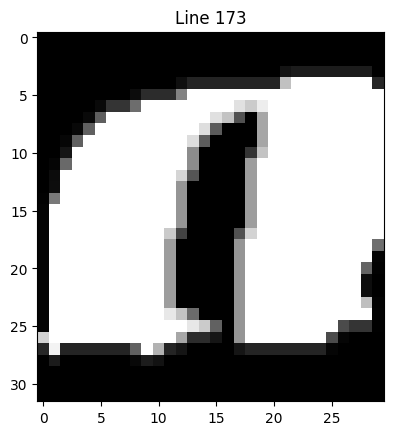

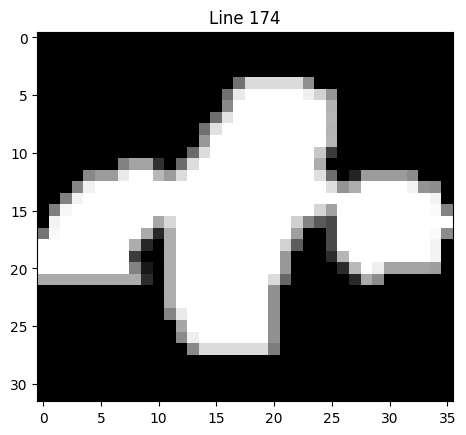

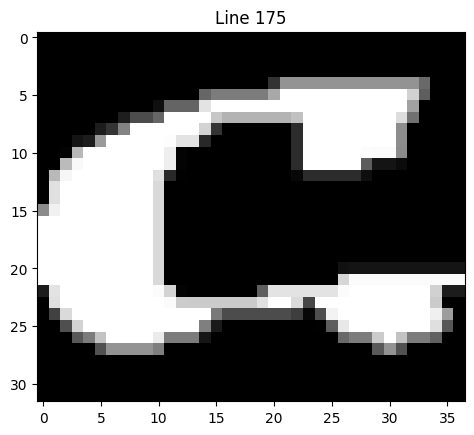

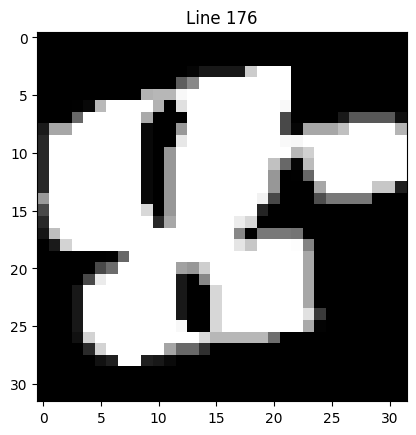

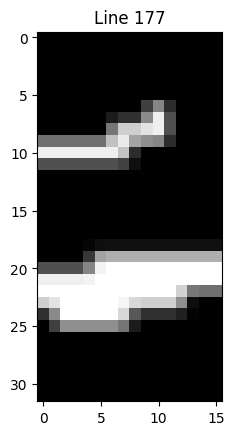

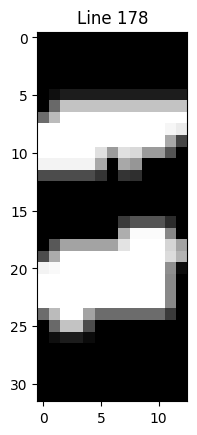

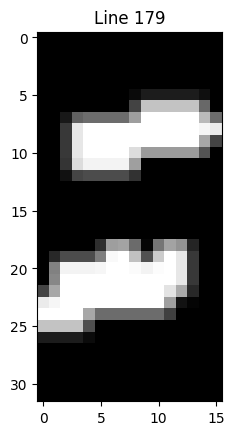

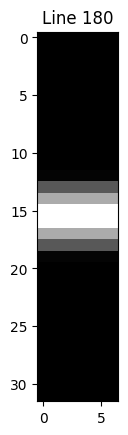

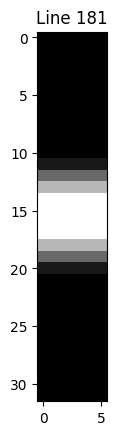

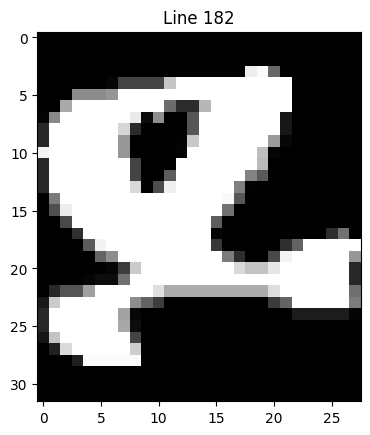

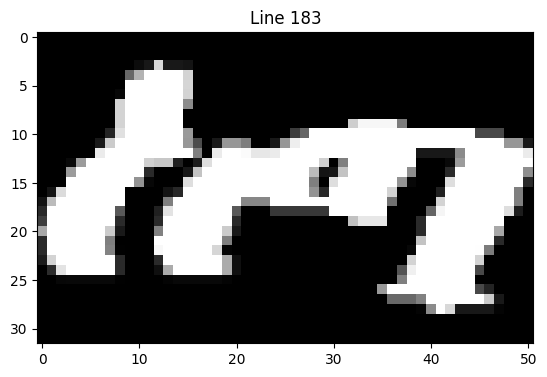

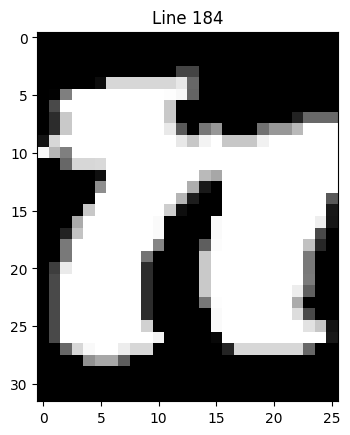

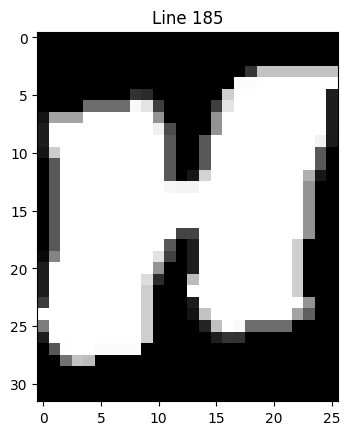

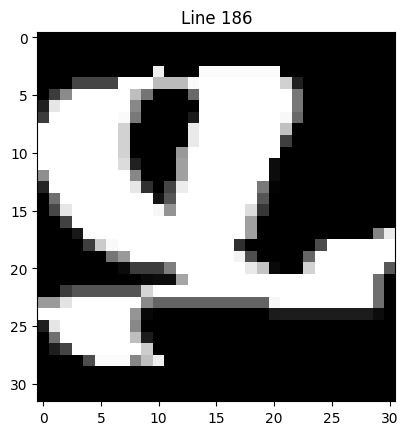

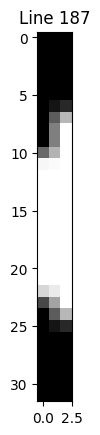

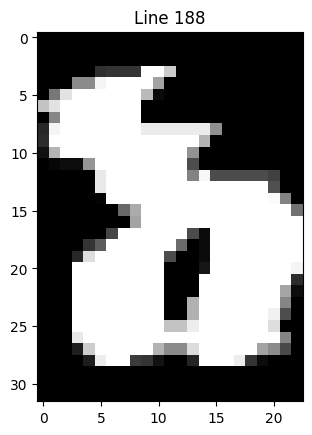

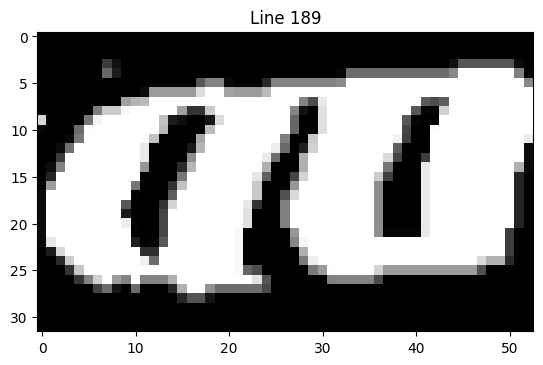

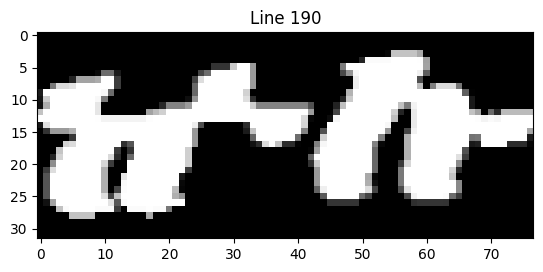

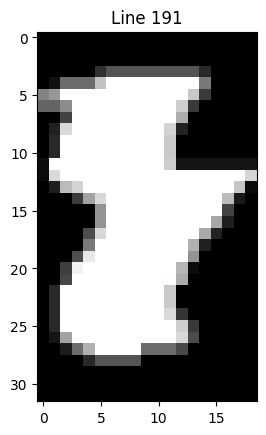

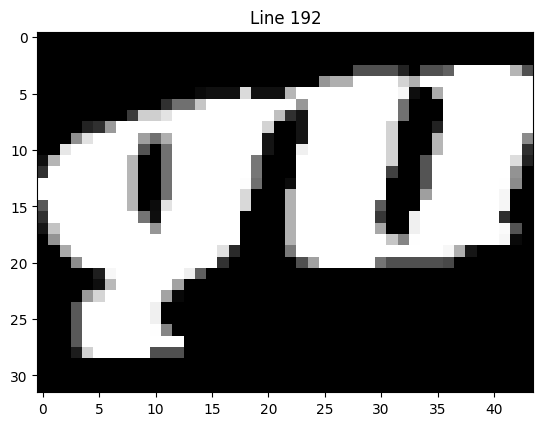

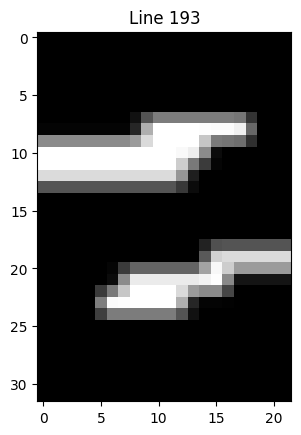

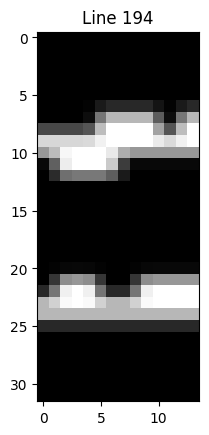

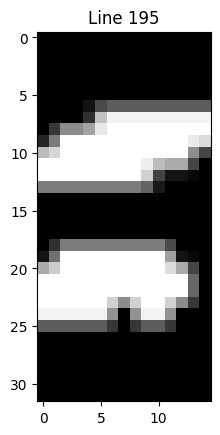

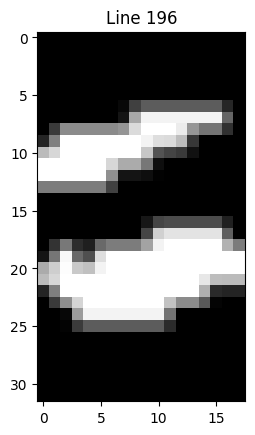

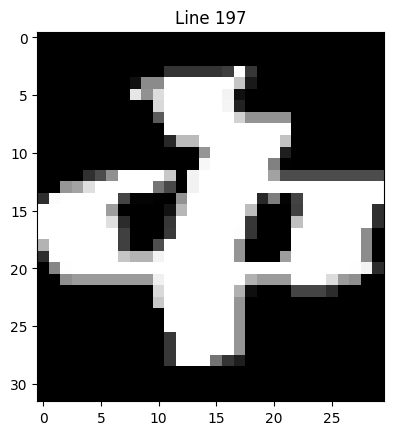

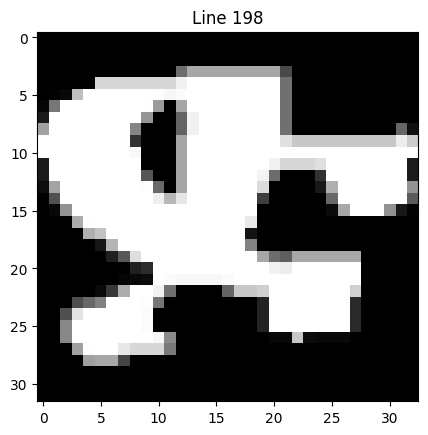

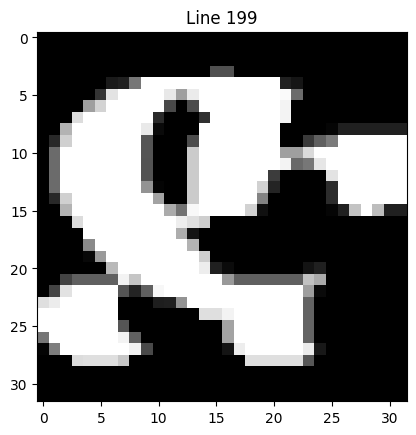

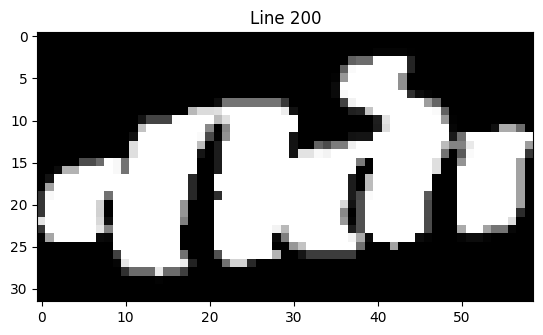

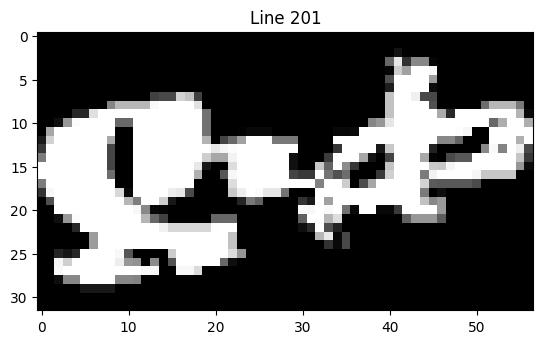

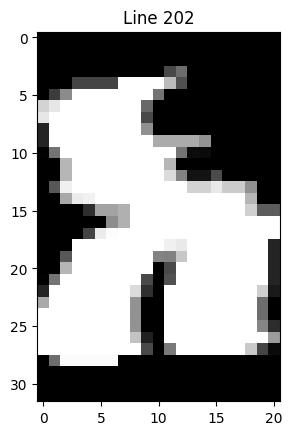

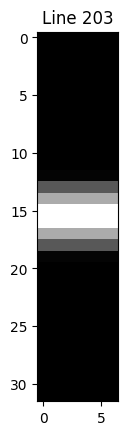

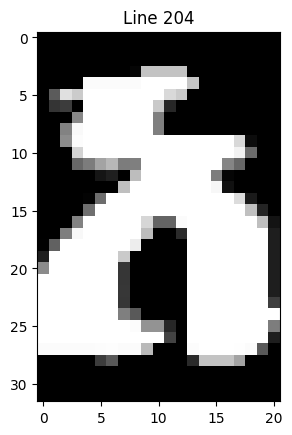

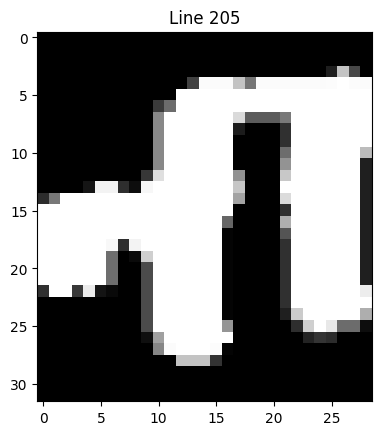

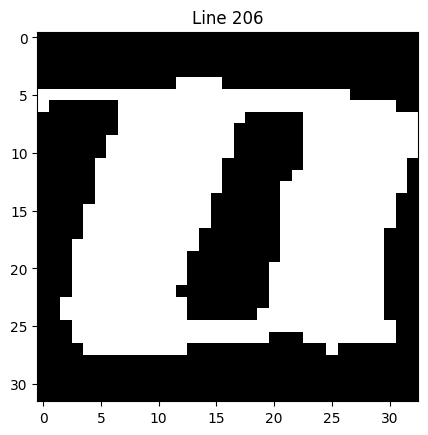

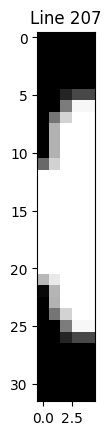

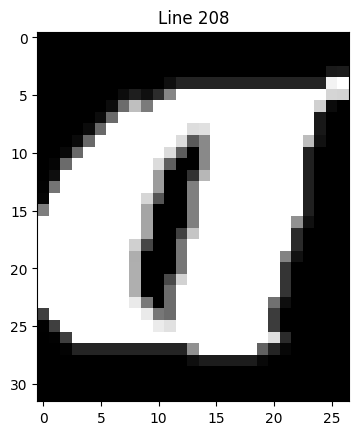

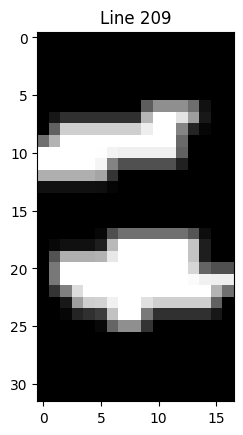

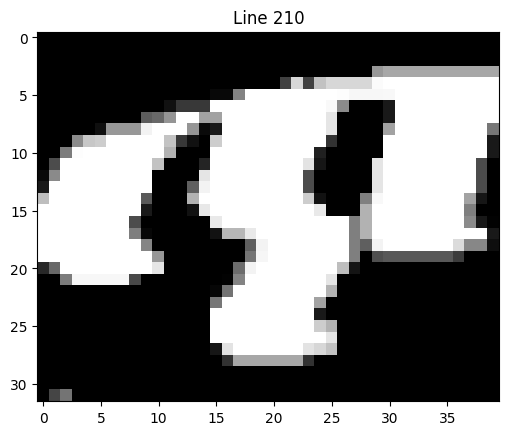

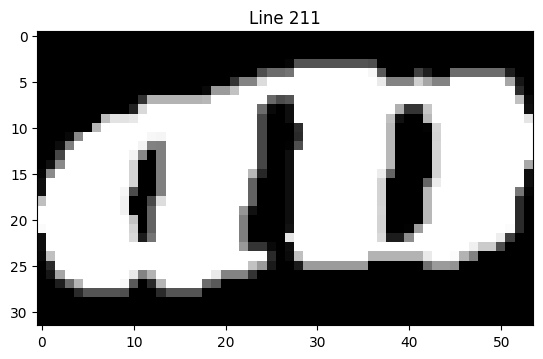

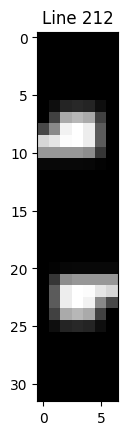

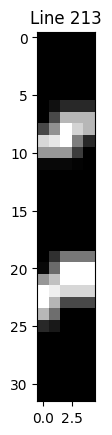

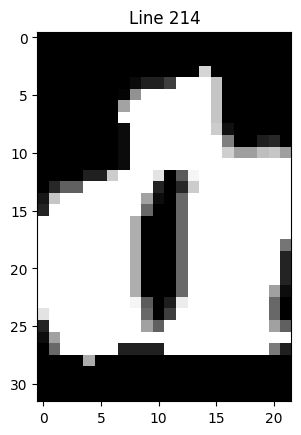

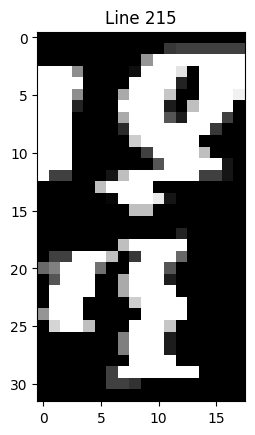

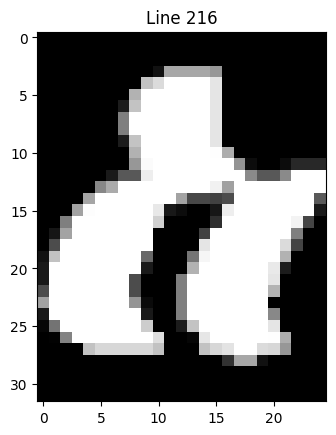

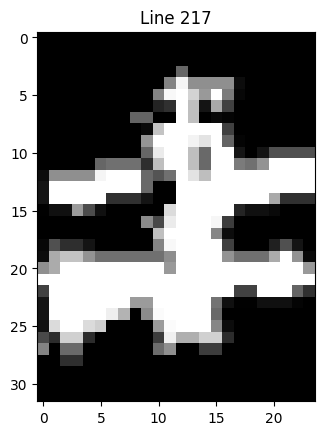

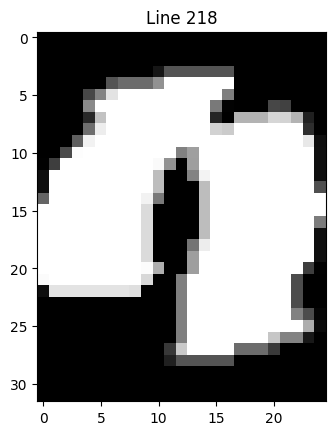

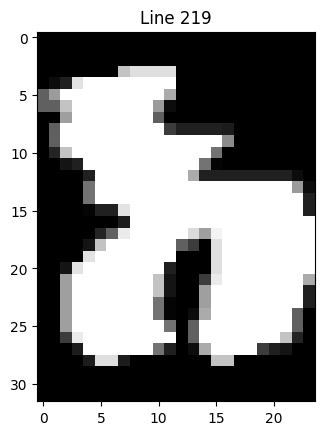

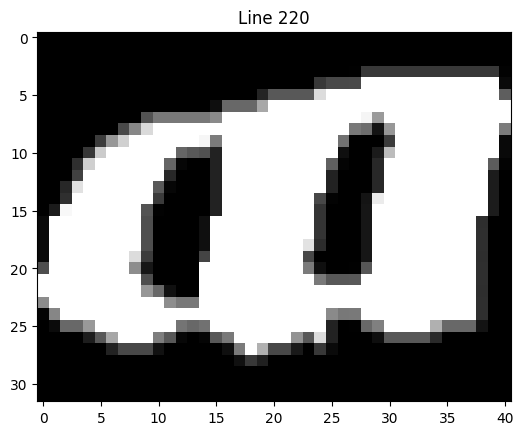

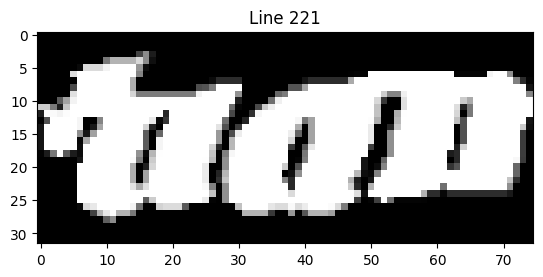

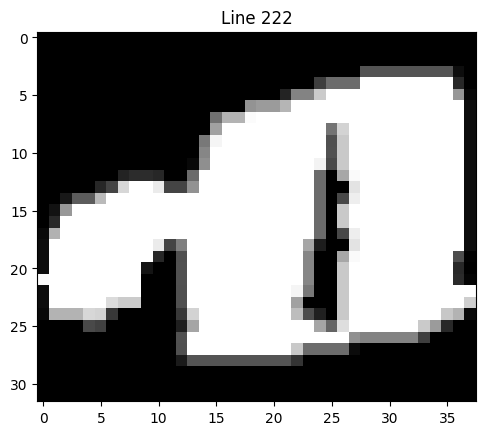

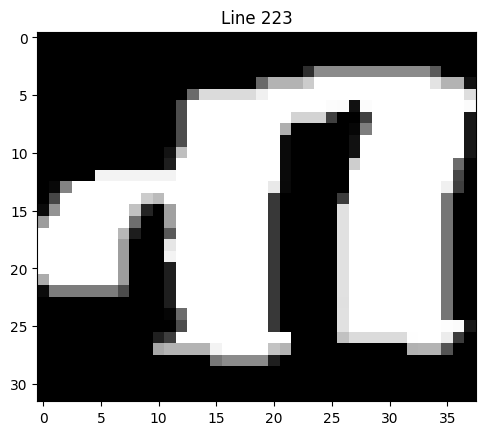

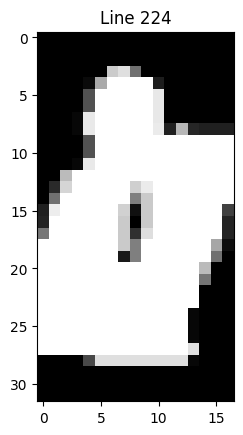

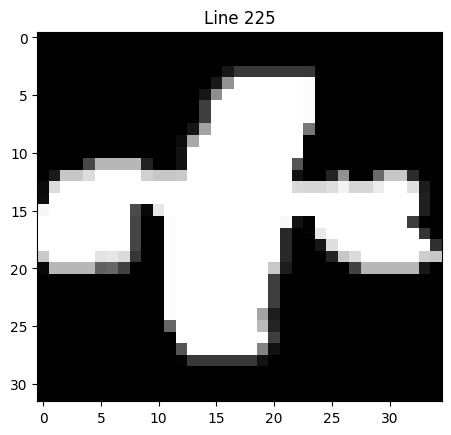

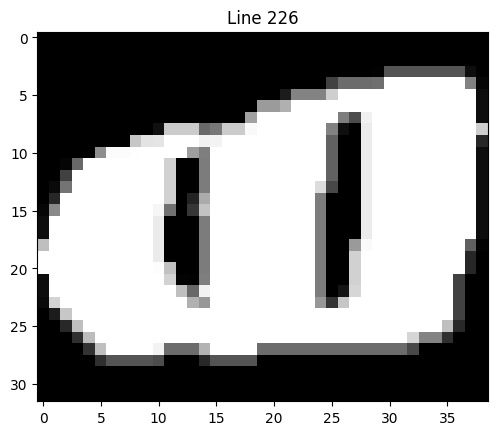

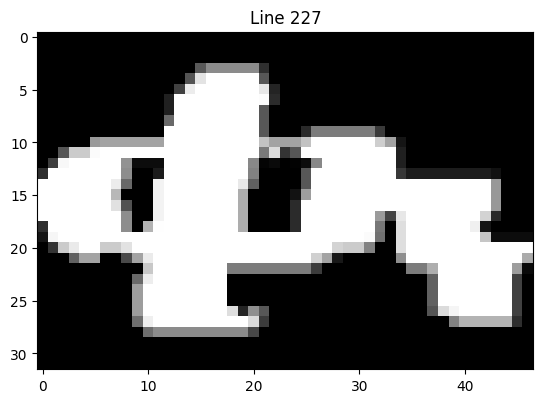

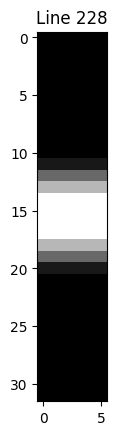

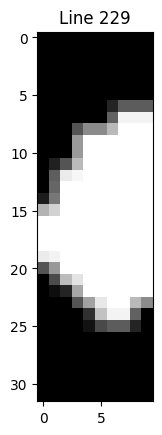

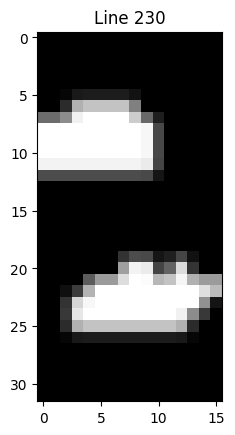

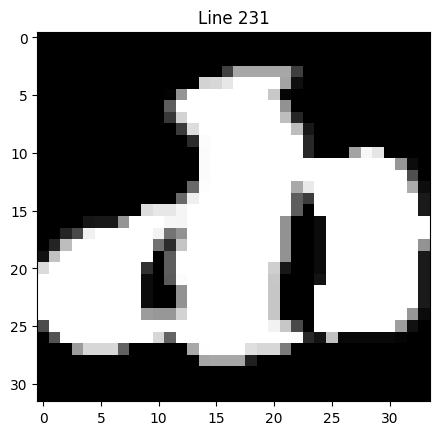

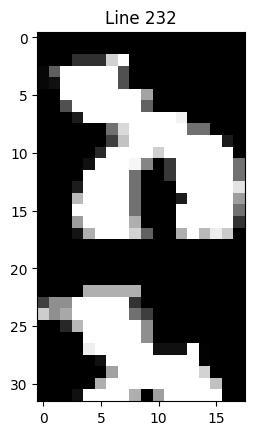

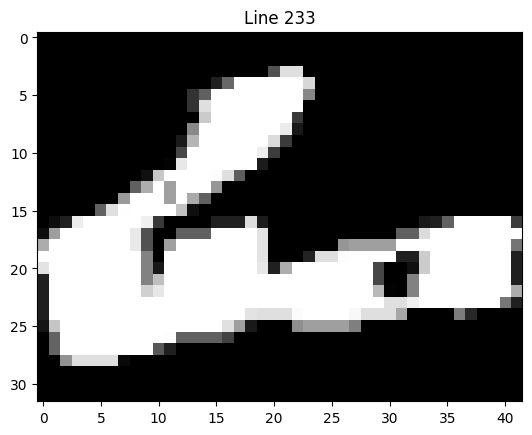

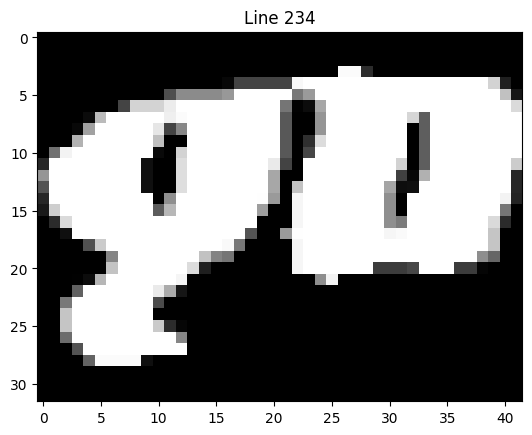

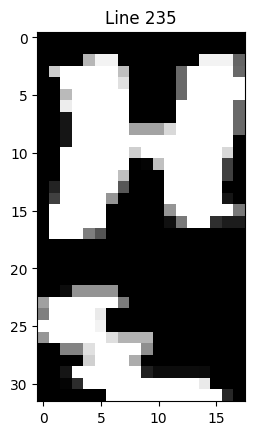

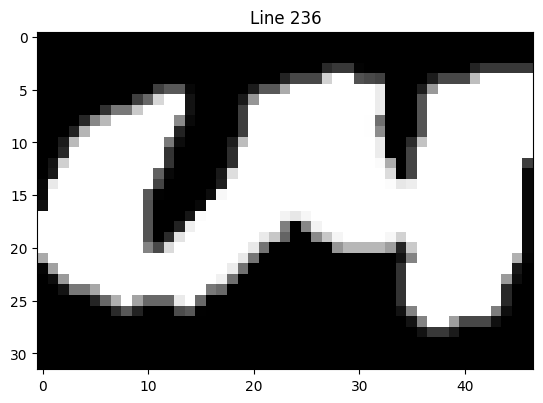

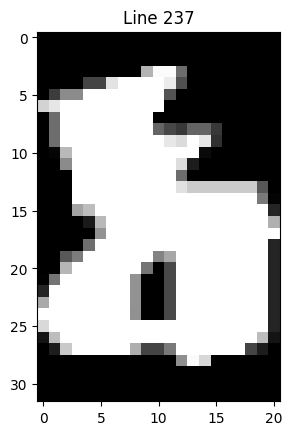

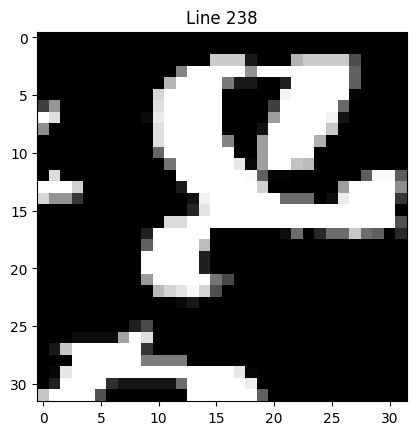

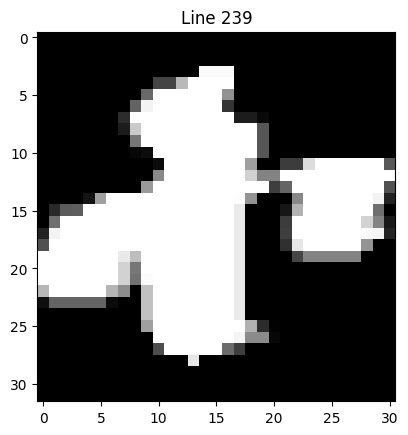

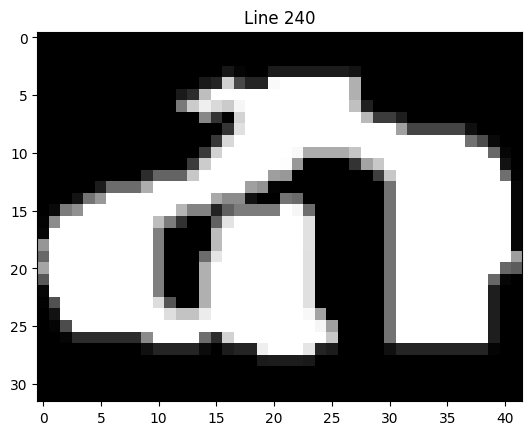

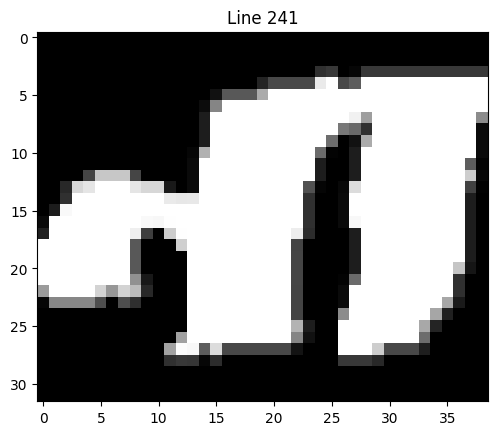

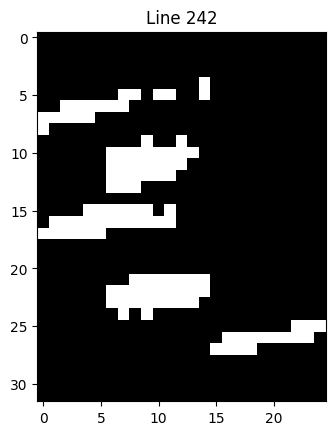

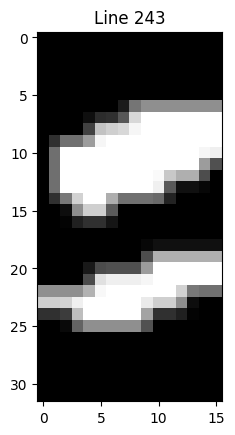

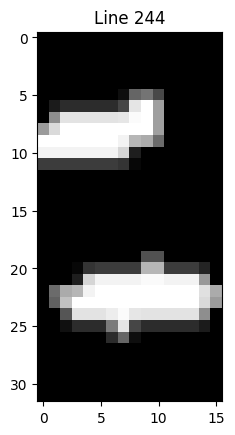

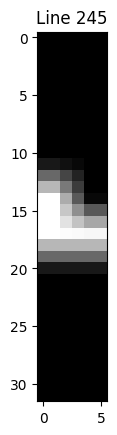

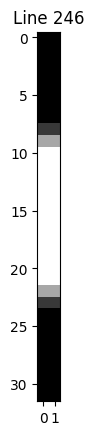

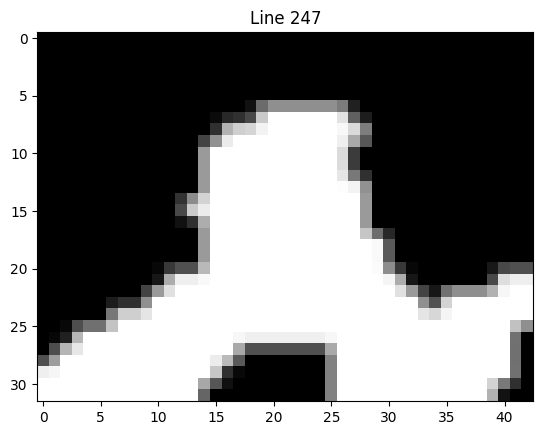

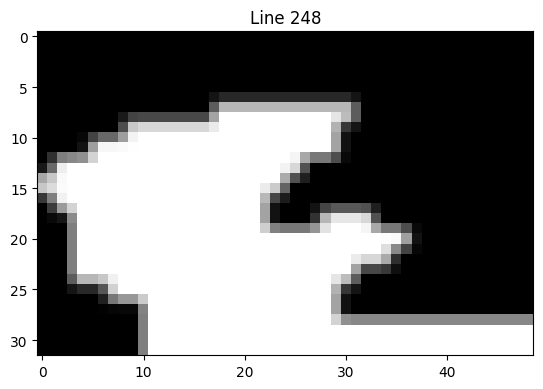

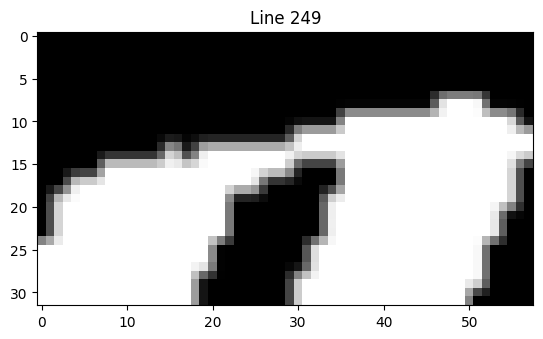

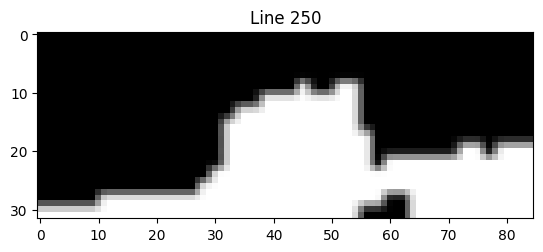

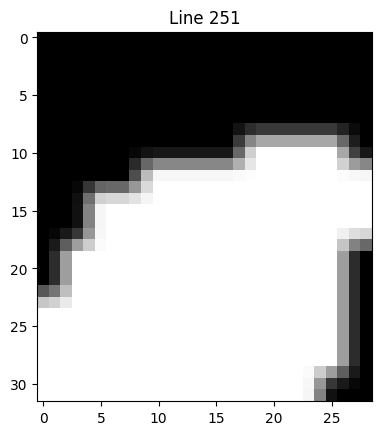

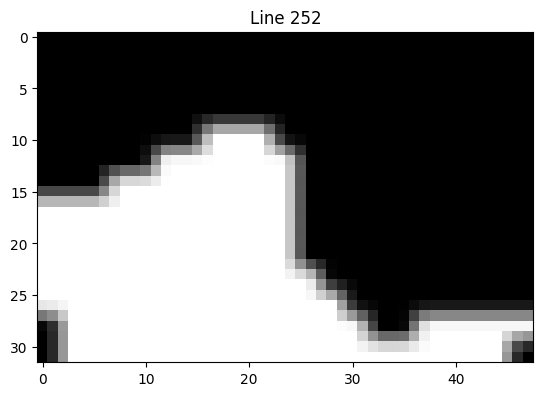

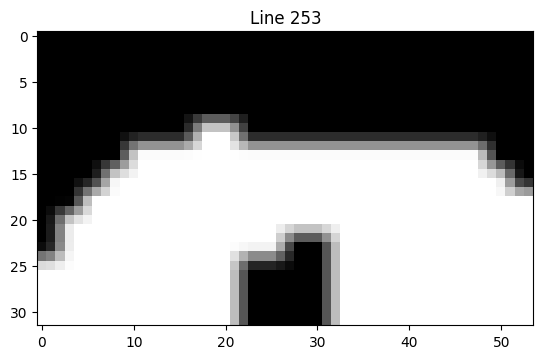

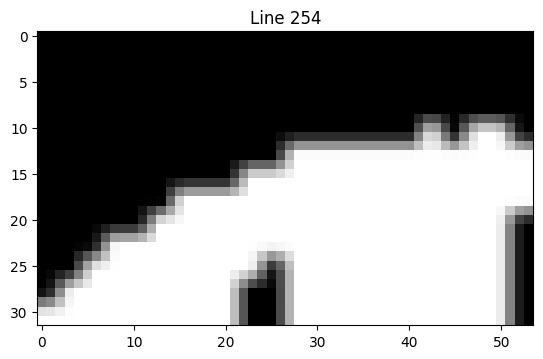

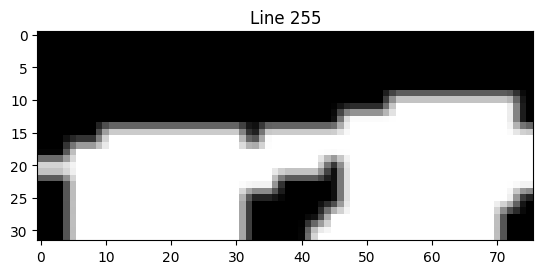

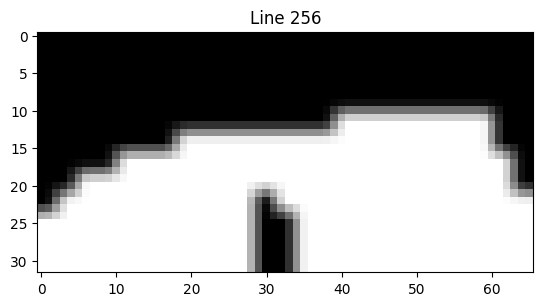

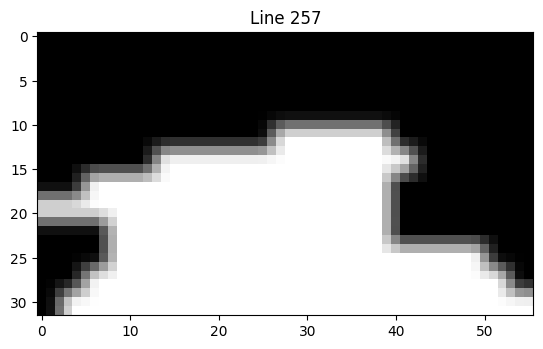

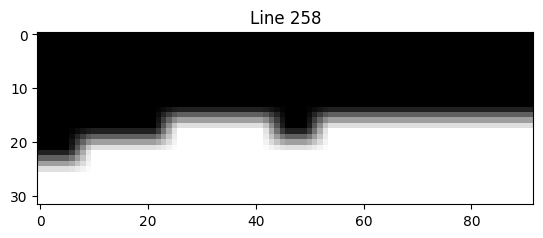

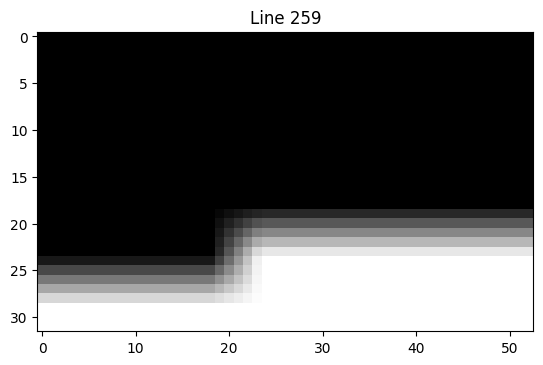

In [82]:
import sys
sys.path.append("/content/ocr_project")

from line_segmentation import segment_lines
from utils import load_grayscale_image
import matplotlib.pyplot as plt
from google.colab import files

# Upload a sample Ethiopic page
uploaded = files.upload()  # choose your image
page_path = list(uploaded.keys())[0]

# Load and segment lines
page_img = load_grayscale_image(page_path)
lines = segment_lines(page_img)
print(f"Detected {len(lines)} lines")

# Show segmented lines
for i, line in enumerate(lines):
    plt.imshow(line, cmap="gray")
    plt.title(f"Line {i+1}")
    plt.show()


In [84]:
import os

output_folder = "/content/ocr_project/output_lines"
os.makedirs(output_folder, exist_ok=True)

import cv2

for i, line_img in enumerate(lines):
    # Save each line as PNG
    filename = f"{output_folder}/line_{i+1}.png"
    cv2.imwrite(filename, line_img)

print(f"Saved {len(lines)} line images to {output_folder}")


Saved 259 line images to /content/ocr_project/output_lines


In [85]:
!ls /content/ocr_project/output_lines


line_100.png  line_148.png  line_195.png  line_241.png	line_54.png
line_101.png  line_149.png  line_196.png  line_242.png	line_55.png
line_102.png  line_14.png   line_197.png  line_243.png	line_56.png
line_103.png  line_150.png  line_198.png  line_244.png	line_57.png
line_104.png  line_151.png  line_199.png  line_245.png	line_58.png
line_105.png  line_152.png  line_19.png   line_246.png	line_59.png
line_106.png  line_153.png  line_1.png	  line_247.png	line_5.png
line_107.png  line_154.png  line_200.png  line_248.png	line_60.png
line_108.png  line_155.png  line_201.png  line_249.png	line_61.png
line_109.png  line_156.png  line_202.png  line_24.png	line_62.png
line_10.png   line_157.png  line_203.png  line_250.png	line_63.png
line_110.png  line_158.png  line_204.png  line_251.png	line_64.png
line_111.png  line_159.png  line_205.png  line_252.png	line_65.png
line_112.png  line_15.png   line_206.png  line_253.png	line_66.png
line_113.png  line_160.png  line_207.png  line_254.png	line_67.pn

In [86]:
from google.colab import files
import glob

# Download all line images
for file in glob.glob(f"{output_folder}/*.png"):
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
import shutil

# Folder containing line images
output_folder = "/content/ocr_project/output_lines"

# Name of the zip file
zip_filename = "/content/ethiopic_lines.zip"

# Create a zip file of the entire folder
shutil.make_archive(zip_filename.replace(".zip",""), 'zip', output_folder)

print("All line images zipped successfully!")


All line images zipped successfully!


In [88]:
from google.colab import files

files.download("/content/ethiopic_lines.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Upload your Ethiopic manuscript page:


Saving ethiopic_page.png to ethiopic_page (2).png
Detected and saved 142 line images in /content/ocr_project/output_lines


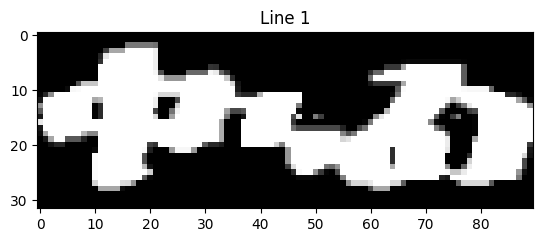

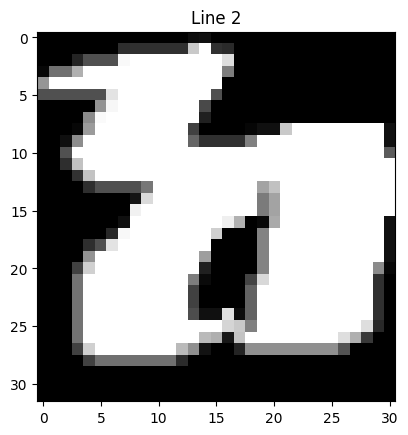

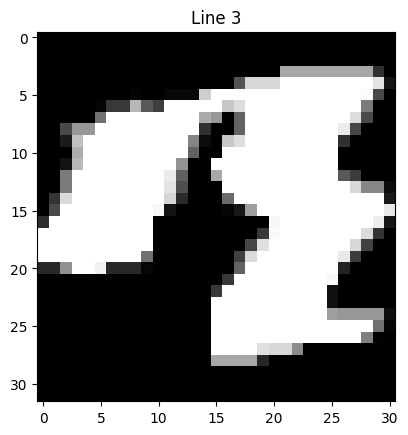

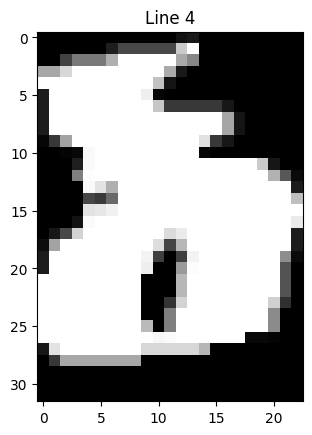

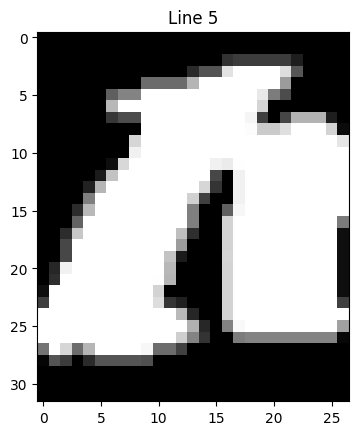

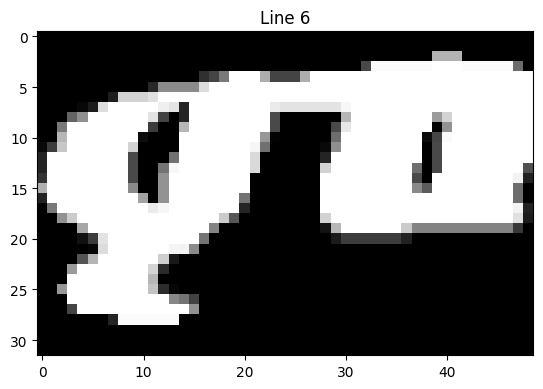

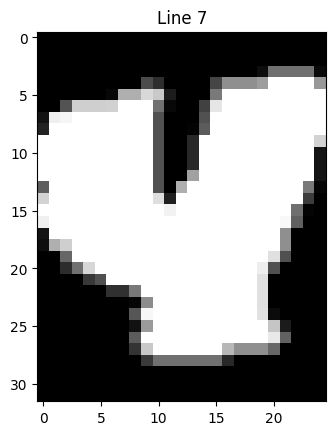

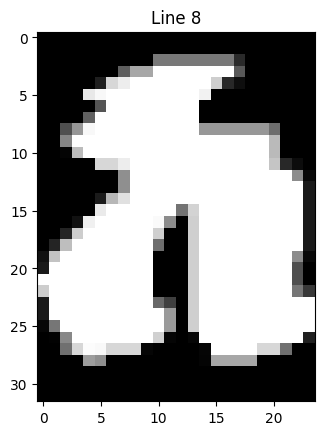

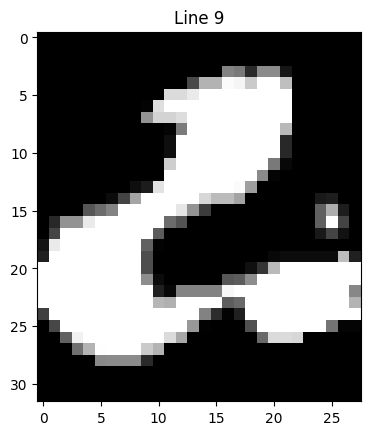

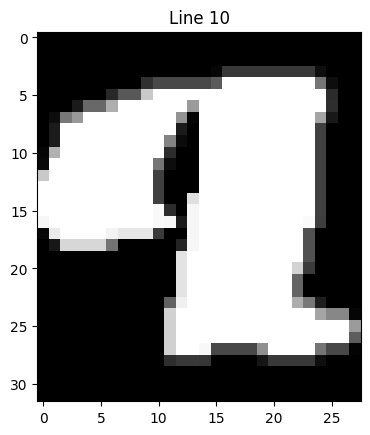

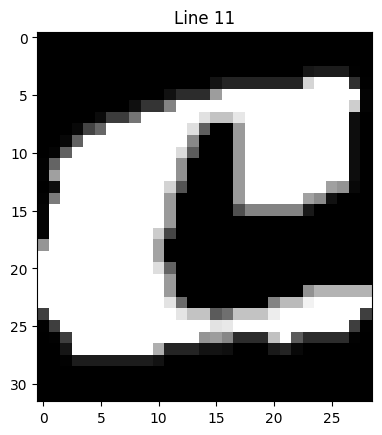

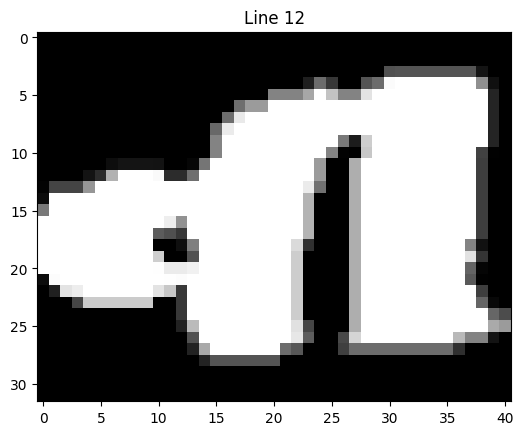

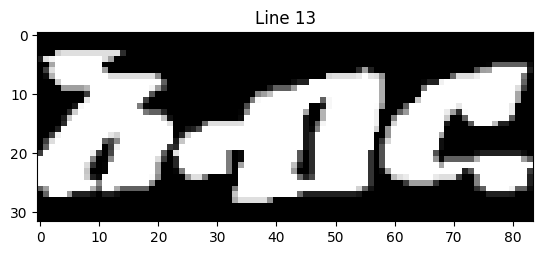

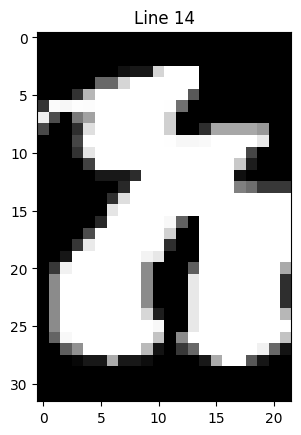

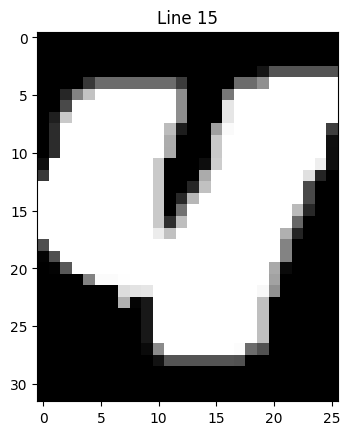

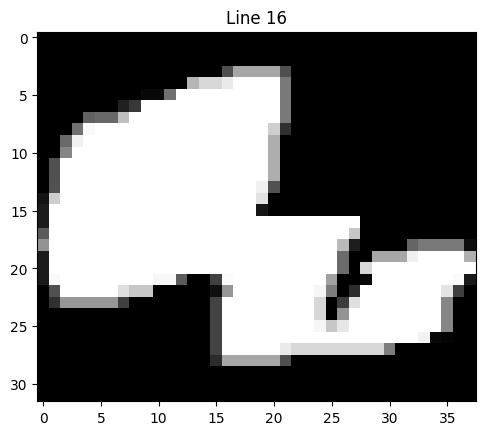

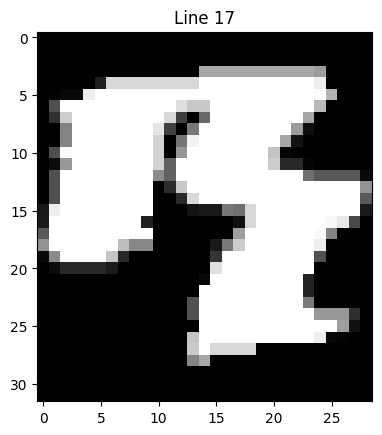

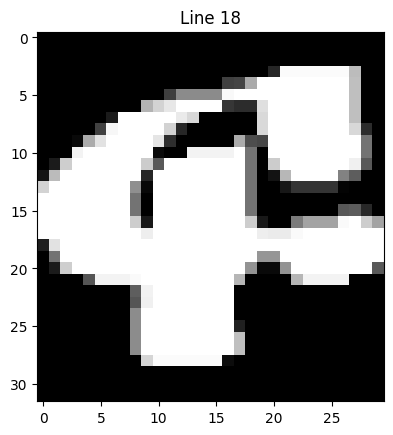

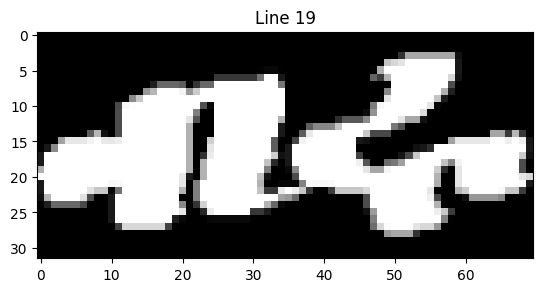

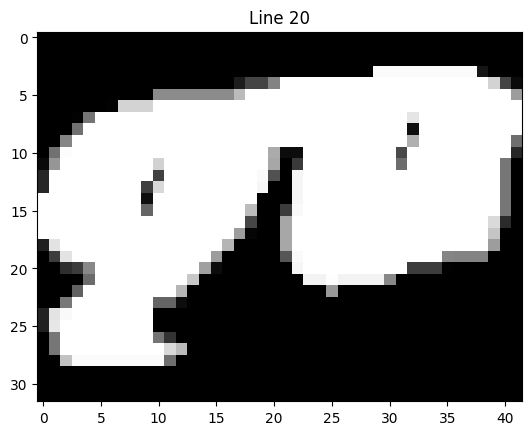

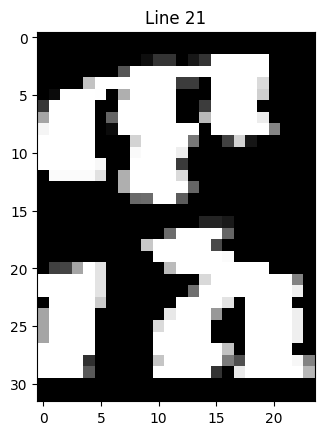

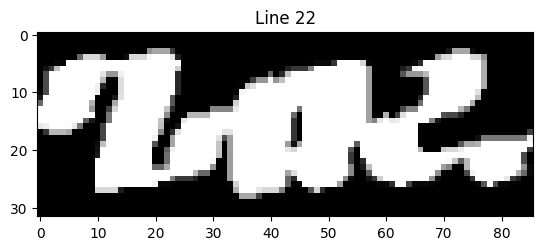

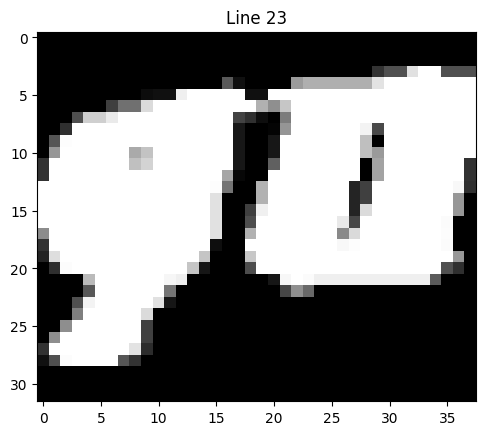

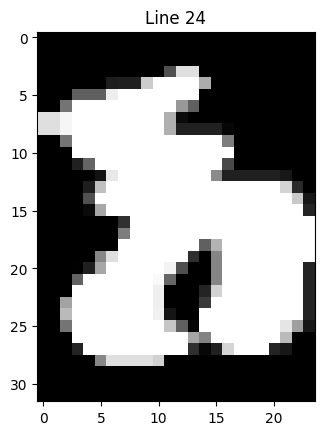

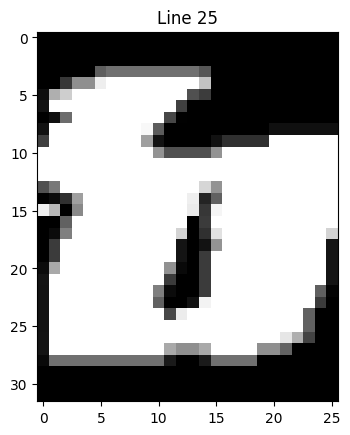

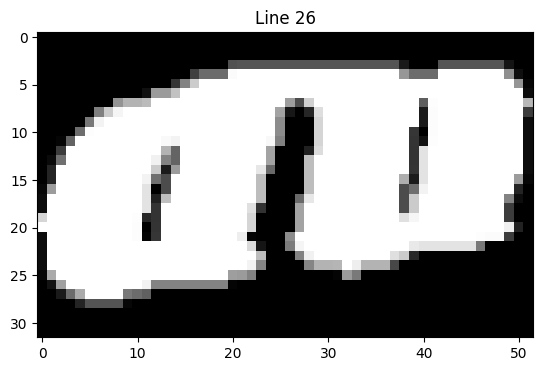

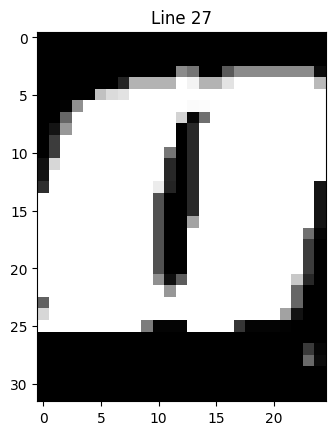

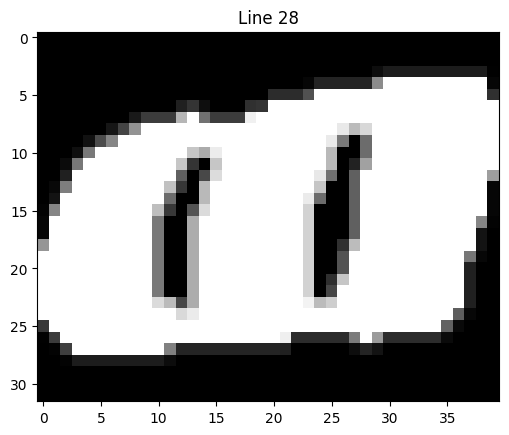

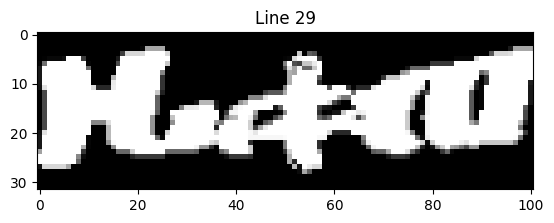

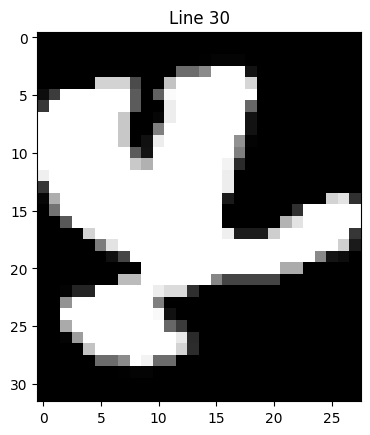

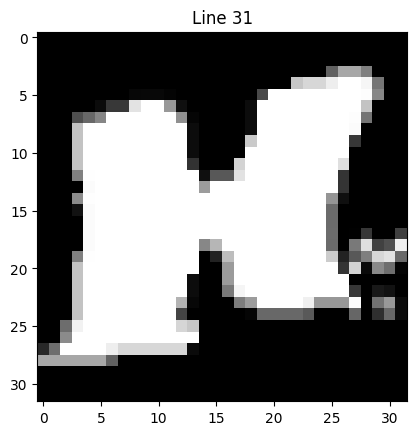

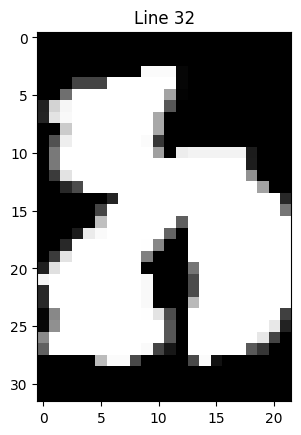

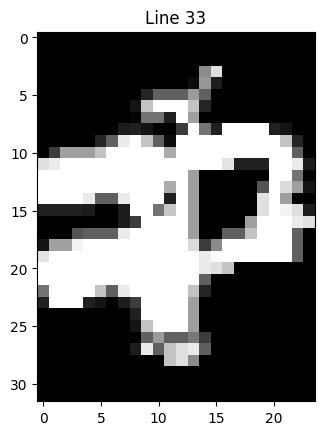

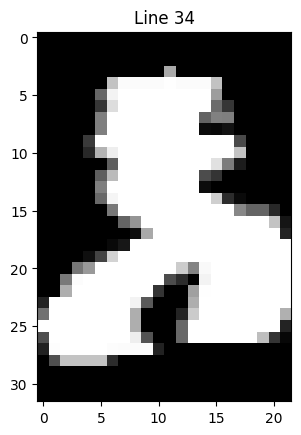

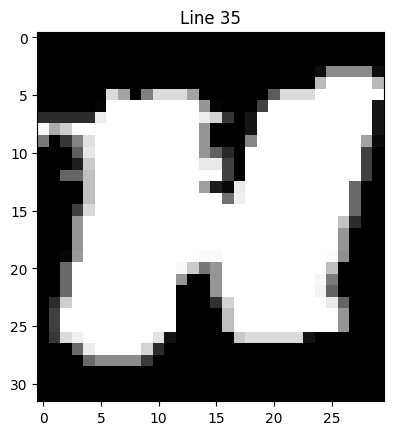

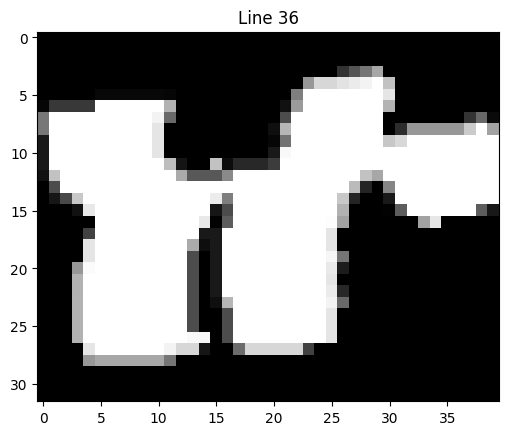

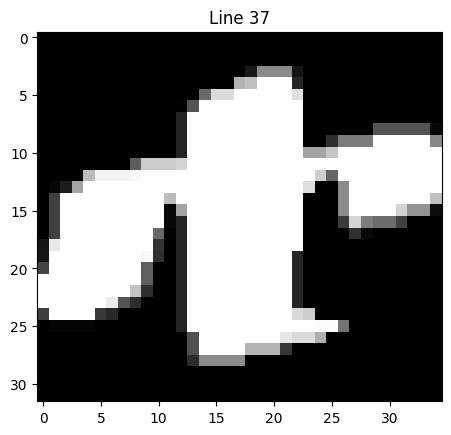

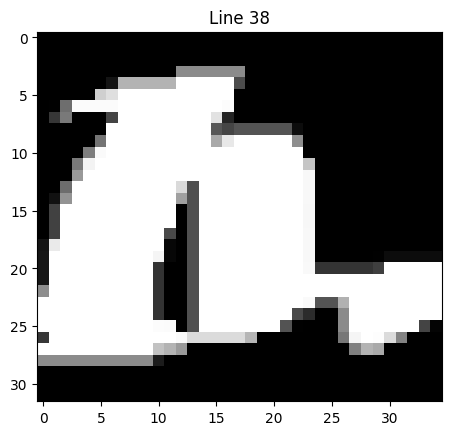

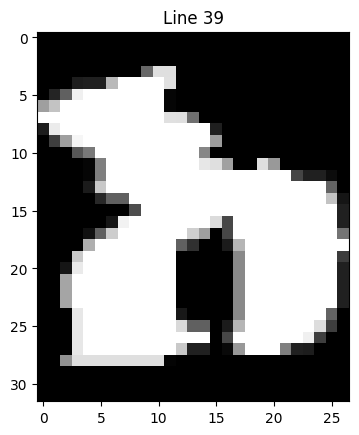

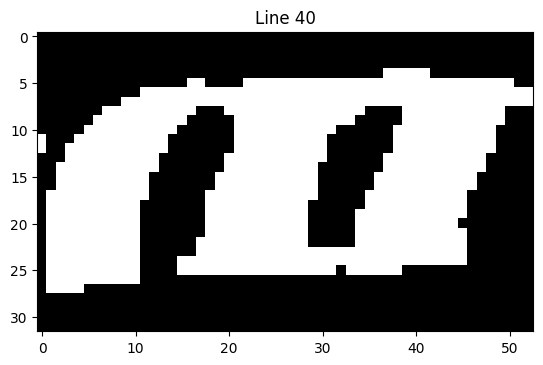

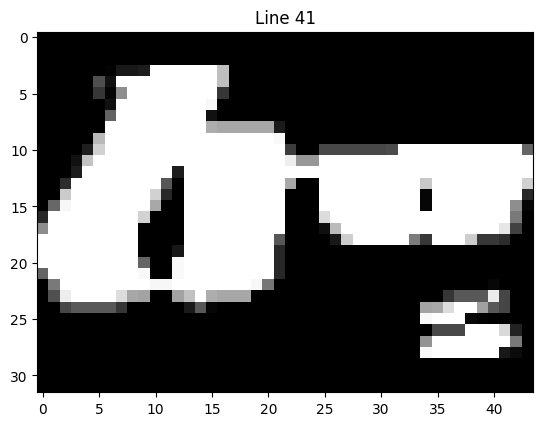

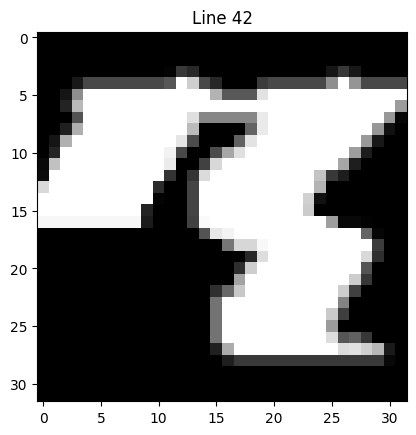

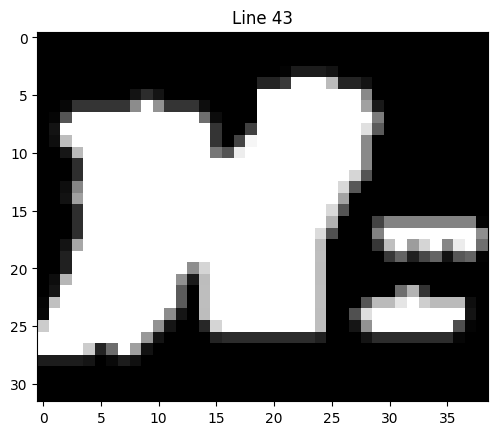

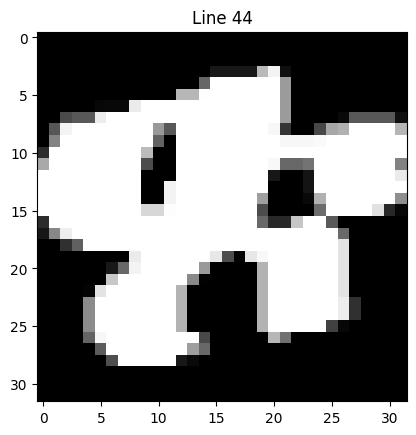

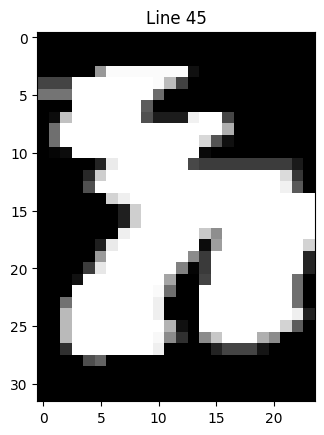

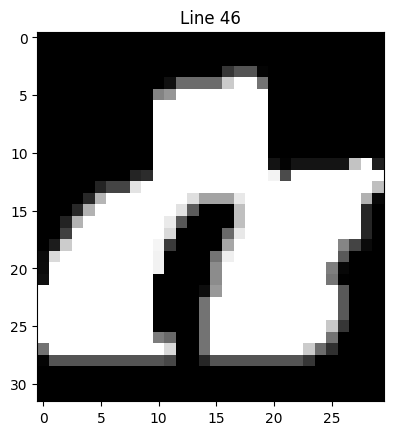

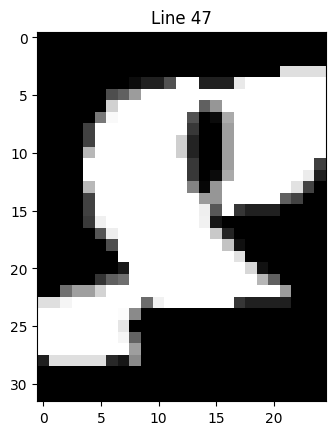

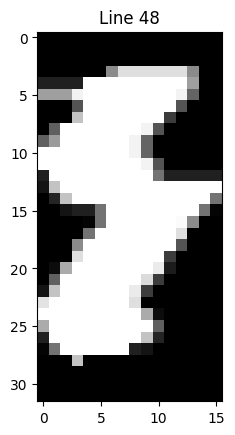

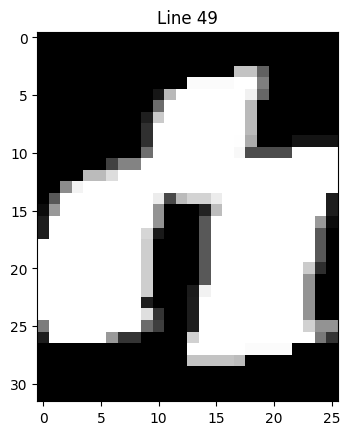

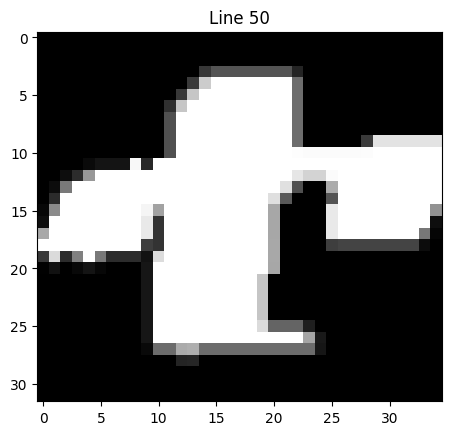

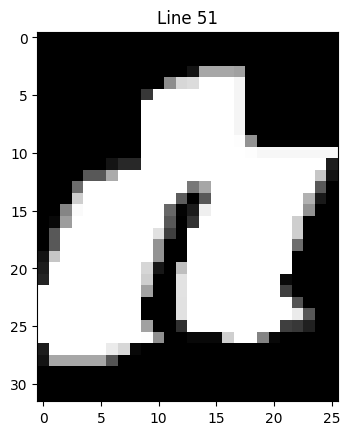

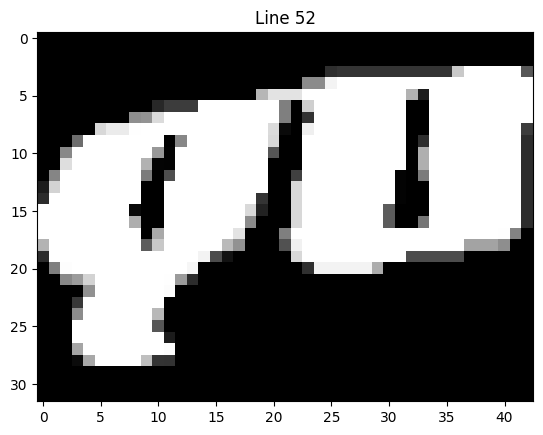

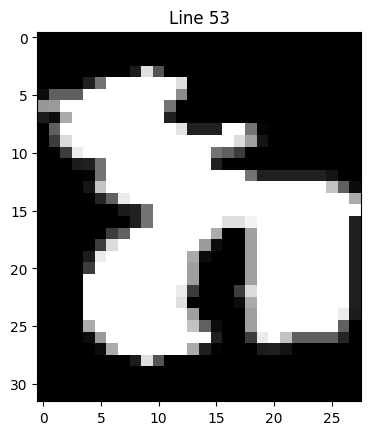

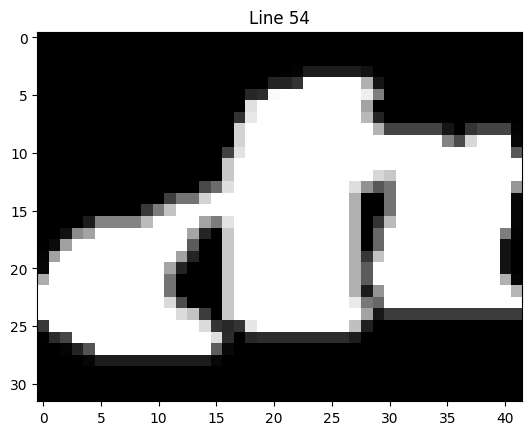

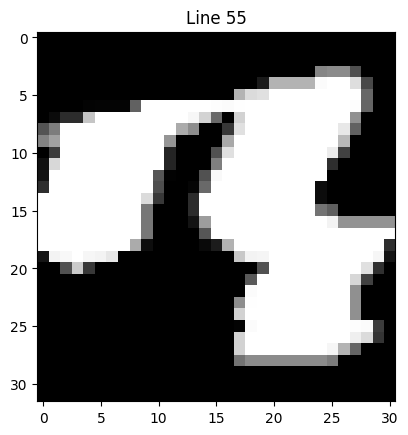

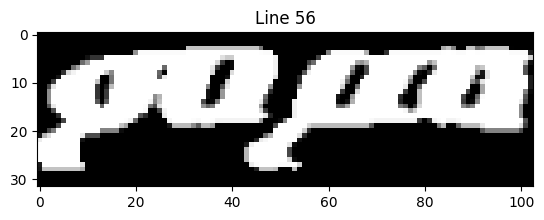

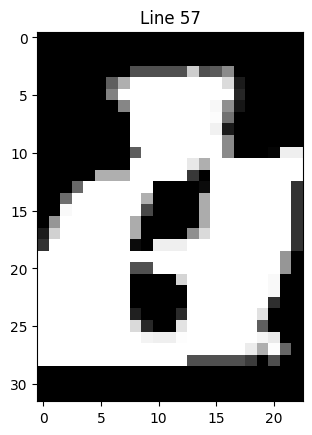

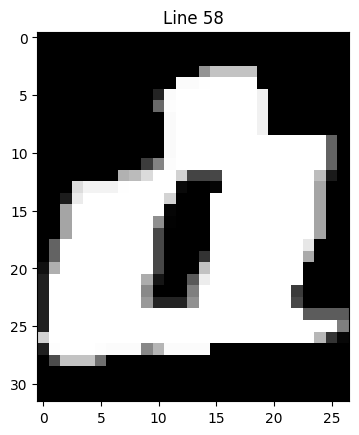

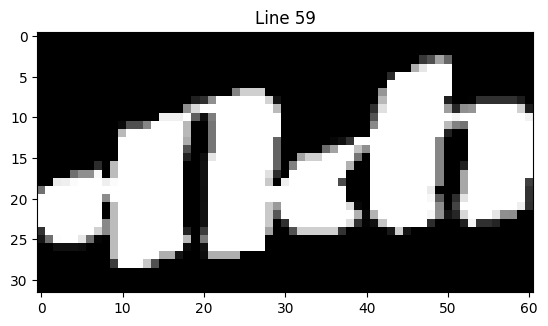

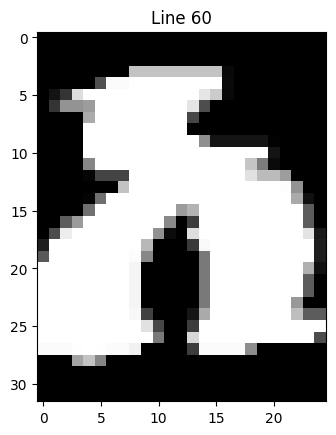

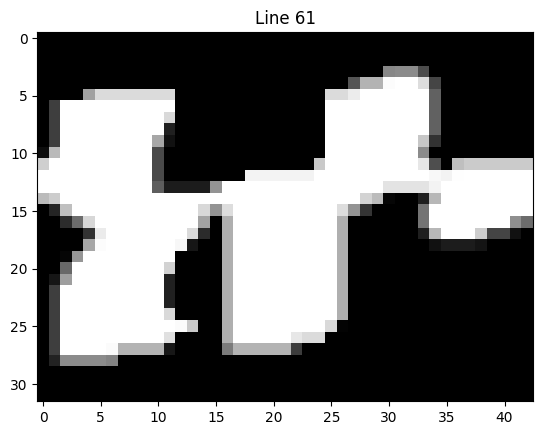

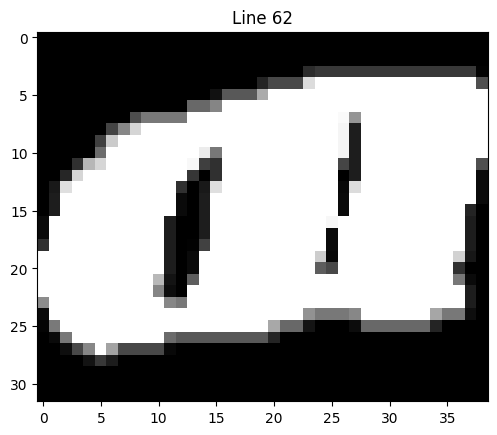

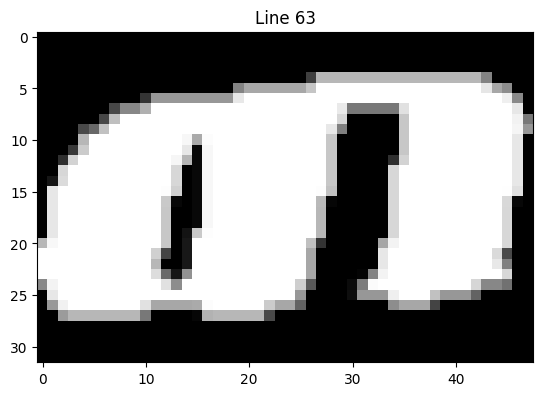

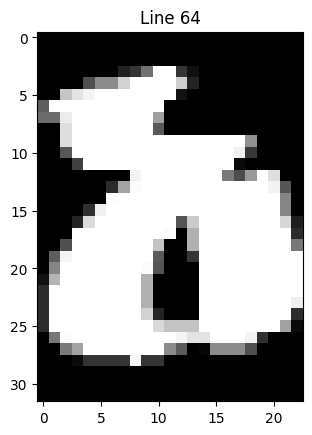

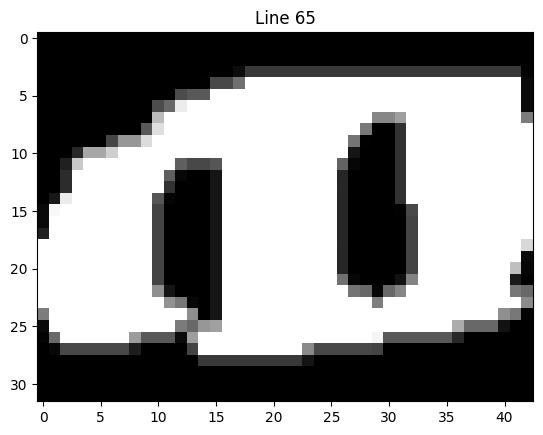

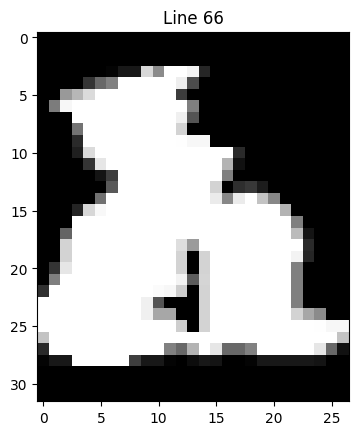

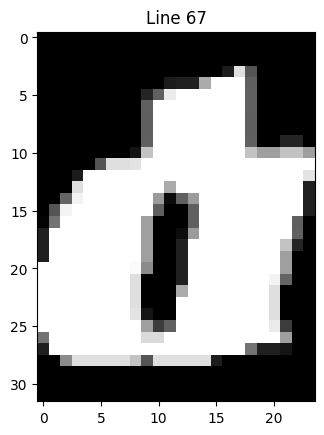

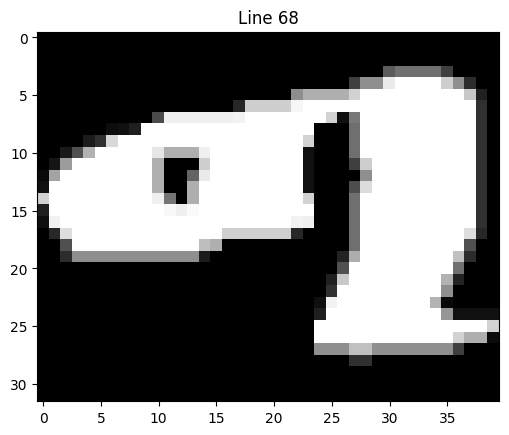

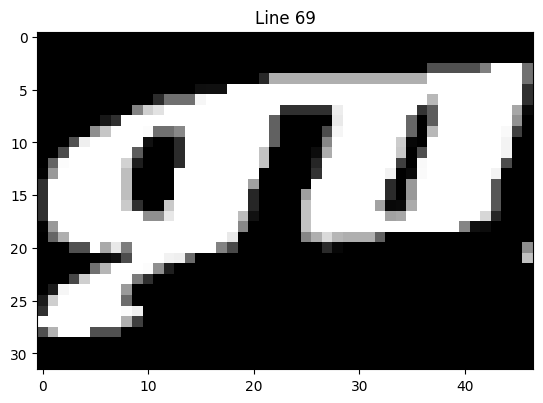

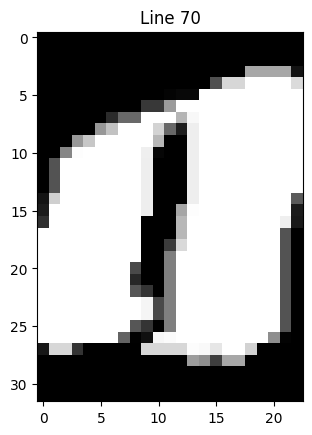

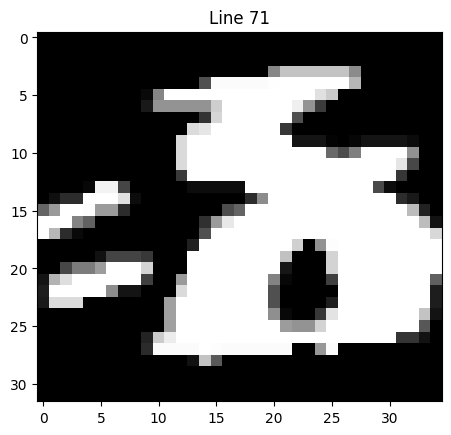

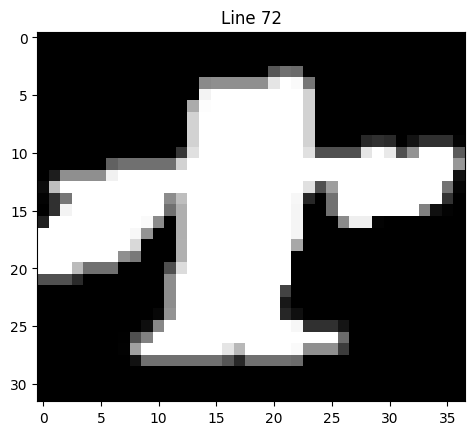

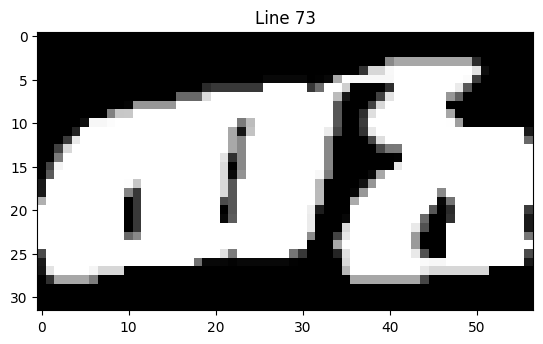

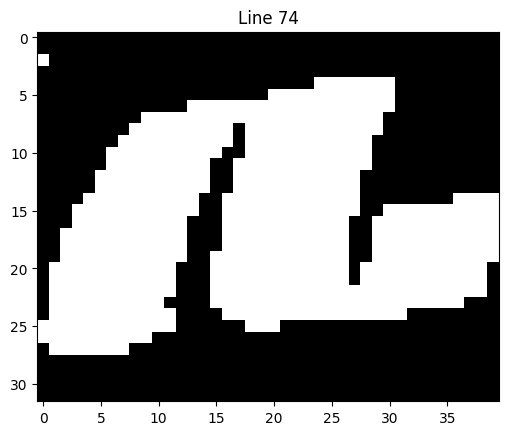

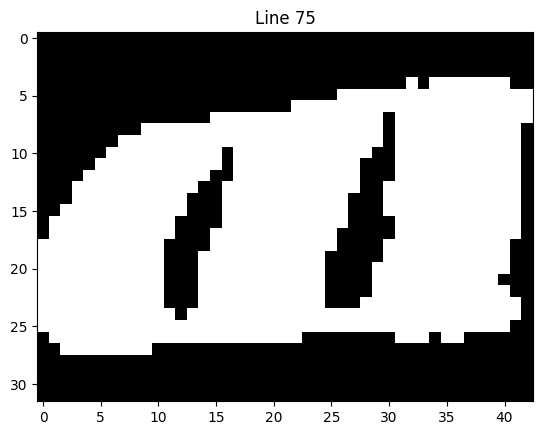

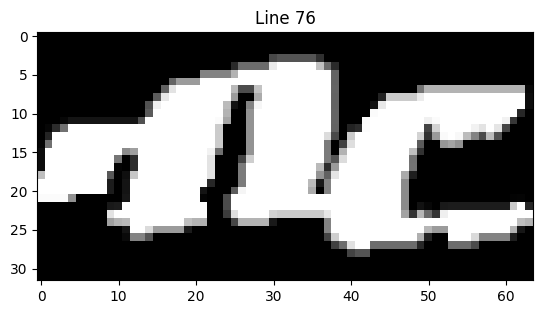

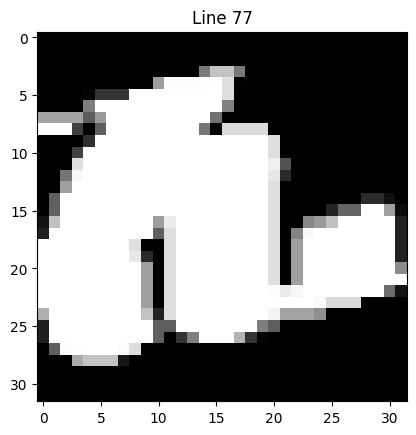

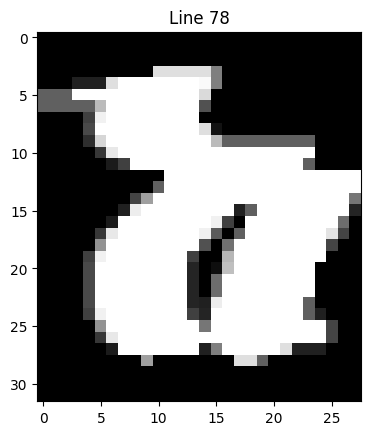

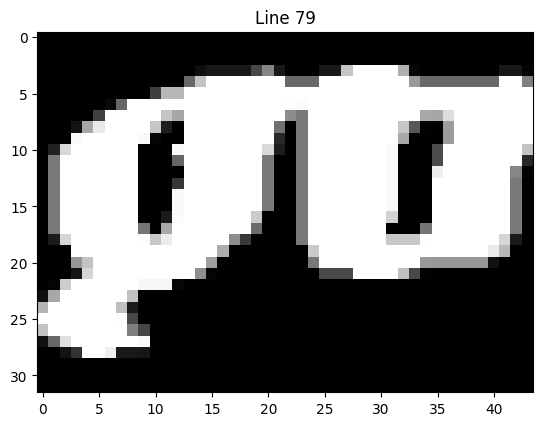

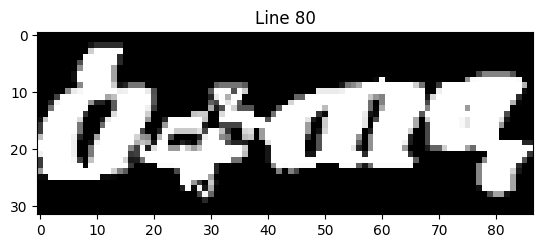

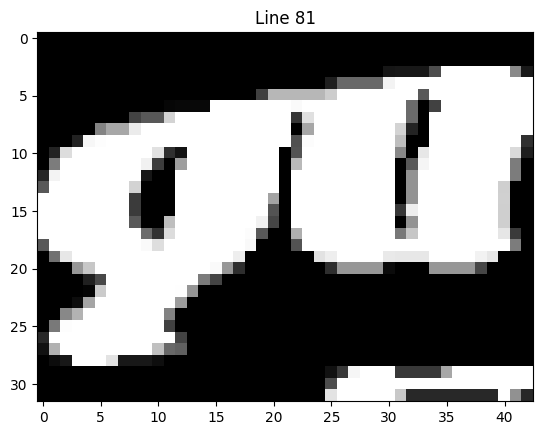

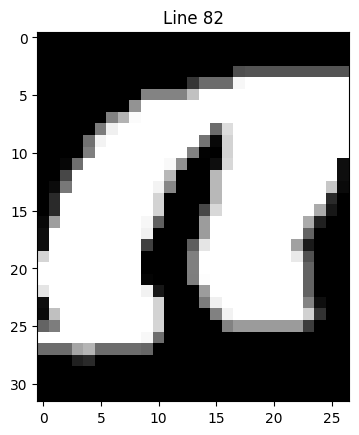

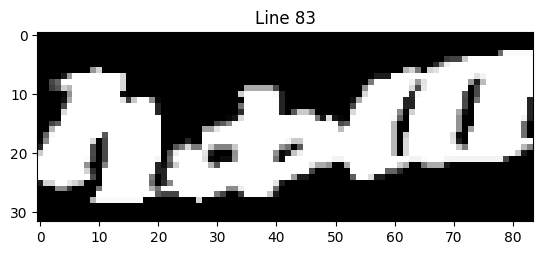

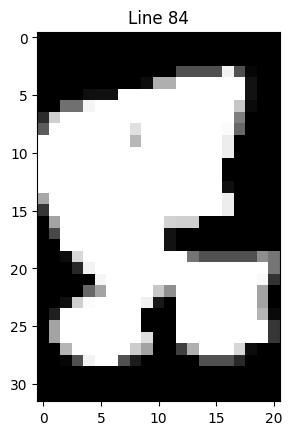

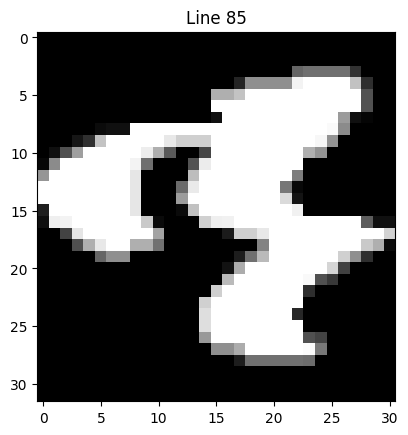

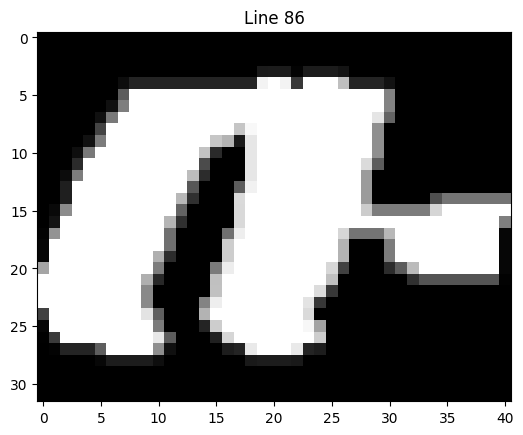

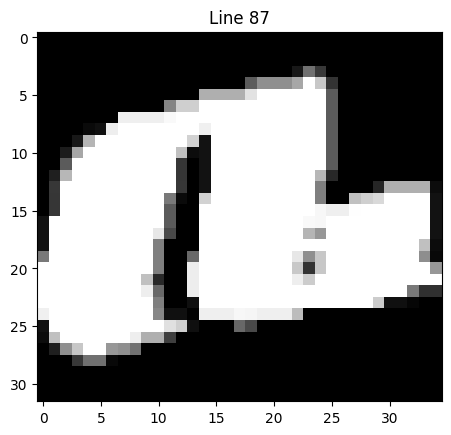

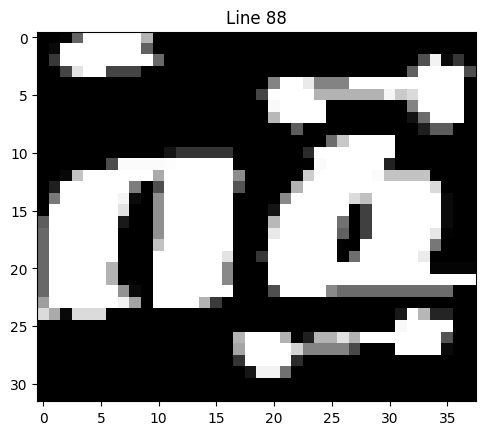

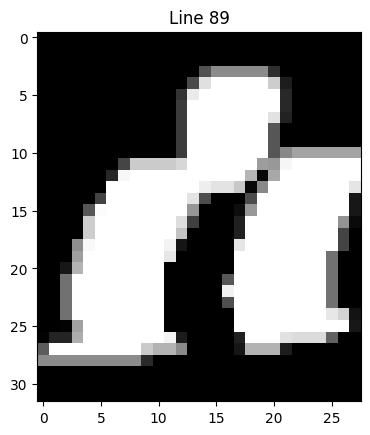

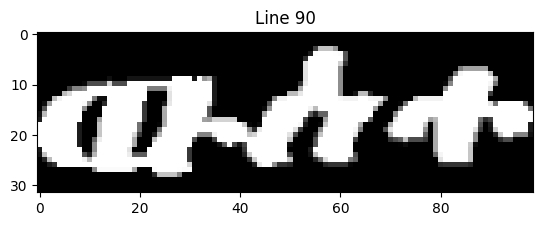

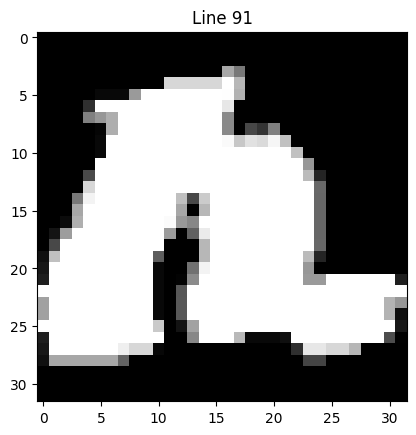

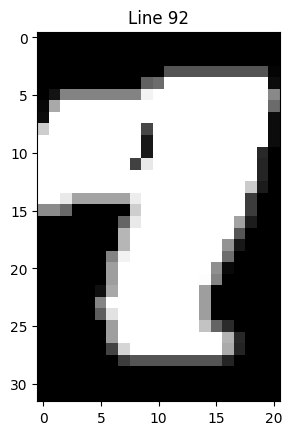

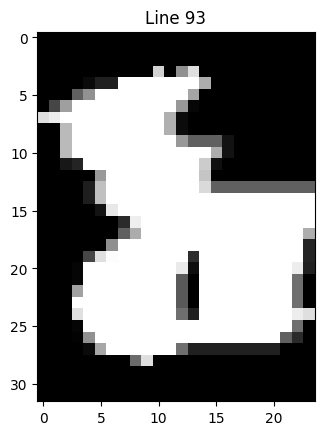

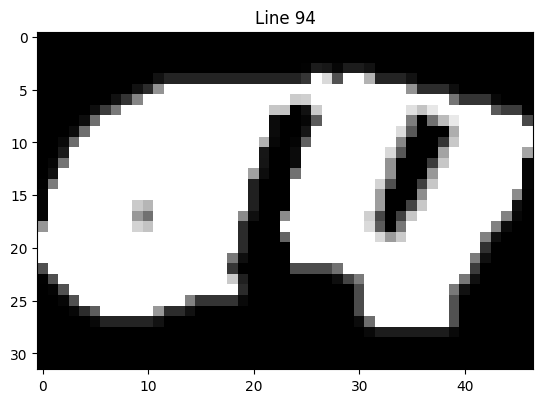

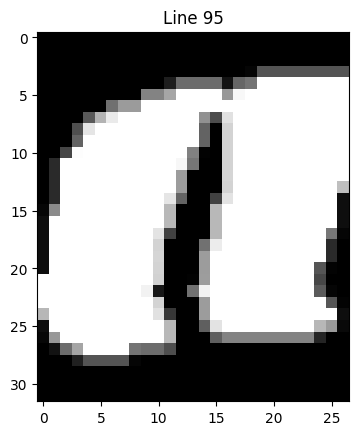

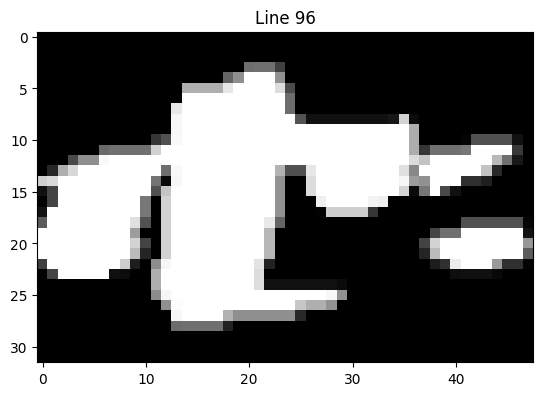

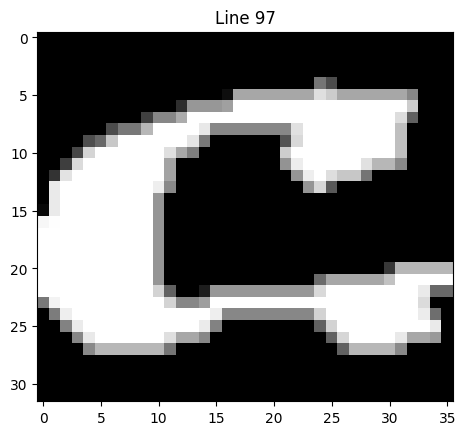

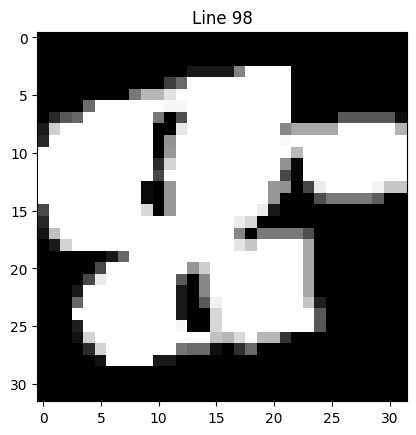

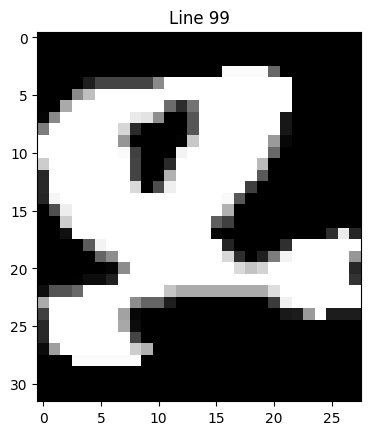

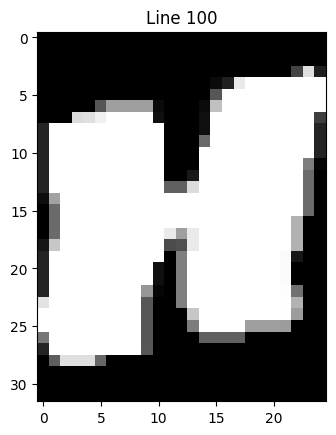

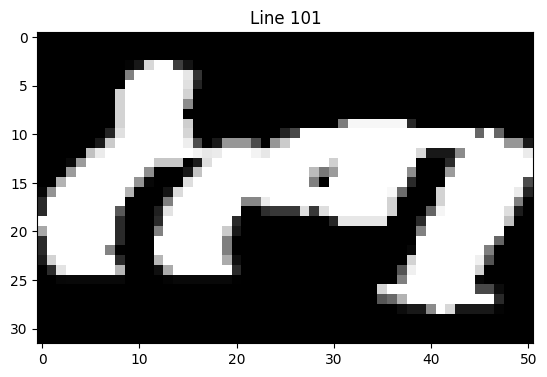

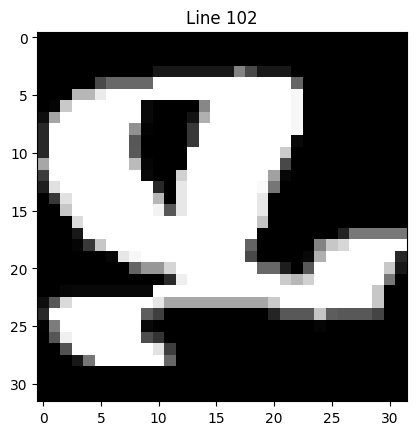

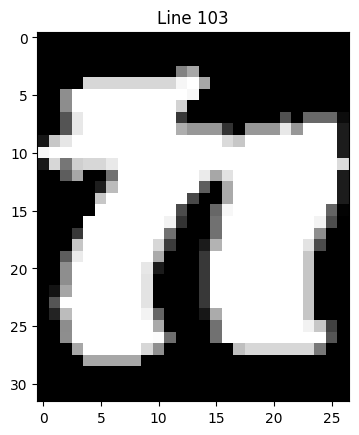

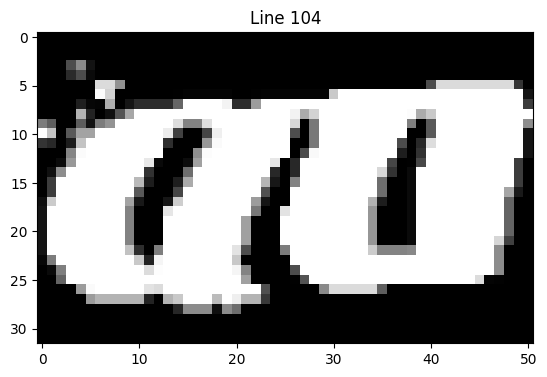

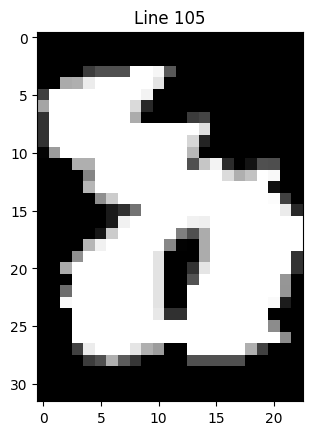

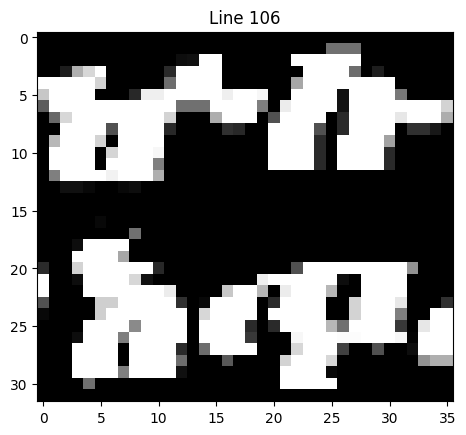

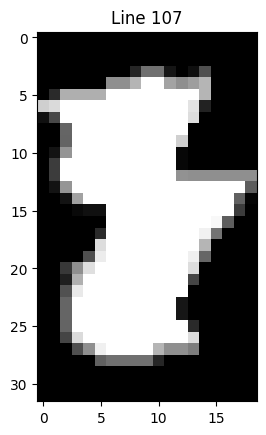

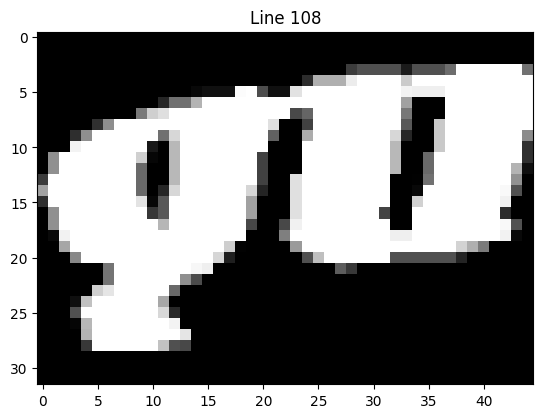

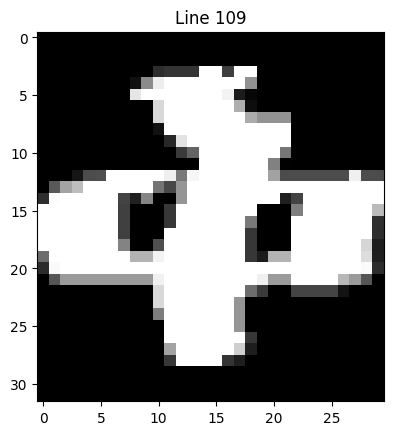

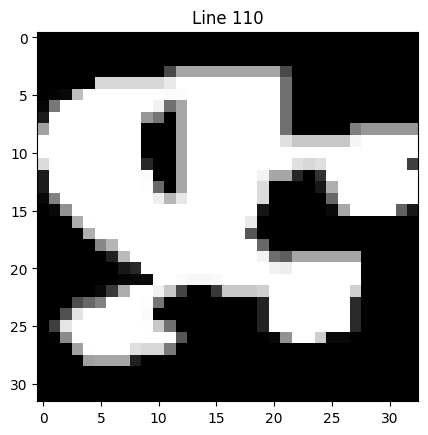

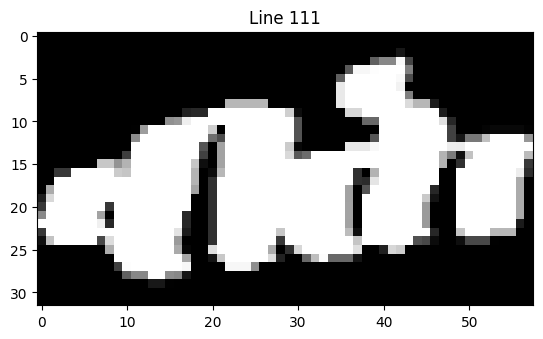

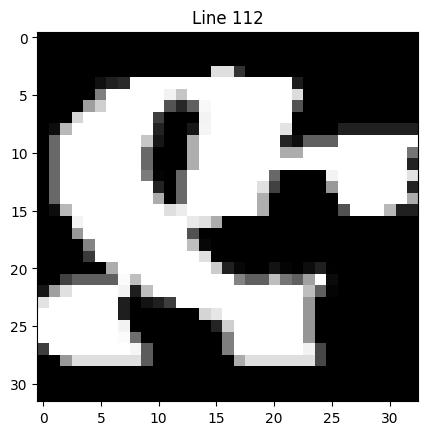

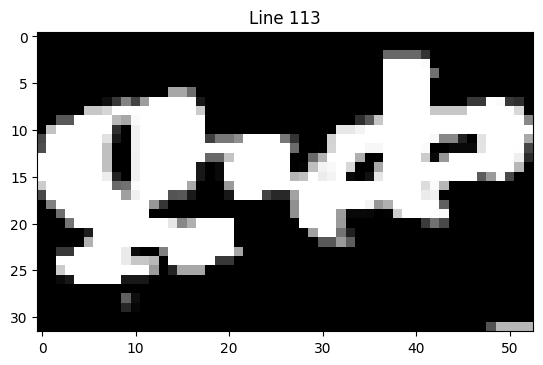

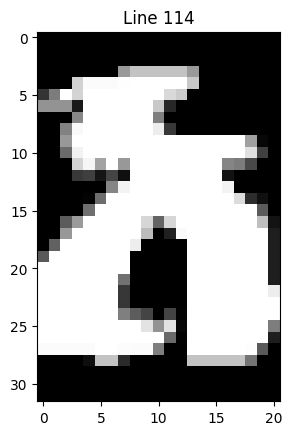

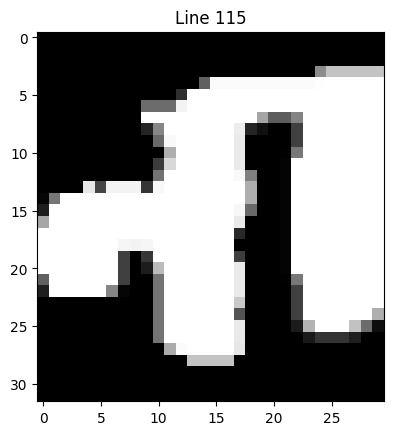

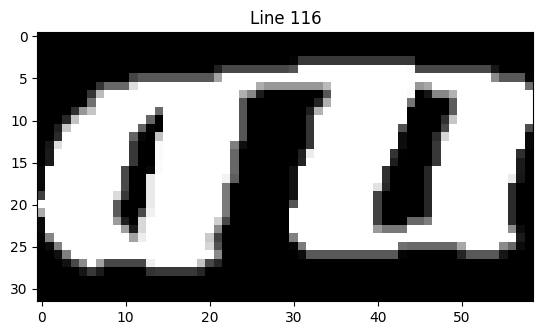

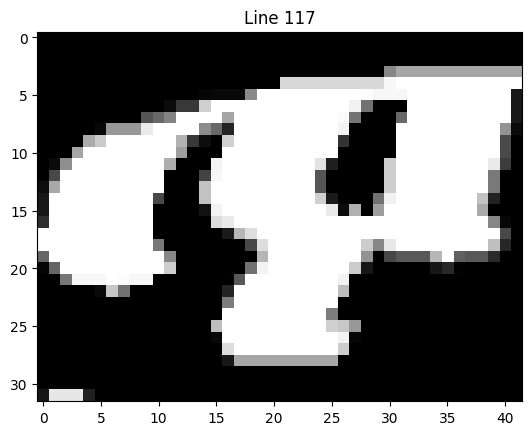

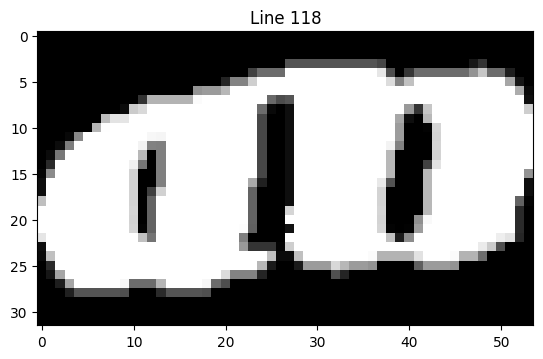

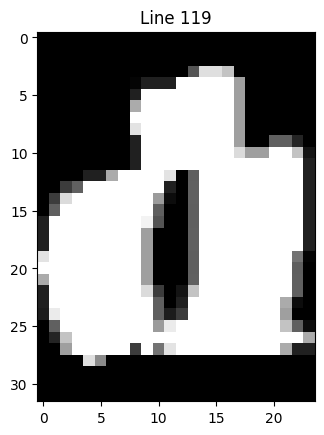

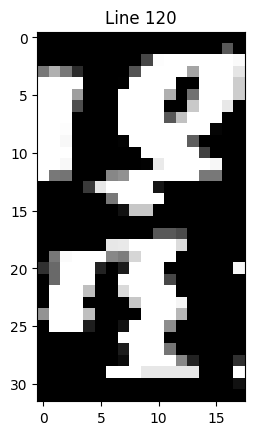

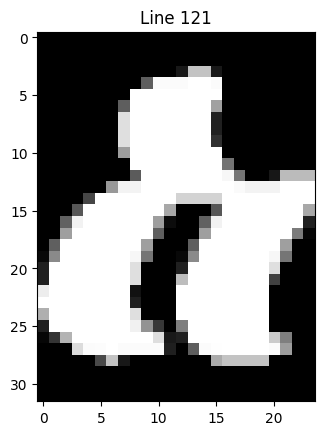

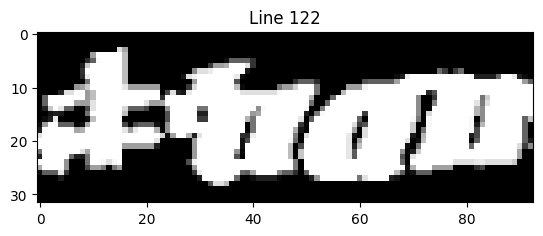

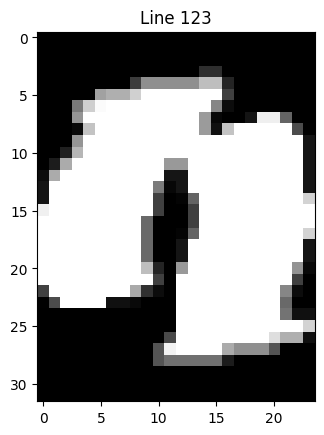

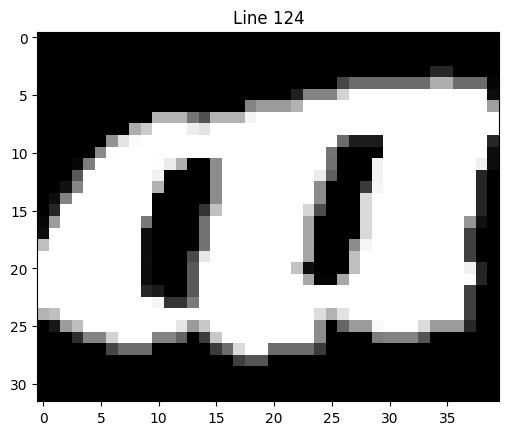

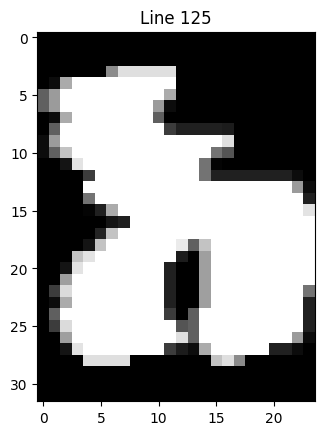

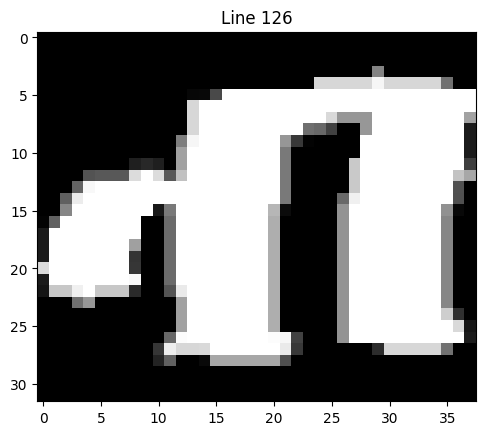

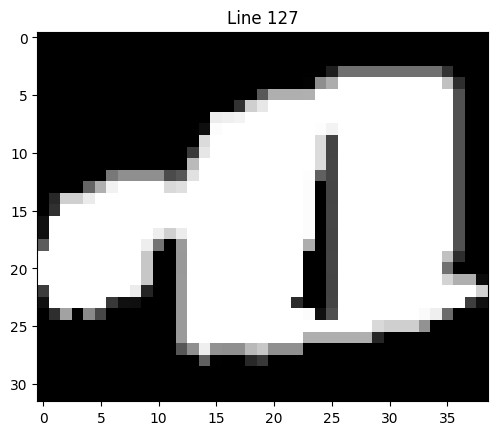

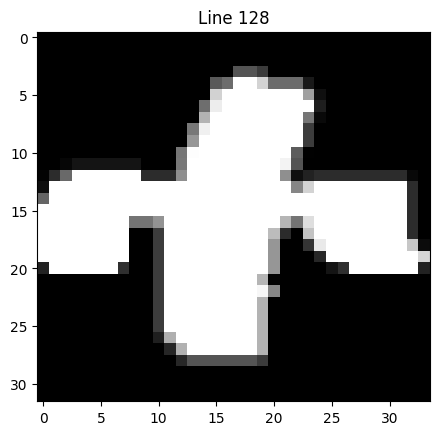

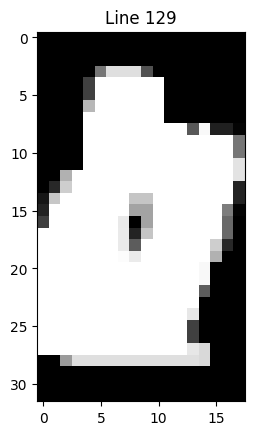

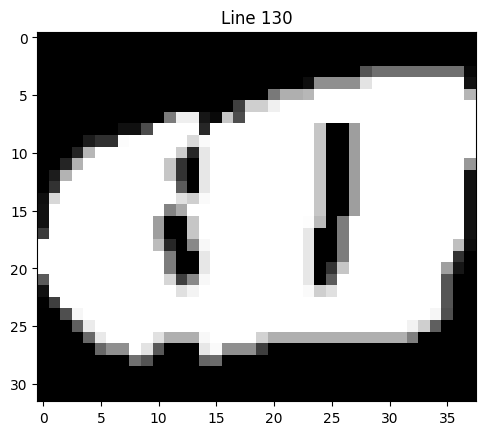

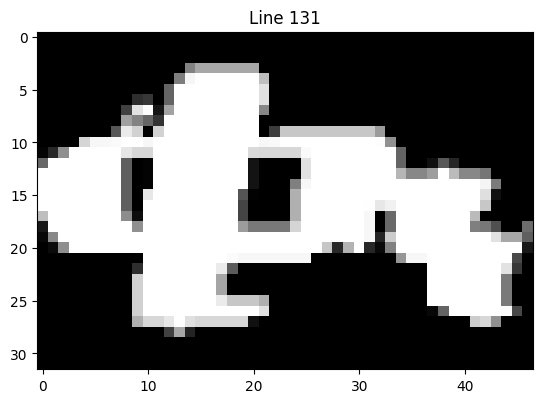

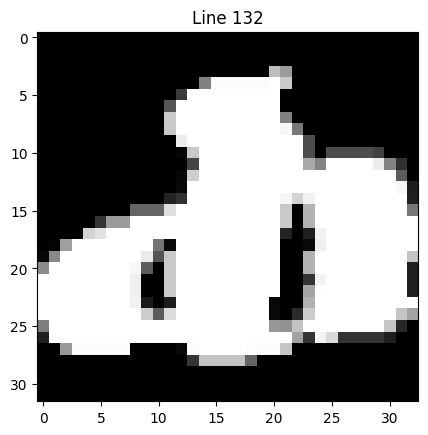

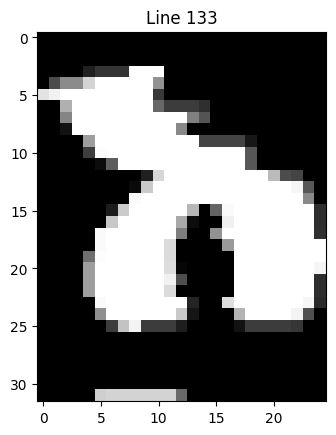

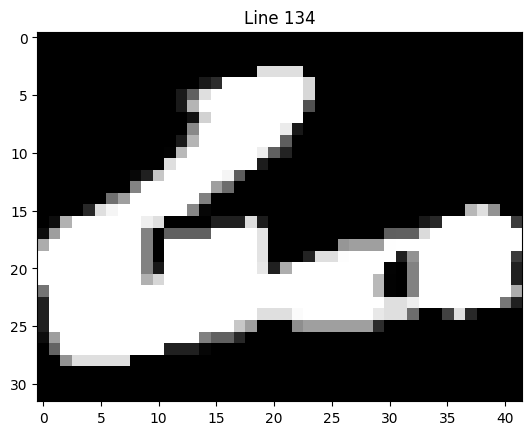

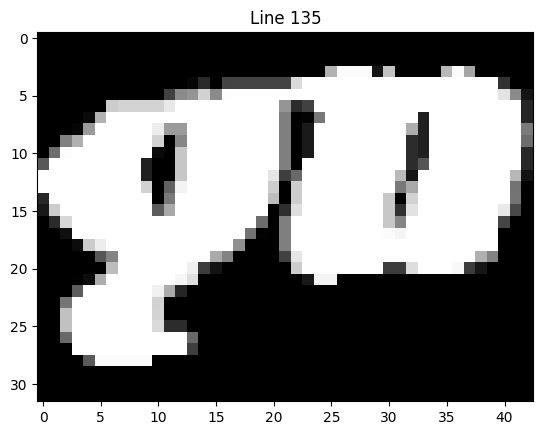

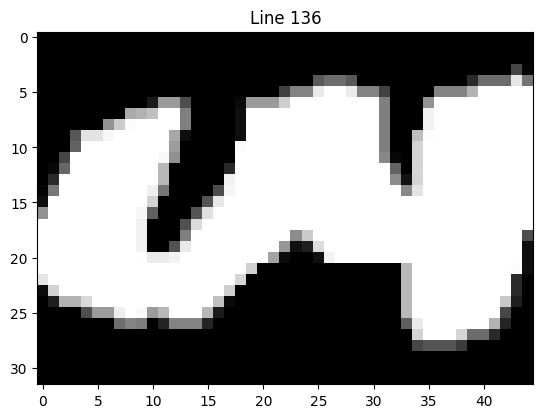

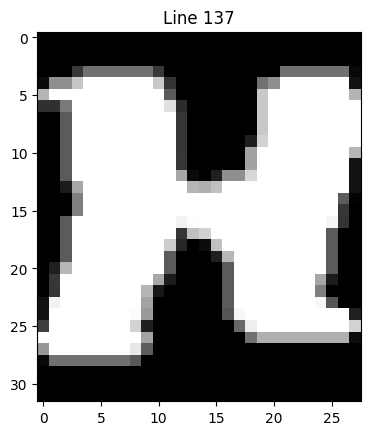

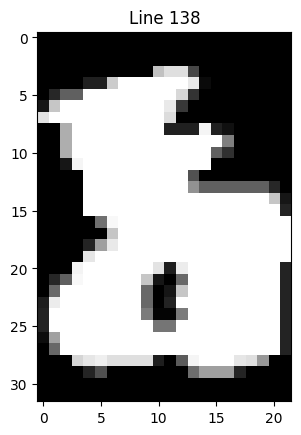

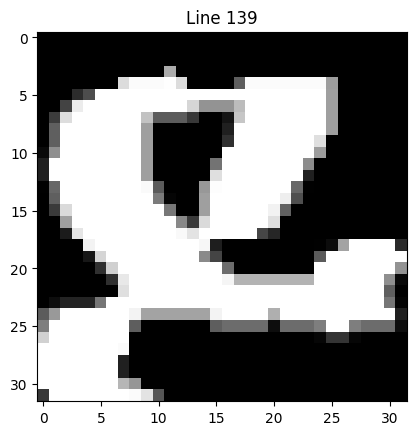

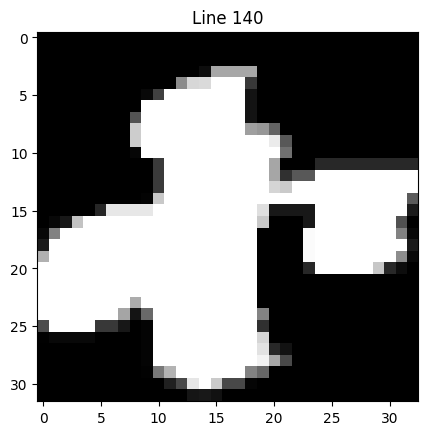

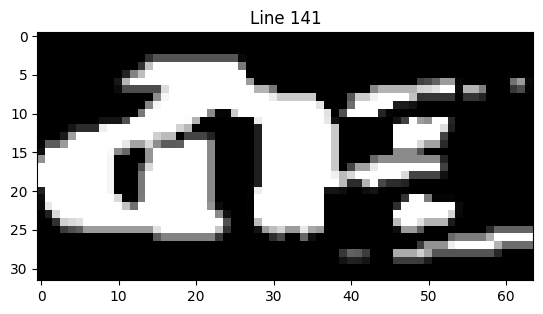

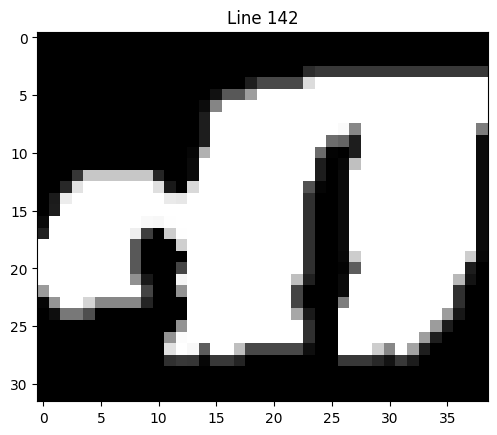

All lines zipped into: /content/ethiopic_lines.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
# ================================
# Page → Line Segmentation (Line-Level)
# ================================

import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# ------------------------
# 1️⃣ Create project folders
# ------------------------
os.makedirs("/content/ocr_project/data", exist_ok=True)
os.makedirs("/content/ocr_project/output_lines", exist_ok=True)
DATA_FOLDER = "/content/ocr_project/data"
OUTPUT_FOLDER = "/content/ocr_project/output_lines"

# ------------------------
# 2️⃣ Upload page image
# ------------------------
print("Upload your Ethiopic manuscript page:")
uploaded = files.upload()  # select your image
page_path = list(uploaded.keys())[0]

# Move uploaded file to data folder
os.rename(page_path, os.path.join(DATA_FOLDER, page_path))
page_path = os.path.join(DATA_FOLDER, page_path)

# ------------------------
# 3️⃣ Load and preprocess image
# ------------------------
# Load grayscale
img = cv2.imread(page_path, cv2.IMREAD_GRAYSCALE)

# Binarize (text=white, background=black)
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Dilate vertically to connect letters in a line
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))  # vertical kernel
dilated = cv2.dilate(binary, kernel, iterations=2)

# ------------------------
# 4️⃣ Find contours (lines)
# ------------------------
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get bounding boxes and sort top-to-bottom
bounding_boxes = [cv2.boundingRect(c) for c in contours]
bounding_boxes = sorted(bounding_boxes, key=lambda b: b[1])

# ------------------------
# 5️⃣ Crop lines and save
# ------------------------
line_images = []
for i, (x, y, w, h) in enumerate(bounding_boxes):
    # Skip tiny blobs (noise)
    if w < 20 or h < 10:
        continue

    line_img = binary[y:y+h, x:x+w]
    # Resize line height to 32 px (OCR-friendly)
    new_h = 32
    new_w = int(w * (new_h / h))
    line_img = cv2.resize(line_img, (new_w, new_h))
    line_images.append(line_img)

    # Save line image
    filename = os.path.join(OUTPUT_FOLDER, f"line_{i+1}.png")
    cv2.imwrite(filename, line_img)

print(f"Detected and saved {len(line_images)} line images in {OUTPUT_FOLDER}")

# ------------------------
# 6️⃣ Visualize lines (optional)
# ------------------------
for i, line in enumerate(line_images):
    plt.imshow(line, cmap="gray")
    plt.title(f"Line {i+1}")
    plt.show()

# ------------------------
# 7️⃣ Optional: Zip all lines for download
# ------------------------
import shutil
zip_filename = "/content/ethiopic_lines.zip"
shutil.make_archive(zip_filename.replace(".zip",""), 'zip', OUTPUT_FOLDER)
print("All lines zipped into:", zip_filename)

# To download the zip:
from google.colab import files
files.download(zip_filename)


In [92]:
import torch
from torch.utils.data import Dataset
import cv2

class OCRDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx], cv2.IMREAD_GRAYSCALE)
        img = img / 255.0  # normalize 0-1
        img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)  # [1,H,W]

        label = self.labels[idx]
        # convert label to integer sequence here
        return img, label


In [94]:
import torch.nn as nn

class CRNN(nn.Module):
    def __init__(self, num_classes):
        super(CRNN, self).__init__()
        # CNN backbone
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # BiLSTM
        self.rnn = nn.LSTM(64*8, 128, num_layers=2, bidirectional=True, batch_first=True)
        # Linear for CTC
        self.fc = nn.Linear(128*2, num_classes)

    def forward(self, x):
        # x: [B,1,H,W]
        x = self.cnn(x)  # [B,C,H',W']
        b, c, h, w = x.size()
        x = x.permute(0,3,1,2)  # [B,W,C,H]
        x = x.contiguous().view(b, w, c*h)  # [B,W,C*H]
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x  # [B,W,num_classes]
